Project Name:- Project Code 10281: Employee Performance Analysis INX Future Inc.

Name:- Ancil Xavier

Batch:- 3rd May 2021

## Business Problem

## Project Code 10281 : Employee Performance Analysis INX Future Inc.

In [1]:
import warnings
warnings.filterwarnings('ignore') 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix

### Loading data

In [2]:
df = pd.read_csv('INX_Employeeperformance.csv')

In [3]:
df.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [4]:
df.tail()

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [6]:
df.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [7]:
df.shape

(1200, 28)

In [8]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

## Domain Analysis

## Exploratory Data Analysis

In [9]:
df.rename(columns={'EmpNumber':'Emp_no', 'MaritalStatus':'Marital_Status', 'EmpDepartment':'Emp_Dept', 'EmpJobRole':'Job_role', 'BusinessTravelFrequency':'Travel_freq', 'DistanceFromHome':'Dist_from_home', 'EmpEducationLevel': 'Education_level', 'EmpEnvironmentSatisfaction': 'Envt_satisfaction', 'EmpHourlyRate':'Hourly_rate','EmpJobInvolvement':'Job_involvement','EmpJobLevel':'Job_level', 'EmpJobSatisfaction':'Job_satisfaction', 'NumCompaniesWorked':'No_companies_worked','EmpLastSalaryHikePercent':'Last_sal_hike', 'EmpRelationshipSatisfaction':'Relationship_satisfaction','TotalWorkExperienceInYears':'Total_work_exp','TrainingTimesLastYear':'Training_last_yr', 'EmpWorkLifeBalance':'Work_life_bal', 'ExperienceYearsAtThisCompany':'Exp_at_company', 'ExperienceYearsInCurrentRole':'Exp_current_role', 'YearsSinceLastPromotion':'Years_last_promotion','YearsWithCurrManager':'Years_curr_mgr', 'PerformanceRating':'Performance_rating'}, inplace=True 
                  )

In [10]:
df.columns

Index(['Emp_no', 'Age', 'Gender', 'EducationBackground', 'Marital_Status',
       'Emp_Dept', 'Job_role', 'Travel_freq', 'Dist_from_home',
       'Education_level', 'Envt_satisfaction', 'Hourly_rate',
       'Job_involvement', 'Job_level', 'Job_satisfaction',
       'No_companies_worked', 'OverTime', 'Last_sal_hike',
       'Relationship_satisfaction', 'Total_work_exp', 'Training_last_yr',
       'Work_life_bal', 'Exp_at_company', 'Exp_current_role',
       'Years_last_promotion', 'Years_curr_mgr', 'Attrition',
       'Performance_rating'],
      dtype='object')

### Univariate Analysis - Analysing single variable


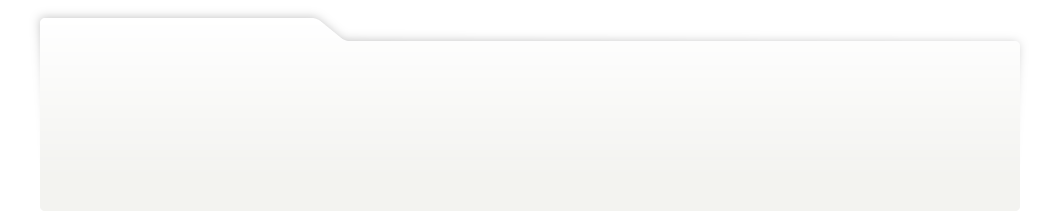
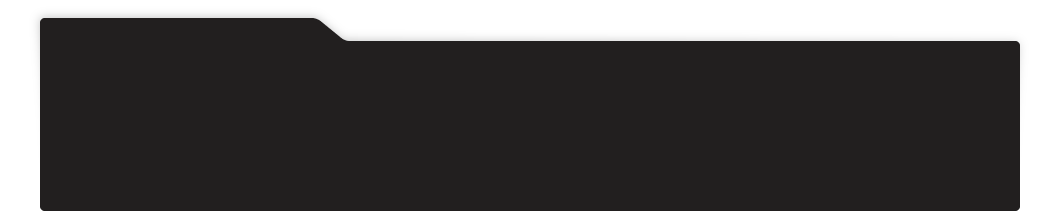
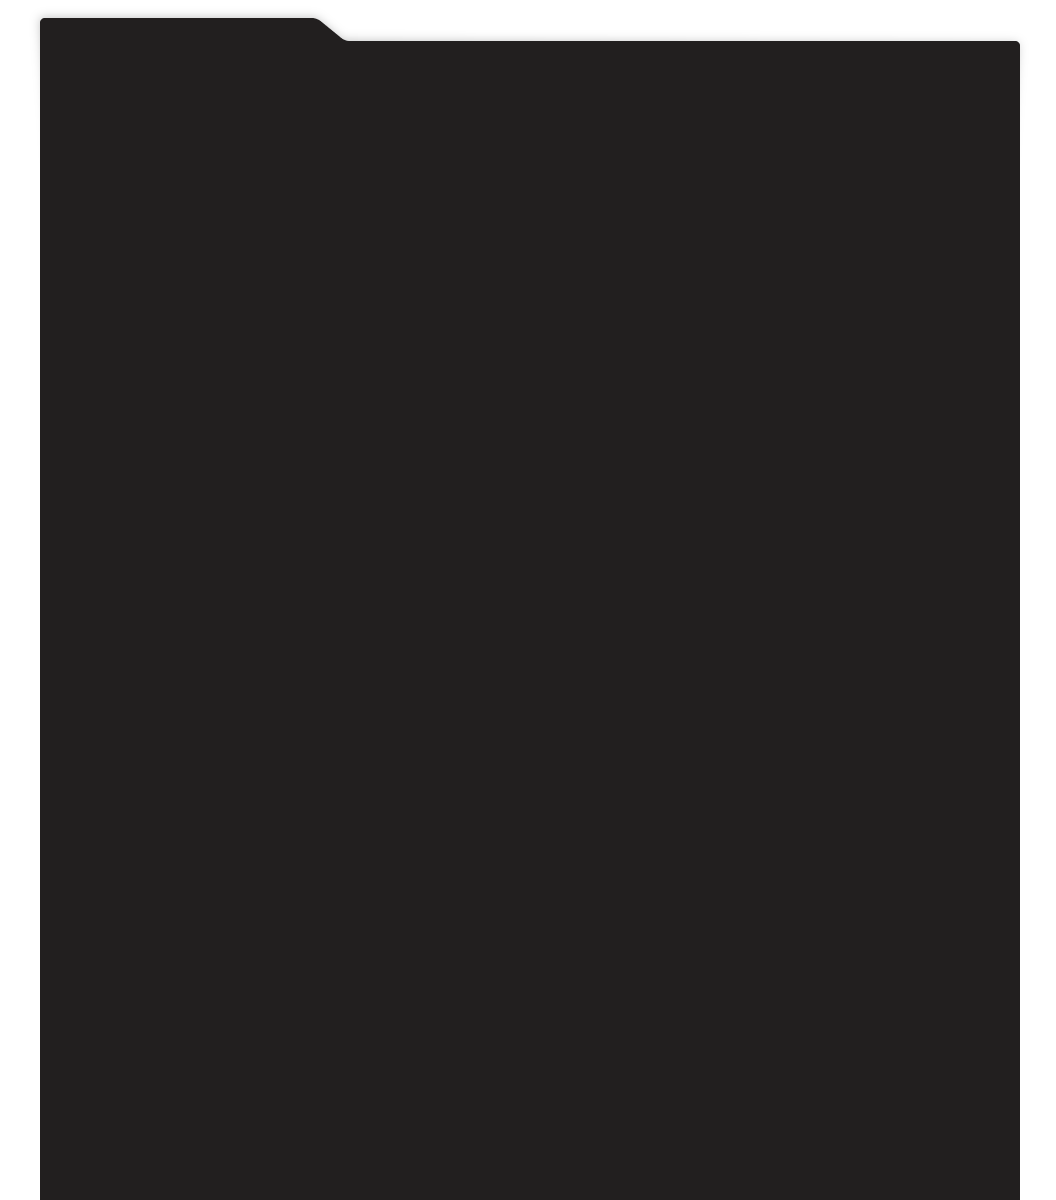
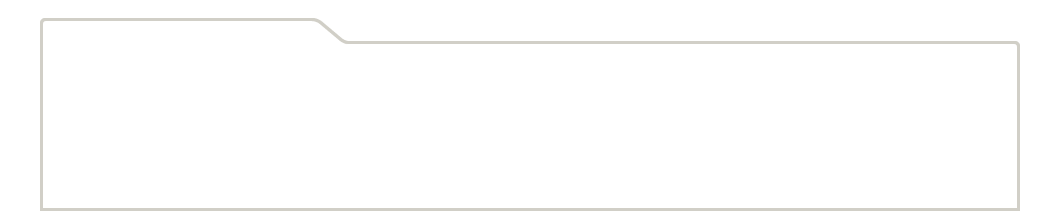
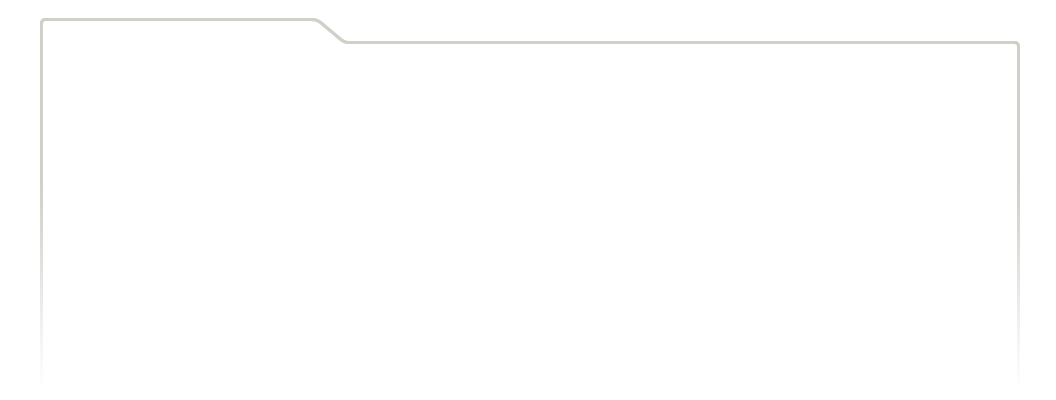
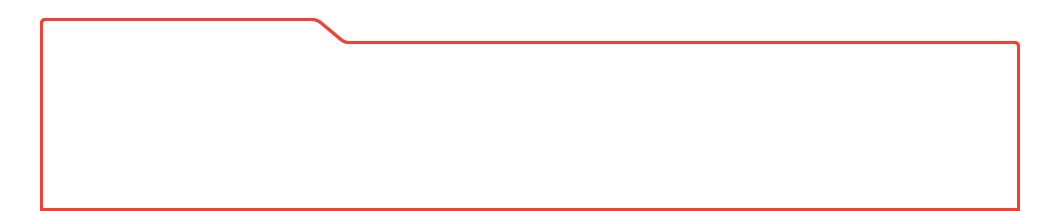
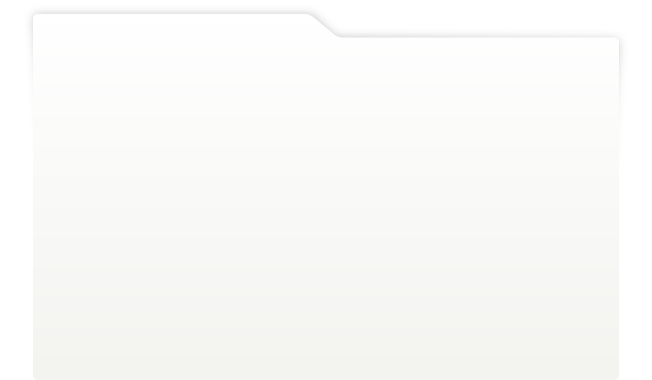
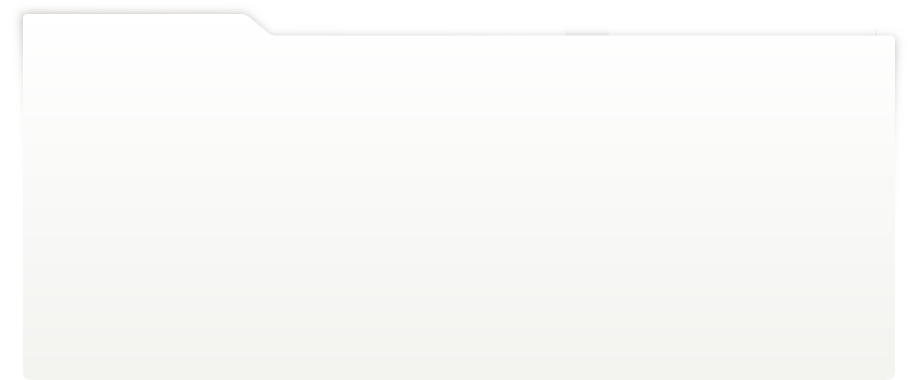
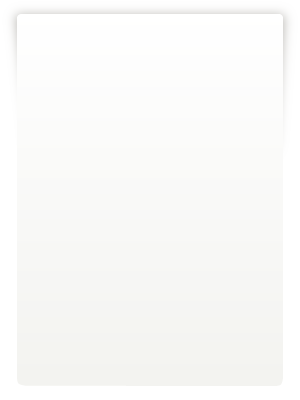
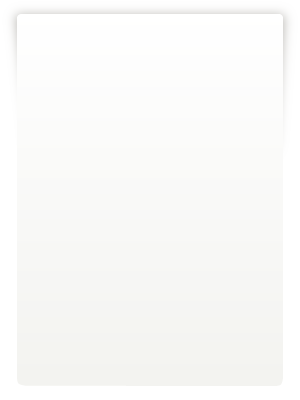
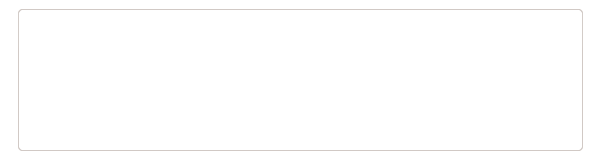
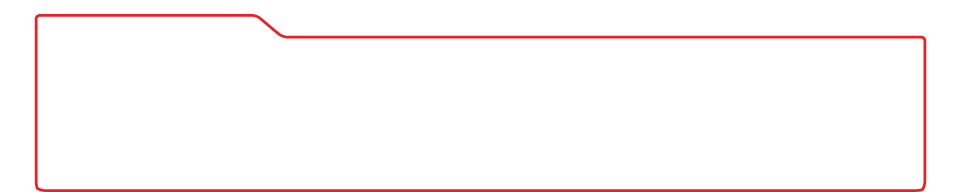
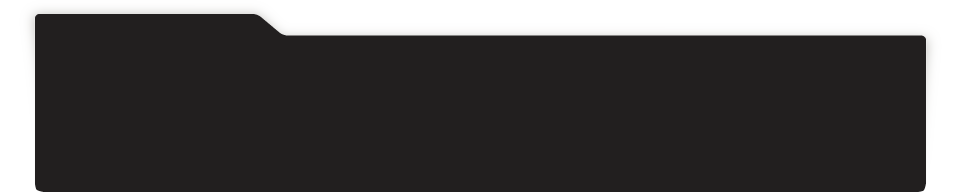
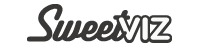
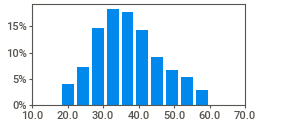
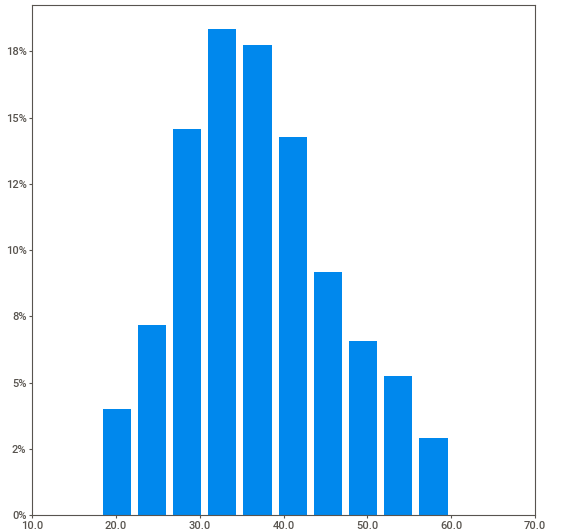
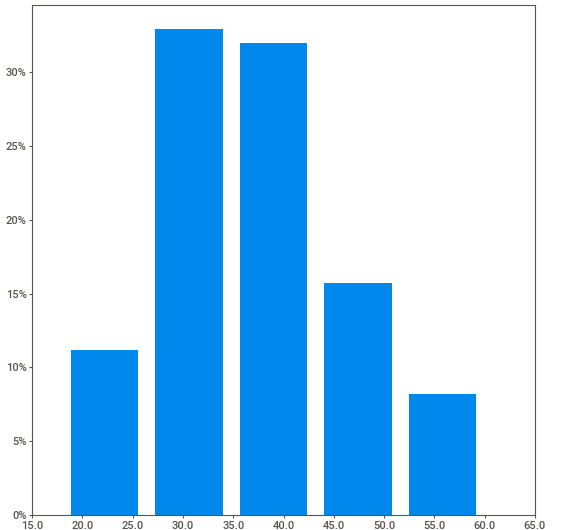
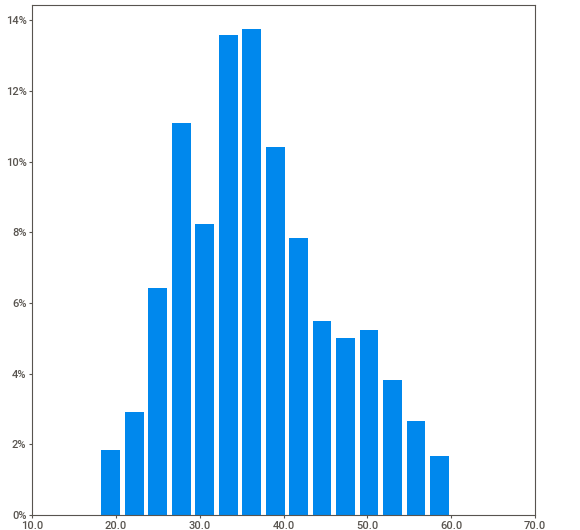
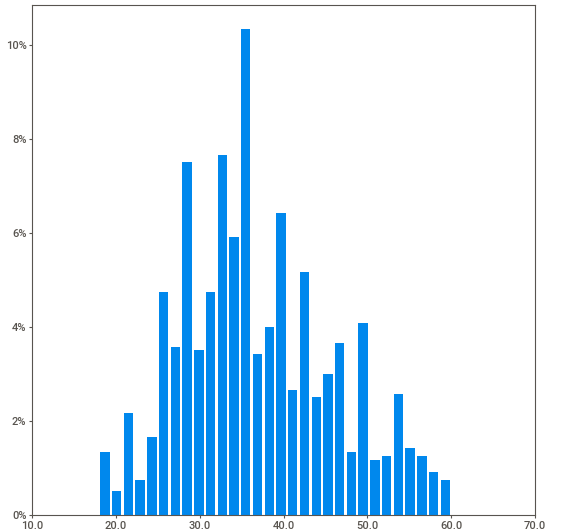
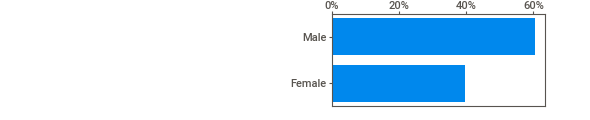
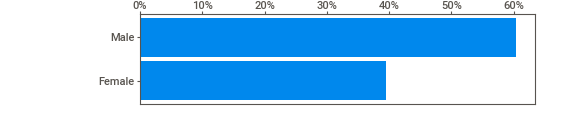
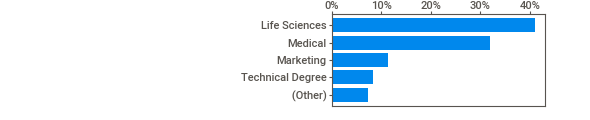
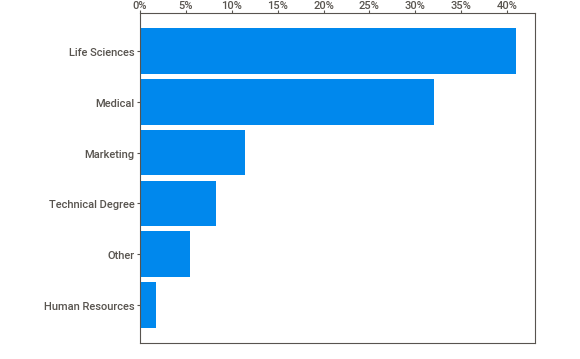
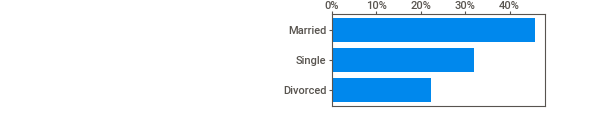
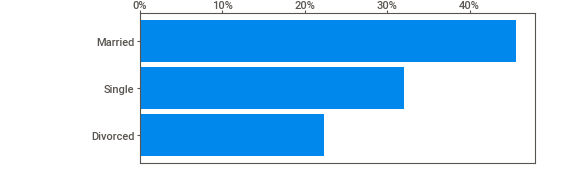
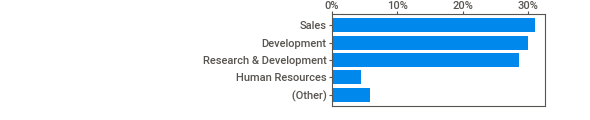
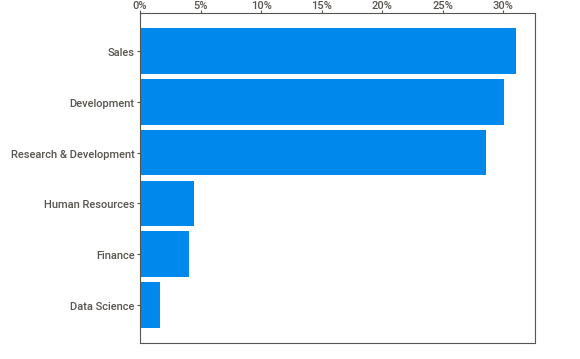
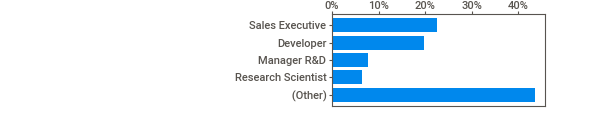
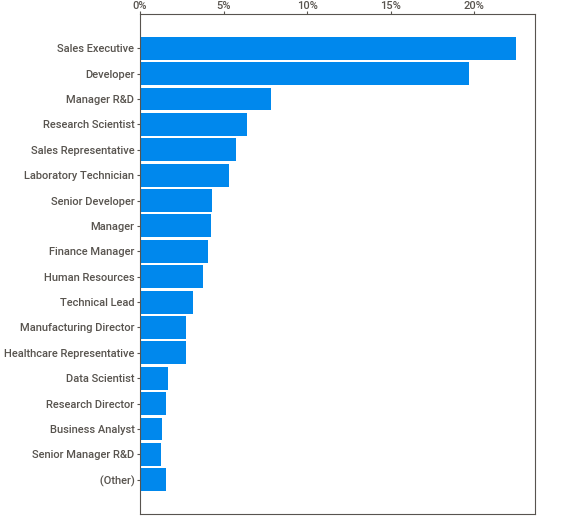
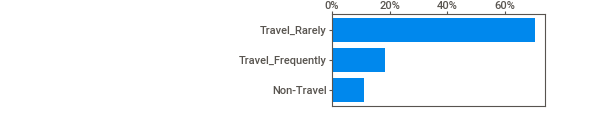
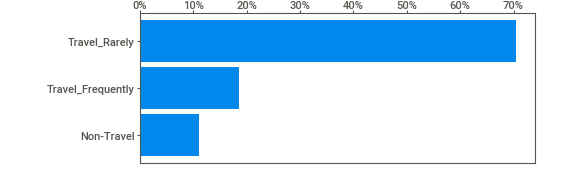
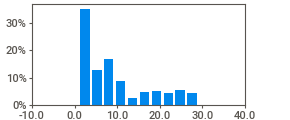
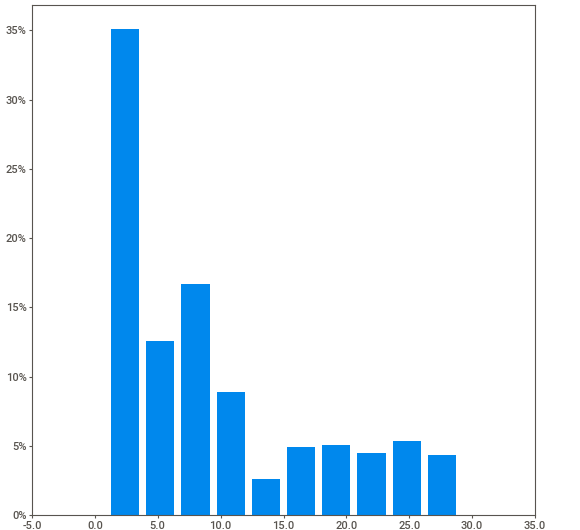
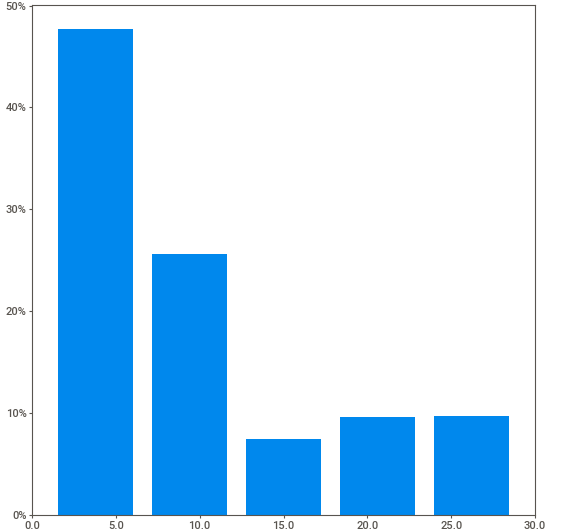
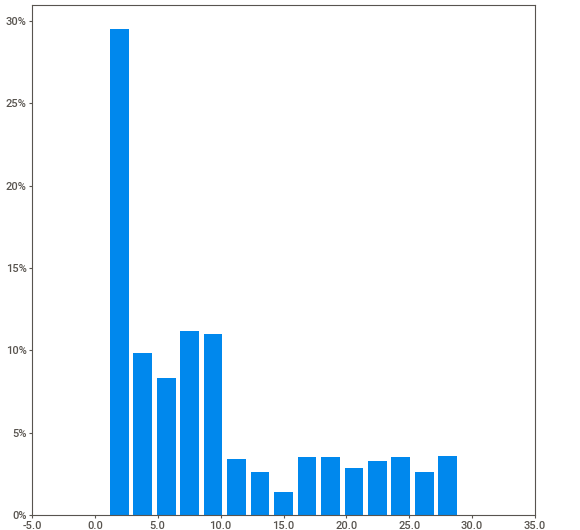
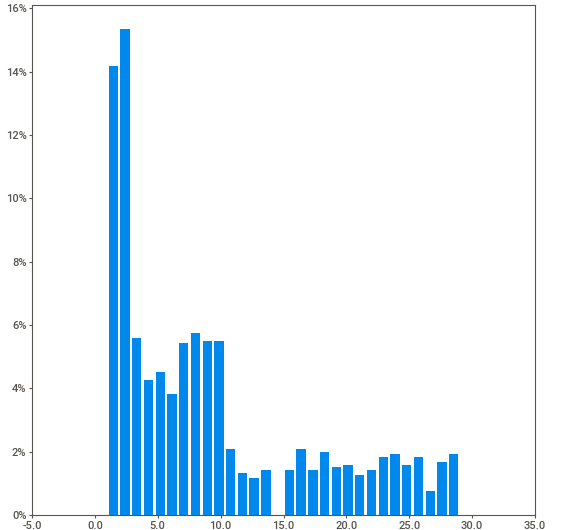
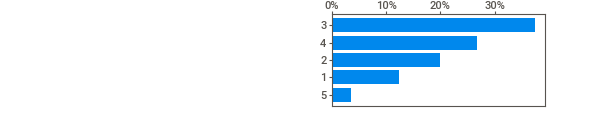
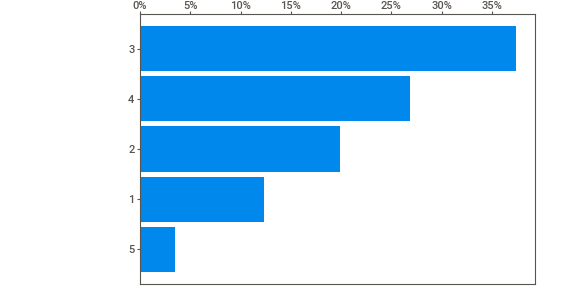
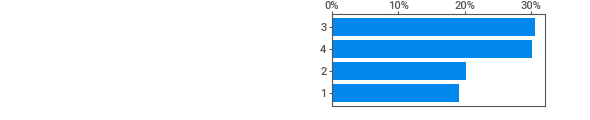
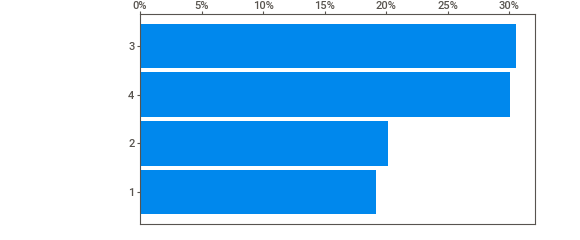
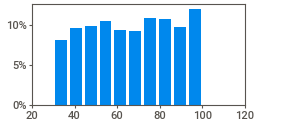
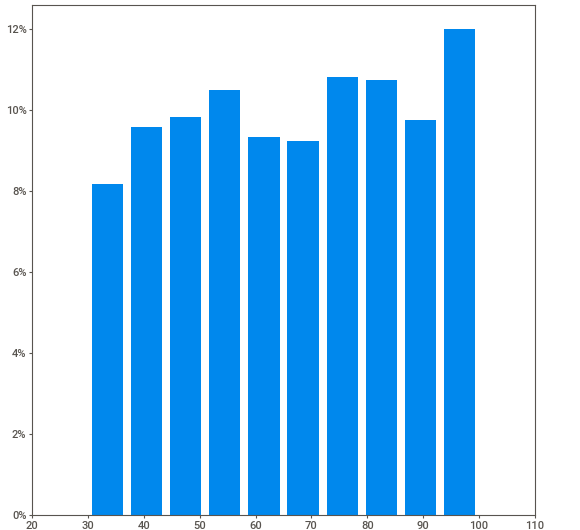
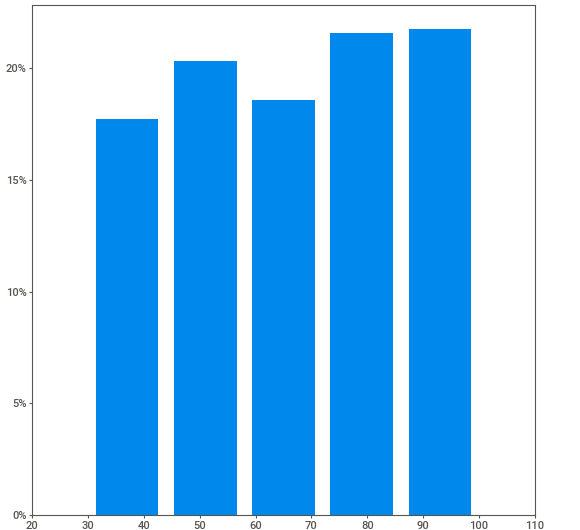
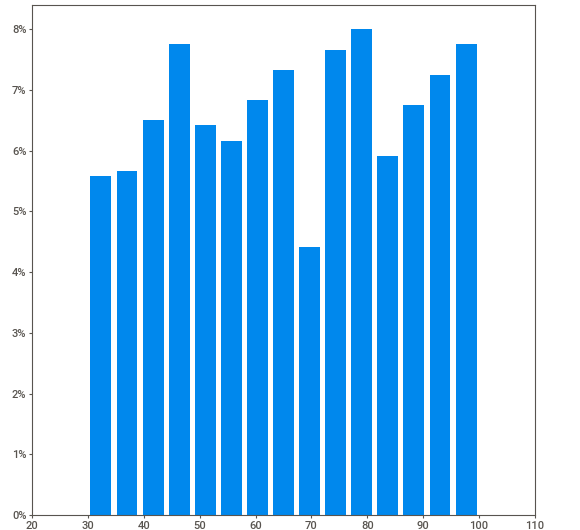
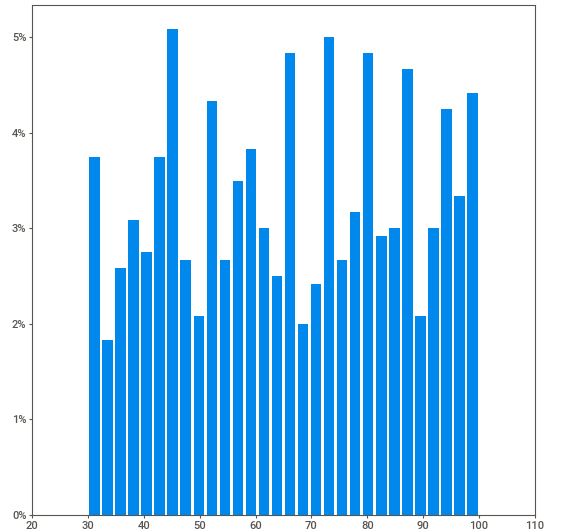
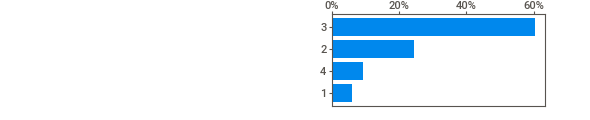
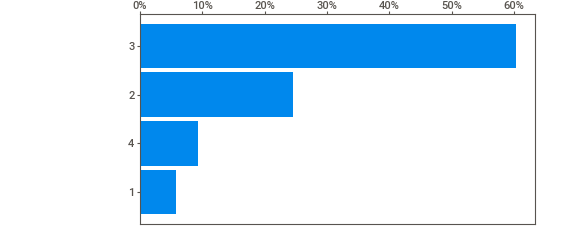
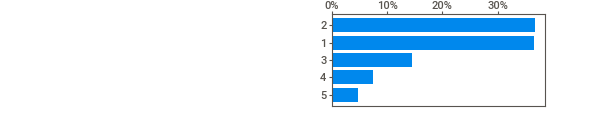
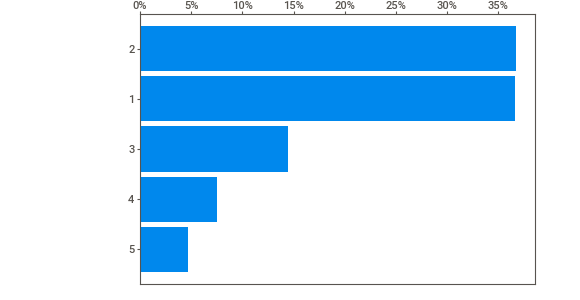
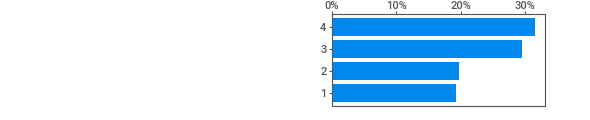
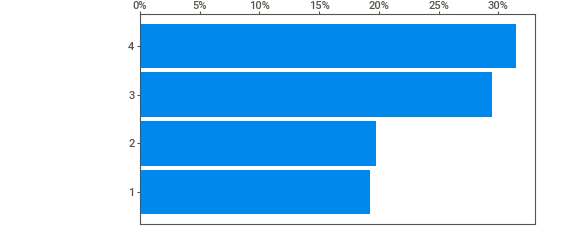
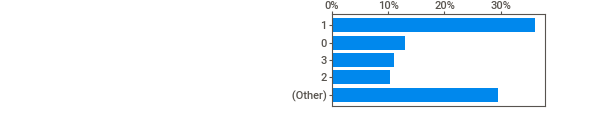
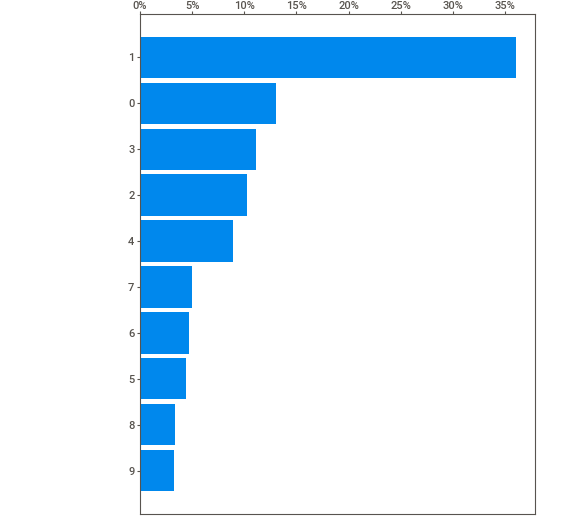
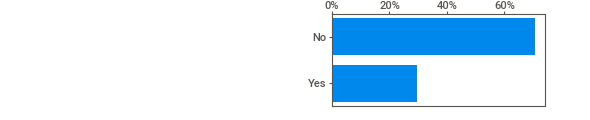
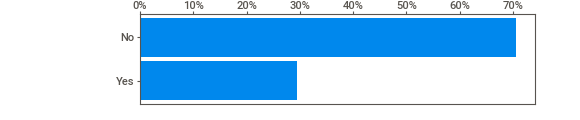
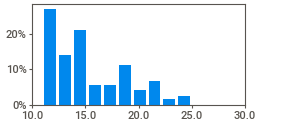
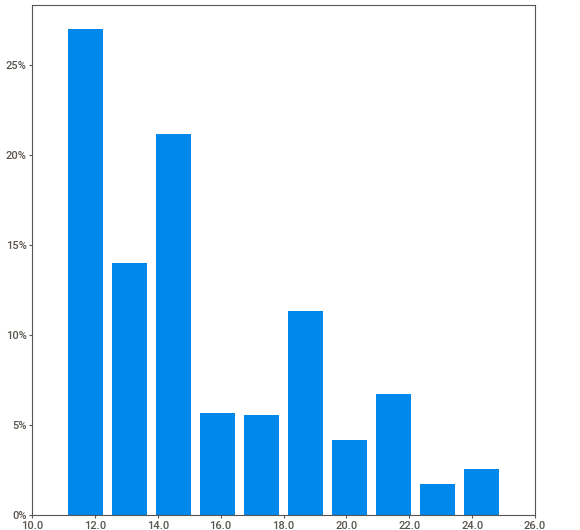
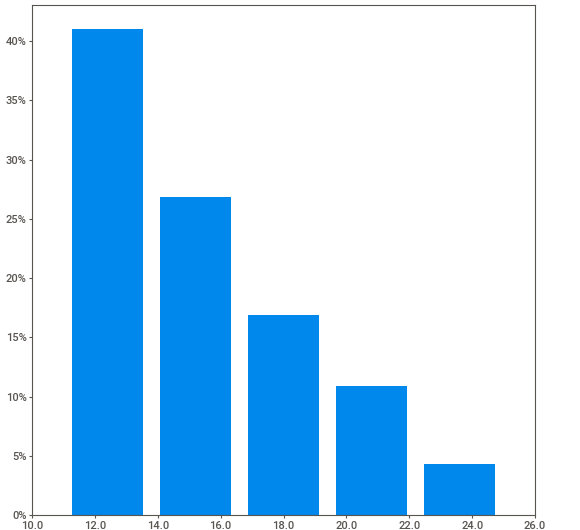
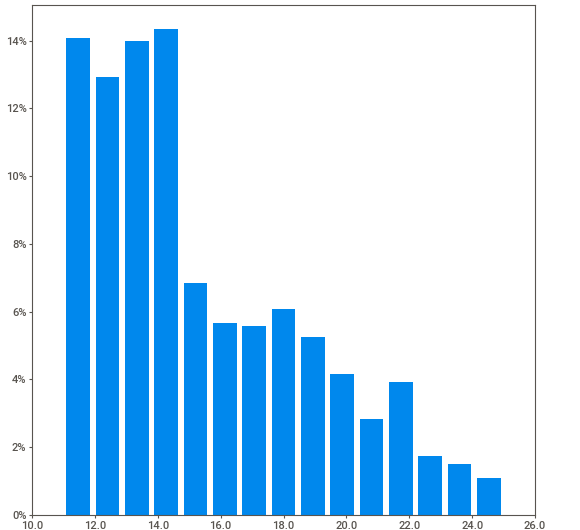
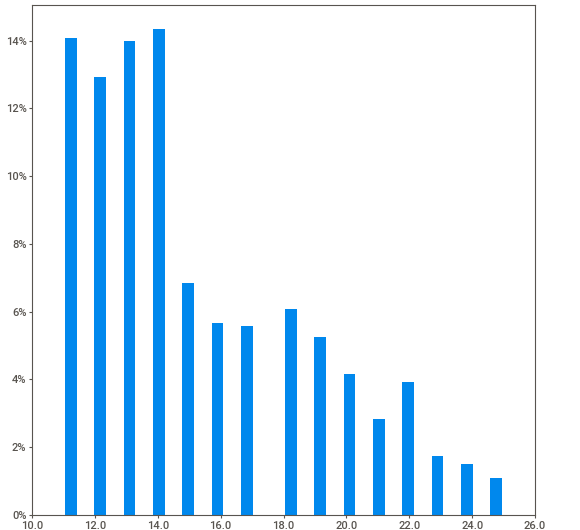
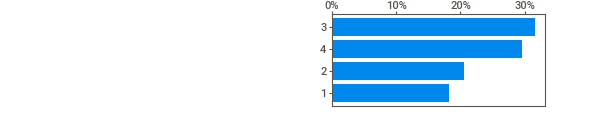
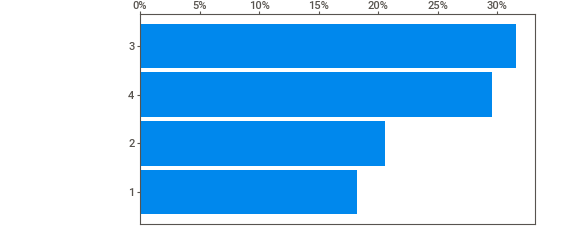
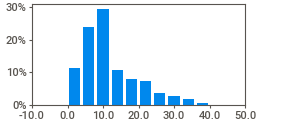
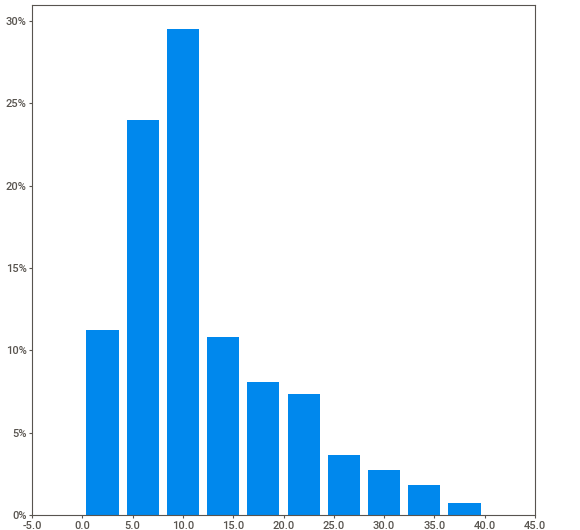
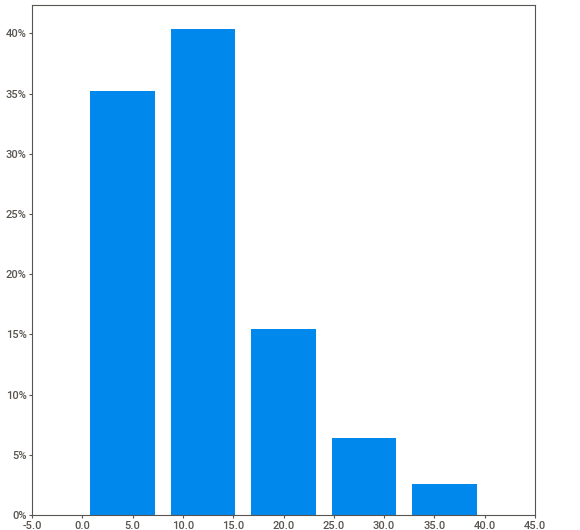
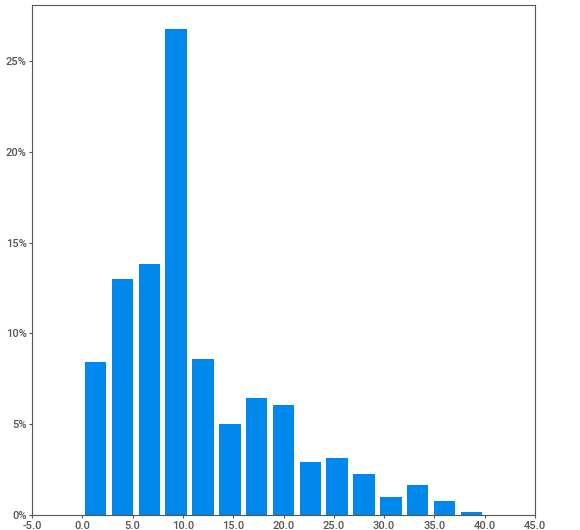
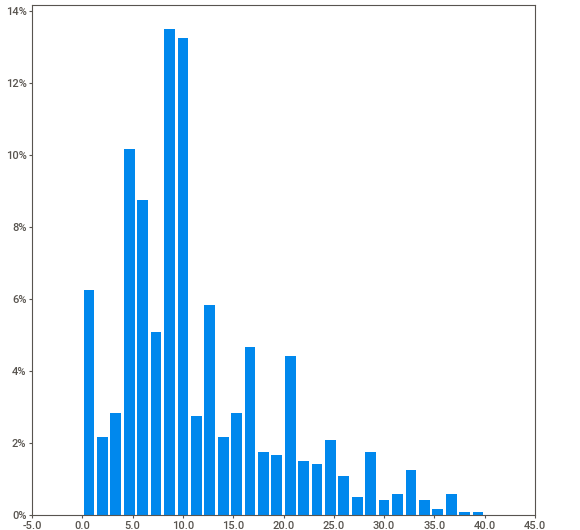
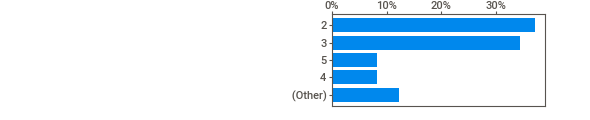
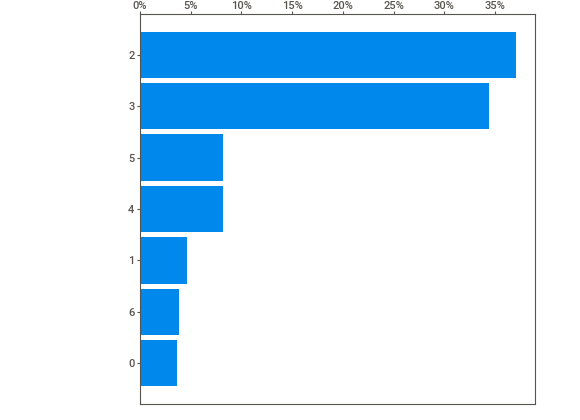
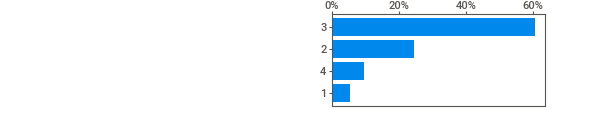
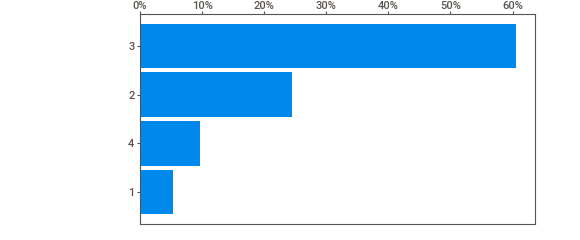
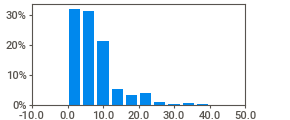
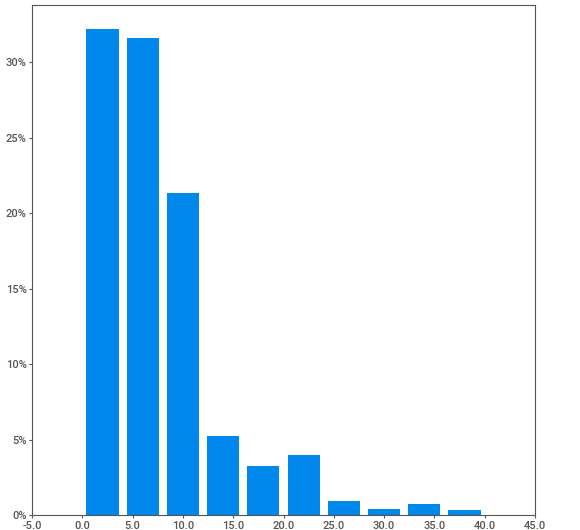
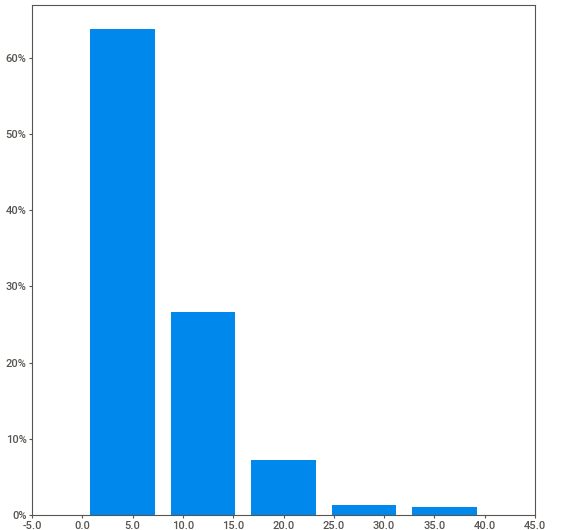
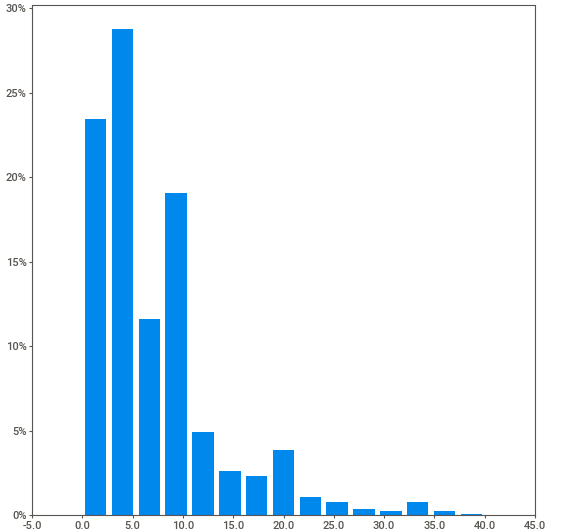
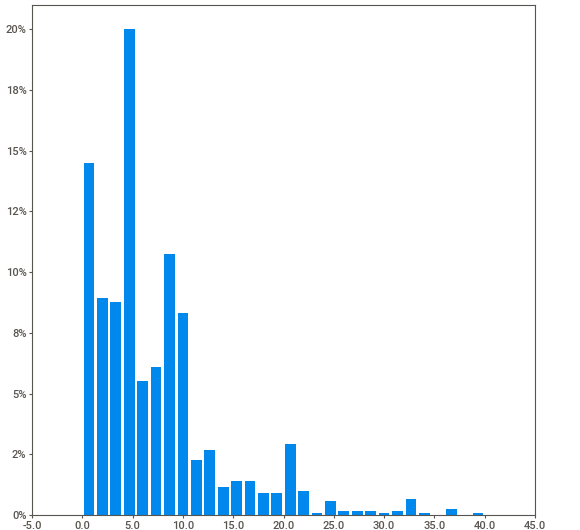
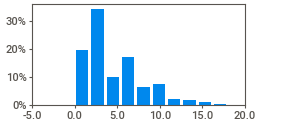
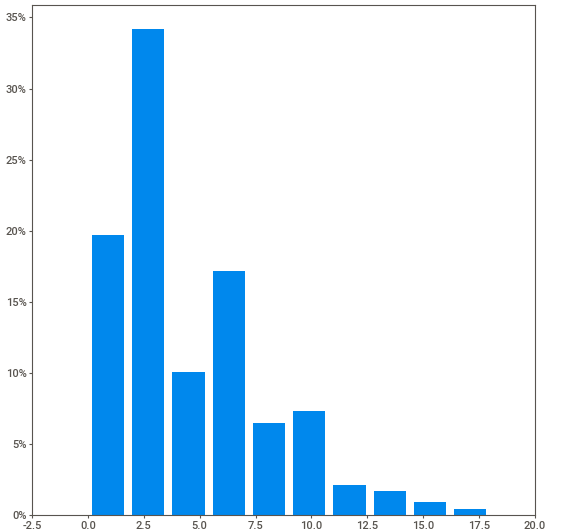
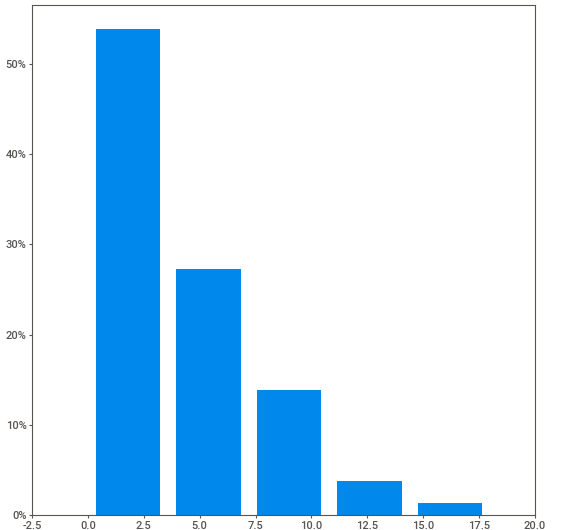
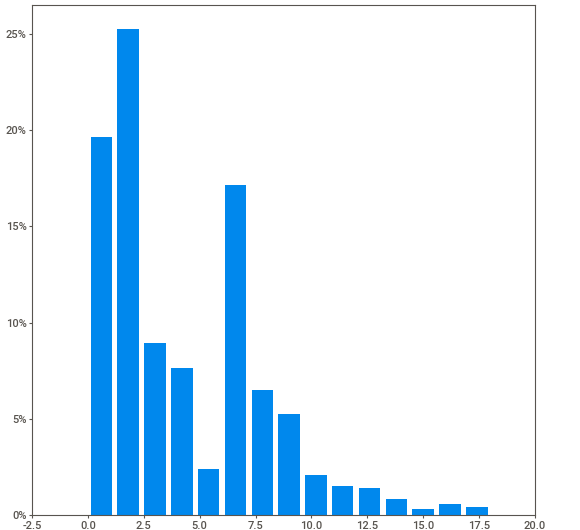
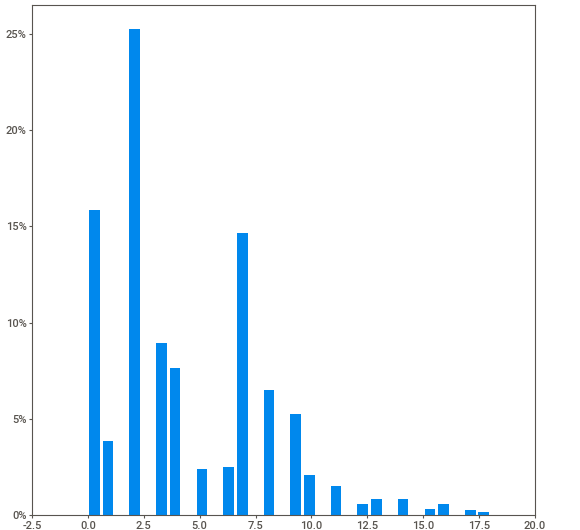
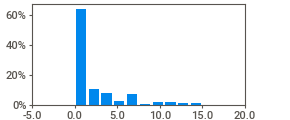
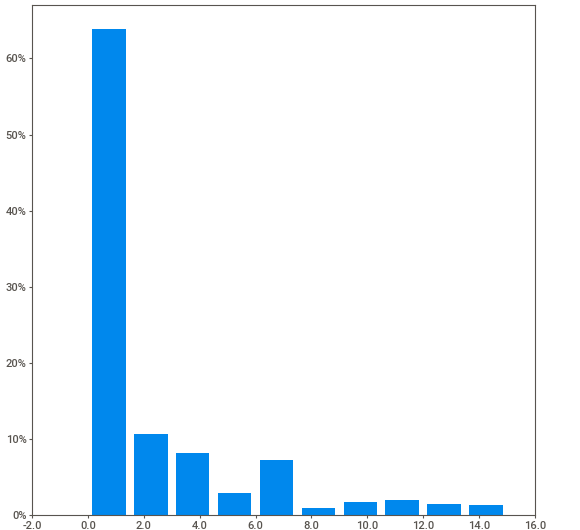
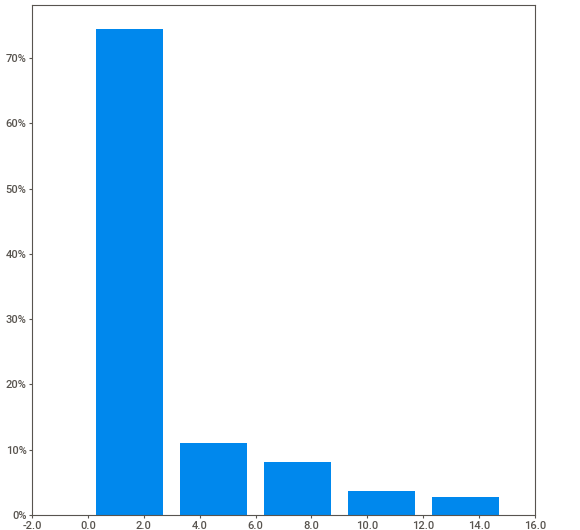
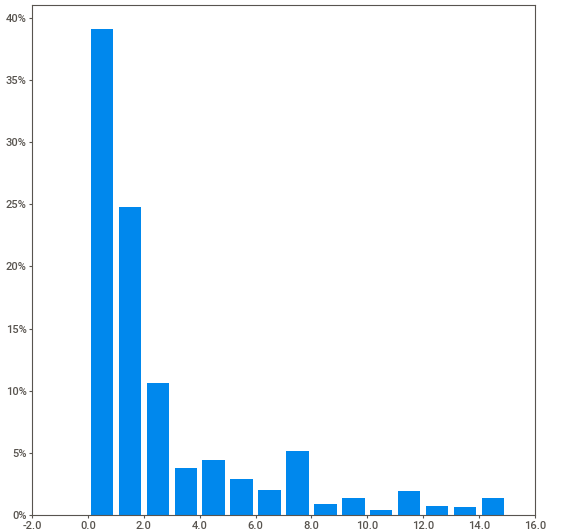
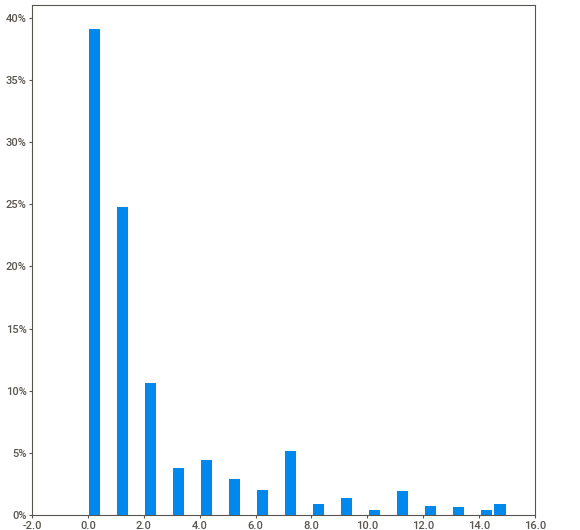
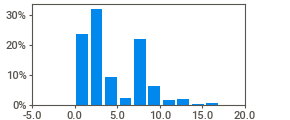
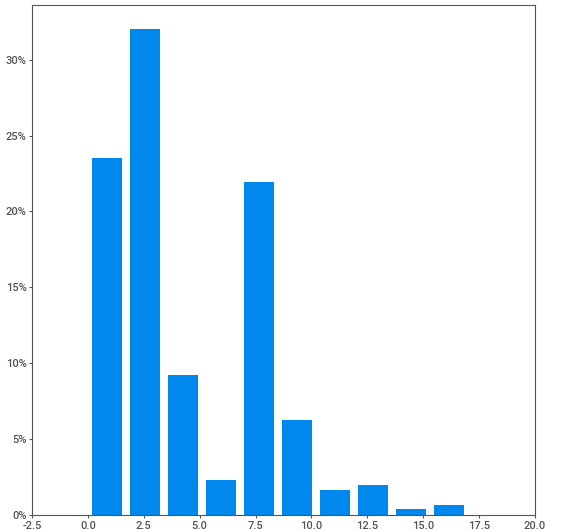
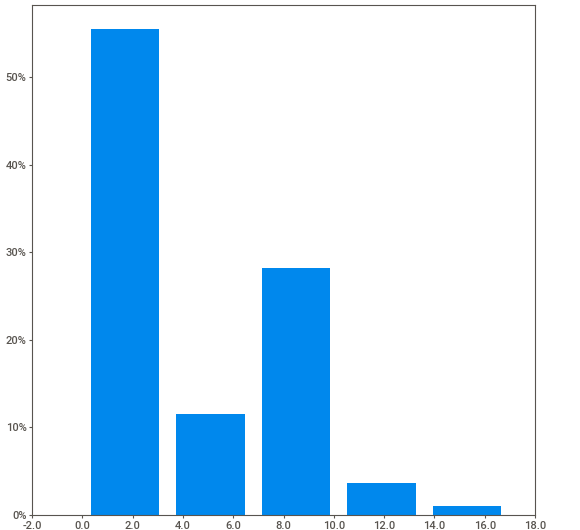
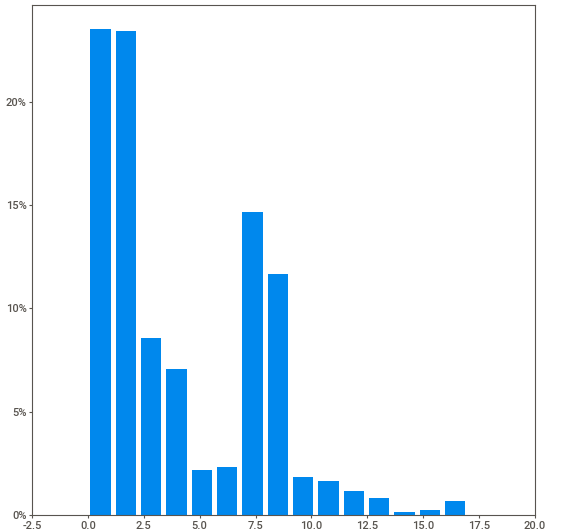
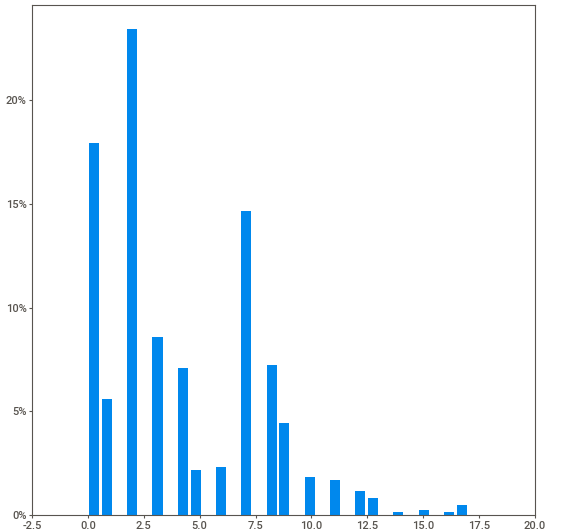
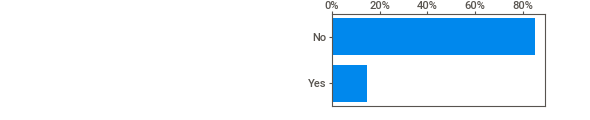
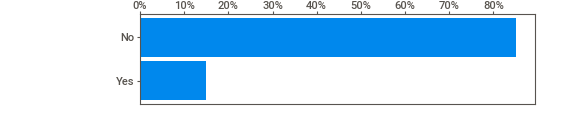
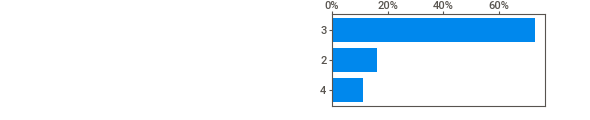
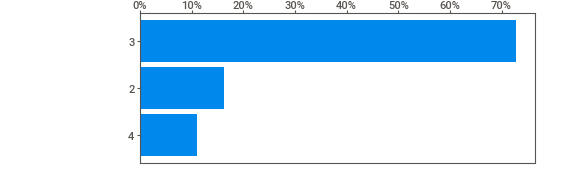
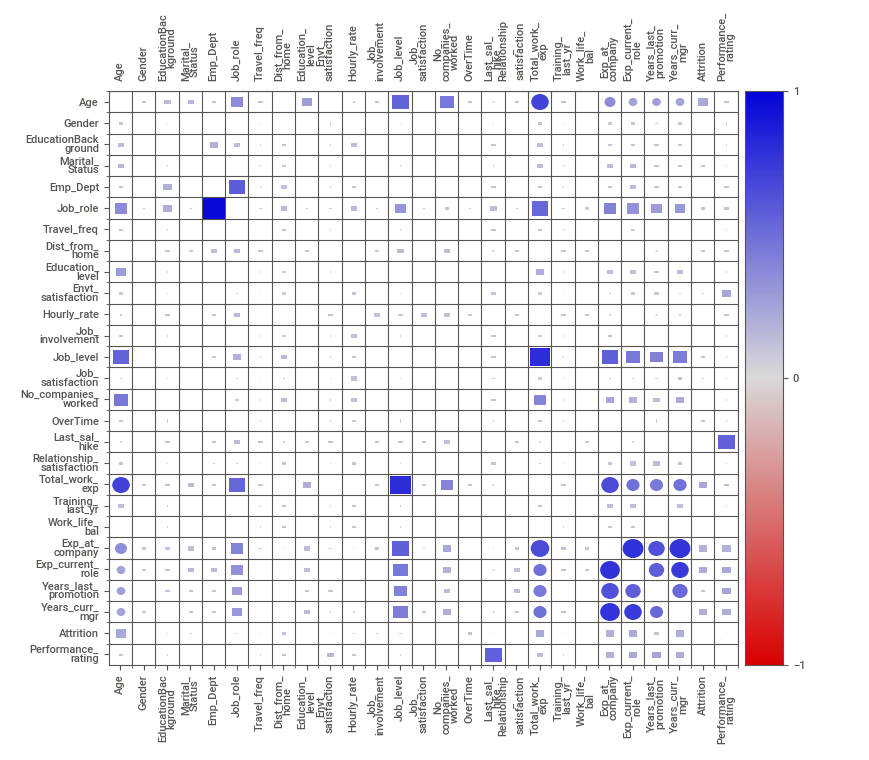
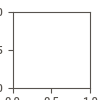

In [11]:
import sweetviz as sv
my_report=sv.analyze(df)
my_report.show_notebook()

<AxesSubplot:xlabel='Gender', ylabel='count'>

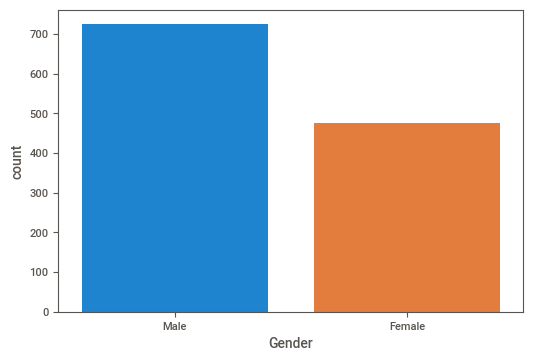

In [12]:
sns.countplot(x='Gender',data=df)

#As seen, we have 1200 employees in total. 
#Out of which, almost 720 are males and 480 are females

<AxesSubplot:xlabel='EducationBackground', ylabel='count'>

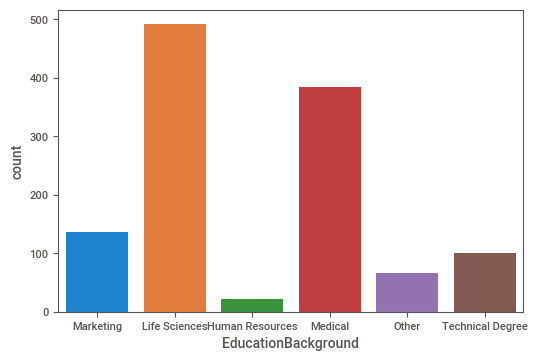

In [13]:
sns.countplot(x='EducationBackground',data=df)

#Almost 500 employees have an educational background in Life Sciences and about 385 employees come from the medical background
#About 100 employees belong to the marketing and technical degree background
#Only less than 25 employees have a background in Human Resources

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

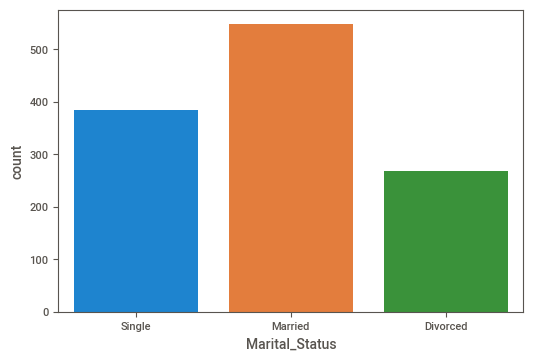

In [14]:
sns.countplot(x='Marital_Status',data=df)

#Almost 550 employees are married whereas 385 employees are found to be single
#About 270 employees are found to be divorced 

<AxesSubplot:xlabel='Emp_Dept', ylabel='count'>

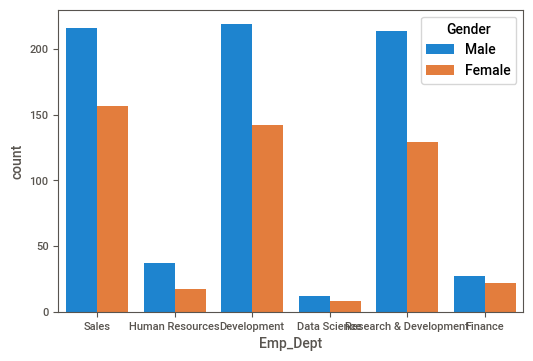

In [15]:
sns.countplot(x='Emp_Dept',data=df,hue='Gender')

#Sales, Development and R&D departments have 373,361 and 343 employees respectively
#Almost 60% of the employees in each of these departments are found to be males and 40% are females
#Only 120 employees are present in HR, Finance and Data Science departments altogether

<AxesSubplot:xlabel='Emp_Dept', ylabel='count'>

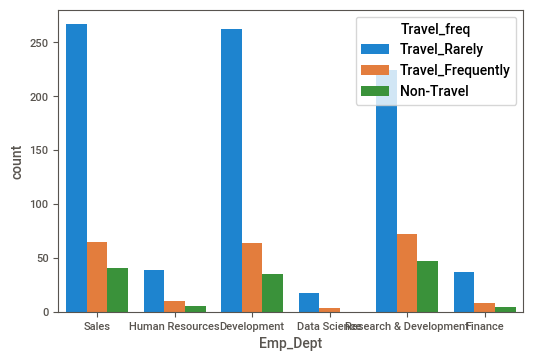

In [16]:
sns.countplot(x='Emp_Dept',data=df,hue='Travel_freq')

#More than 70% of the employees in Sales, Development and R&D travel rarely
#Less than 20% of the employees only travel frequenty in all the departments
#Less than 10% of the employees do not travel at all

<AxesSubplot:xlabel='Envt_satisfaction', ylabel='count'>

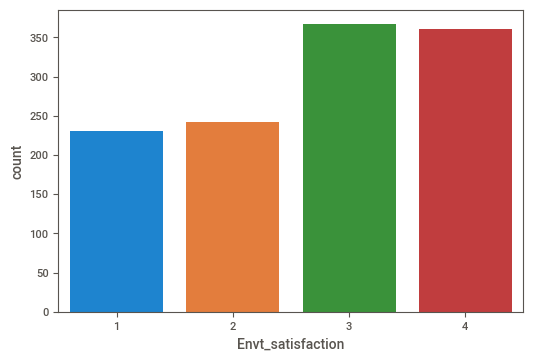

In [17]:
sns.countplot(x='Envt_satisfaction',data=df)

#Almost 730 employees are found to be quite satisfied with their working environment 
#About 472 employees are not happy with the working environment as they have given poor ratings

In [18]:
df.Job_satisfaction.value_counts()

4    378
3    354
2    237
1    231
Name: Job_satisfaction, dtype: int64

<AxesSubplot:xlabel='Job_satisfaction', ylabel='count'>

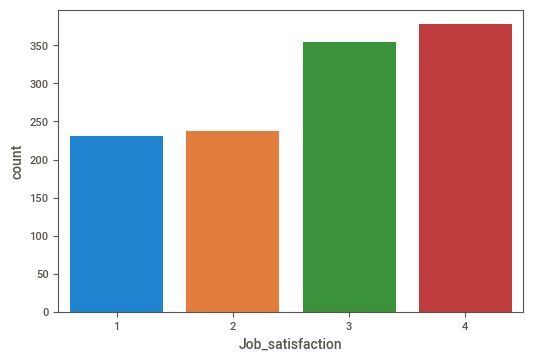

In [19]:
sns.countplot(x='Job_satisfaction',data=df)

#Almsot 380 employees have rated a high job satisfaction of 4 while 354 employees are moderately satisfied with their jobs
#About 468 employees are not satisfied with their jobs as they have rated poorly

<AxesSubplot:xlabel='Job_level', ylabel='count'>

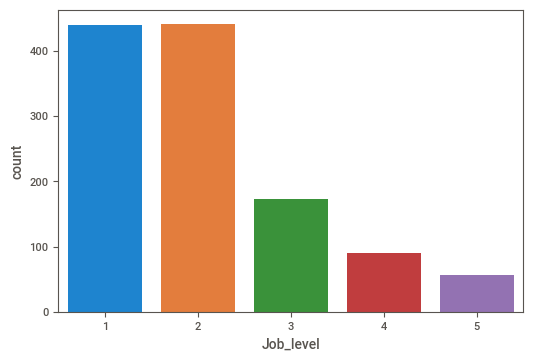

In [20]:
sns.countplot(x='Job_level',data=df)

#About 73% of the employees work in Job levels 1 and 2 [lower levels] and about 175 employees work in Job level 3
#Almost 150 employees work at the top levels [Level 4 and Level 5] in various departments

<AxesSubplot:xlabel='Relationship_satisfaction', ylabel='count'>

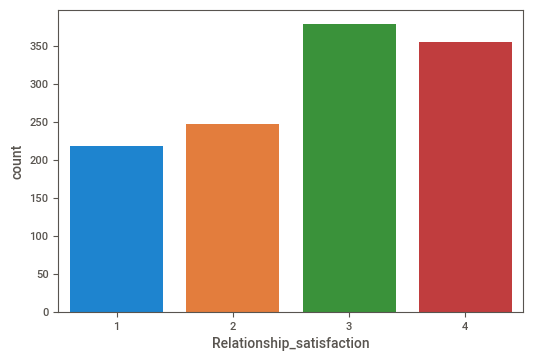

In [21]:
sns.countplot(x='Relationship_satisfaction',data=df)

#Almost 730 employees have good relationship with the management as they have given high ratings of 3 and 4 
#About 470 employees are not that happy with the management as they have rated poorly

<AxesSubplot:xlabel='Training_last_yr', ylabel='count'>

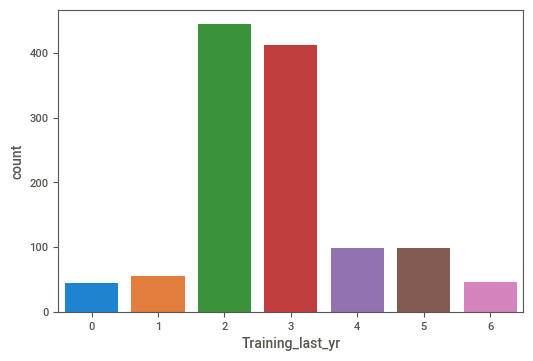

In [22]:
sns.countplot(x='Training_last_yr',data=df)

#Almost 445 employees received 2 trainings last year while 413 employees receieved 3 trainings last year
#About 56 employees received only 1 training last year across various departments
#Almost 242 employees received more than 4 trainings last year across various departments

<AxesSubplot:xlabel='Work_life_bal', ylabel='count'>

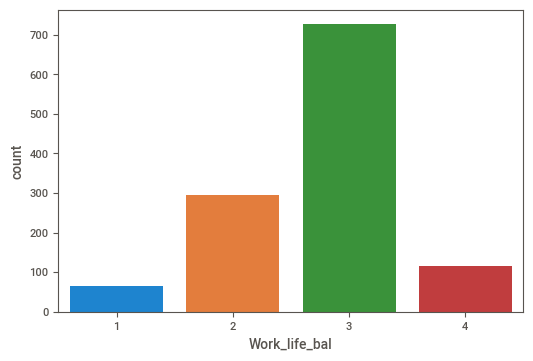

In [23]:
sns.countplot(x='Work_life_bal',data=df)

#Almost 115 employees were found to have good work life balance whereas 727 employees gave a moderate rating of 3 
#About 360 employees find it difficult to juggle between the personal and professional lives and have rated poorly

<AxesSubplot:xlabel='No_companies_worked', ylabel='count'>

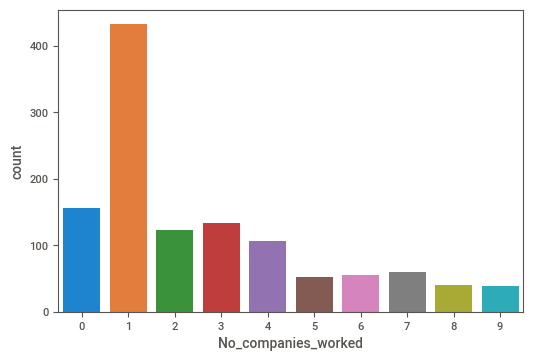

In [24]:
sns.countplot(x='No_companies_worked',data=df)

#Almost 430 employees have worked in another company before joining INX Future
#150 employees are found to be freshers 
#More than 600 employees had worked in 2 or more companies before joining INX future

<AxesSubplot:xlabel='Attrition', ylabel='count'>

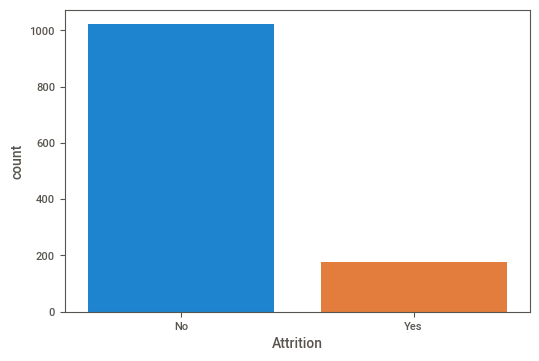

In [25]:
sns.countplot(x='Attrition',data=df)

#Almost 1000 employees are still working in INX Future whereas 200 employees have left the company

### Insights

Age:- All the employees of the company are aged between 20 and 70. From the sweetviz report, it can be observed that about 65% of the employees lie within the age group of 28 to 42

Gender:- It's a categorical feature which shows 60% of the employees are males and about 40% of the employees are females

EducationBackground:- It's a categorical features which shows that 40% of the employees belong to the Life-Sciences domain, 32% belongs to the medical field, 12% belongs to marketing and about 8% holds a technical degree. Also, 8% of the employees belong to other educational background

Marital_Status:- From the report, it is observed that about 45% of the employees are married whereas about 32% are found to be single. Also, 23% of the employees are found to be divorced

Emp_Dept:- About 32% of the employees belong to the sales department whereas 30% belongs to the Development department. 28% of the employees fall in the Research & development department while 5% belongs to the Human Resource department. Less than 10% of the employees fall in other departments

Job_role:- About 23% of the employees work as Sales Executive whereas 19% of the employees are developers and 8% of the employees work in Manager R&D job positions. Almost 5% of the employees work as Research scientist and more than 40% of the employees work in other job positions

Travel_frequency:- Almost 65% of the employees travel rarely for their business operations whereas 19% of the employees are found to travel frequently for business purposes. Almost 10% of the employees do not have any business travels at all

Dist_from_home:- Almost 62% of the employees travel less than 10 miles to reach their workplace whereas more than 20% of the employees have to cover a distance of 20 miles in order to reach the workplace. Also, 10% of the employees stay at a distance more than 20 miles from the workplace

Education_level:- Almost 37% of the employees belong to the educational level 3 whereas 27% belong to educational level 4 and 20% belong to educational level 2. Less than 5% of the population belong to educational level 5 (higher education) and almost 12% of the employees belong to educational level 1

Envt_satisfaction:- Almost 60% of the employees have rated 3 and 4 in terms of environment satisfaction on a scale of 1 to 5. Almost 40% have rated only 1 and 2 for environment satisfaction

Hourly_rate:- About 30% of the employees receive an hourly rate between 80 to 100 US dollars. The minimum hourly rate is found to 30 and the maximum hourly rate is almost 100 dollars. About 60% of the employees receive an hourly rate of atleast 60 dollars 

Job_involvement:- 60% of the employees were found to have a job involvement of rating 3 on a scale of 5. On a scale of 5, 22% of the employees were rated 2 and almost 10% were given the rating 4. About 3% of the employees were rated only 1 on a scale of 5 thereby showing less job involvement

Job_Level:- About 76% of the employees were found to hold job positions of levels 1 and 2 (lower job levels). 15% of the employees held positions of job level 3 and less than 10% of the employees held top positions of job levels 4 and 5 (higher levels)

Job_satisfaction:- About 60% of the employees were found to be quite satisfied in their jobs as they have rated 3 and 4 on a scale of 5. Almost 40% were not that satisfied with their jobs as they have given low ratings of 1 and 2 on a scale of 5

Overtime:- Almost 70% of the employes have not done overtime whereas 30% have done overtime

Last_sal_hike:- the last salary hike percent was found to be between 10 and 15 percent for almost 60% of the employees. About 22% of the employees received a salary hike between 15 and 20 percent and about 15% of the employees recieved a salary hike between 20 and 25 percent 

Relationship_satisfaction:- About 60% of the employees gave high ratings of 3 and 4 for relationship satisfaction. However, 20% of the employees gave rating 2 and 18% gave rating 1 on a scale of 5

Total_work_exp:- About 33% of the employees had a total work experience ranging between 0 to 5 years and 28% of the employees had work experience of almost 10 years. Almost 30% of the employees had work experience of more than 10 years

Training_last_yr:- About 40% of the employees received 2 trainings last year while 35% received 3 trainings last year. Almost 14% of the employees received 4 and 5 trainings last year and the remaining 11% haven't received any training at all

Work_life_bal:- Almost 60% of the employees gave a moderate rating of 3 wrt. work life balance. 22% of the employees rated 2 and less than 5% of the employees rated 1 on a scale of 5. About 9% of the employees gave a fairly good rating of 4 for work life balance

Exp_at_company:- About 83% of the employees have work experience ranging between 0 to 10 years in the current company. The remaining employees have more than 10 years of experience in the current company

Exp_current_role:- Almost 20% of the employees have been holding the current position since 1 year and almost 34% of the employees have been working in the current position for approximately 2.5 years. Almost 10% have been holding the current position for almost 5 years and less than 2% of the employees were working in the current position for more than 15 years

Years_last_promotion:- About 63% of the employees got promoted within last 1 year whereas 23% got a promotion within the alst 4 years. The remaining employees got a promotion 8 years ago.

Years_curr_mgr:- About 24% of the employees have been working with the current manager for about a year whereas 33% of the employees have been working with the current manager for almost 2.5 years. About 8% of the employees were working with the current manager for 5 years. The remaining employees have been working with the current manager for more than 5 years

Attrition:- Almost 15% of the employees left the company for reasons like resignation, termination etc whereas 85% of the employees stayed with the company

Performance_rating:- About 72% of the employees got a moderate rating of 3 on a sclae of 5 whereas 16% received a poor rating of 2. About 11% received good rating of 4 on a scale of 5



### Bivariate Analysis

In [26]:
## seperate numerical and categorical features for better results

In [27]:
# Numerical features
df_num = df[['Dist_from_home','Education_level','Envt_satisfaction','Hourly_rate','Job_involvement','Job_level','Job_satisfaction','No_companies_worked','Last_sal_hike','Relationship_satisfaction','Total_work_exp','Training_last_yr','Work_life_bal','Exp_at_company','Exp_current_role','Years_last_promotion','Years_curr_mgr']]

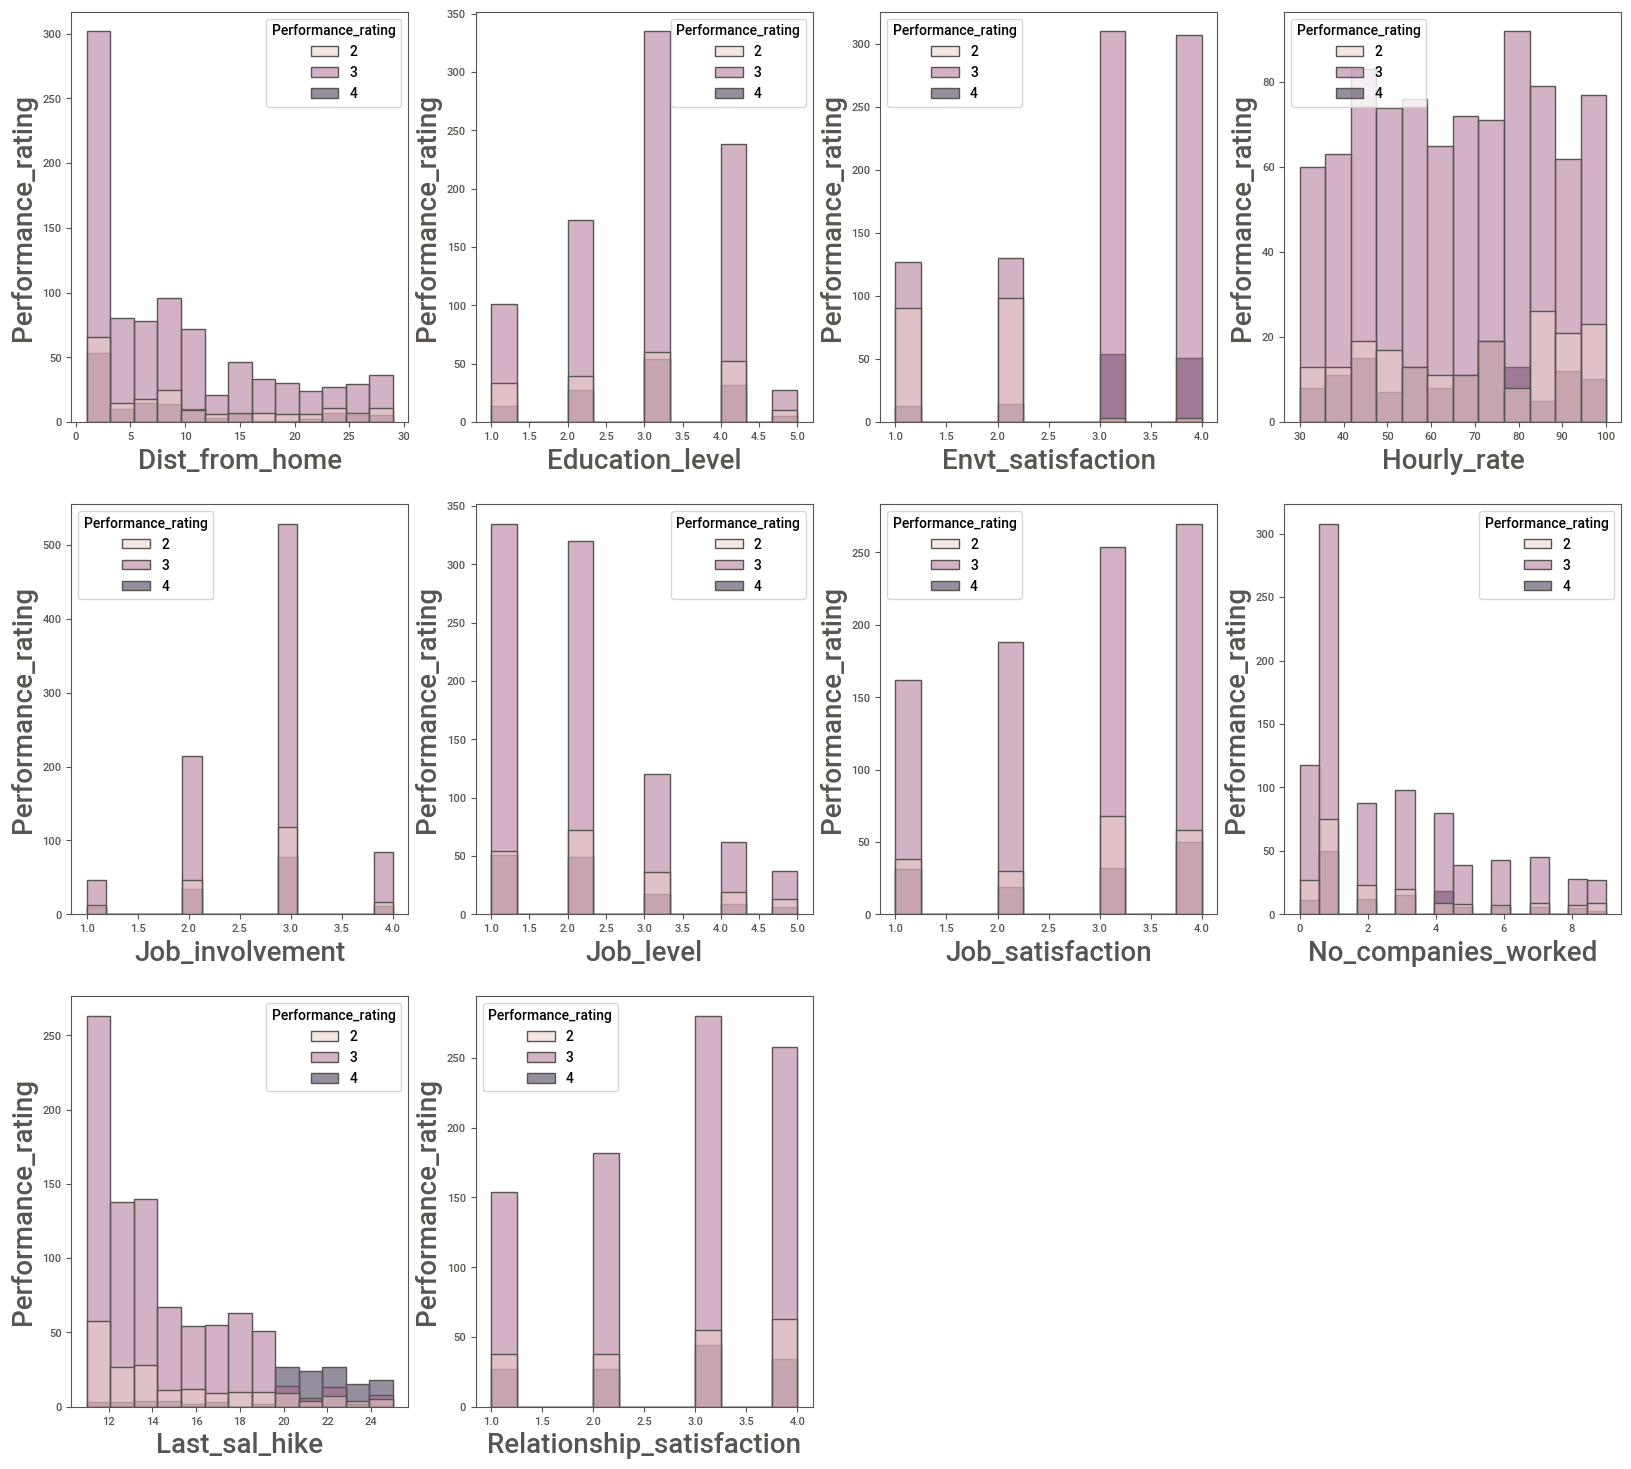

In [28]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in df_num:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sns.histplot(x=df_num[column].dropna(axis=0),hue=df['Performance_rating'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Performance_rating',fontsize=20)
    plotnumber+=1
plt.show()

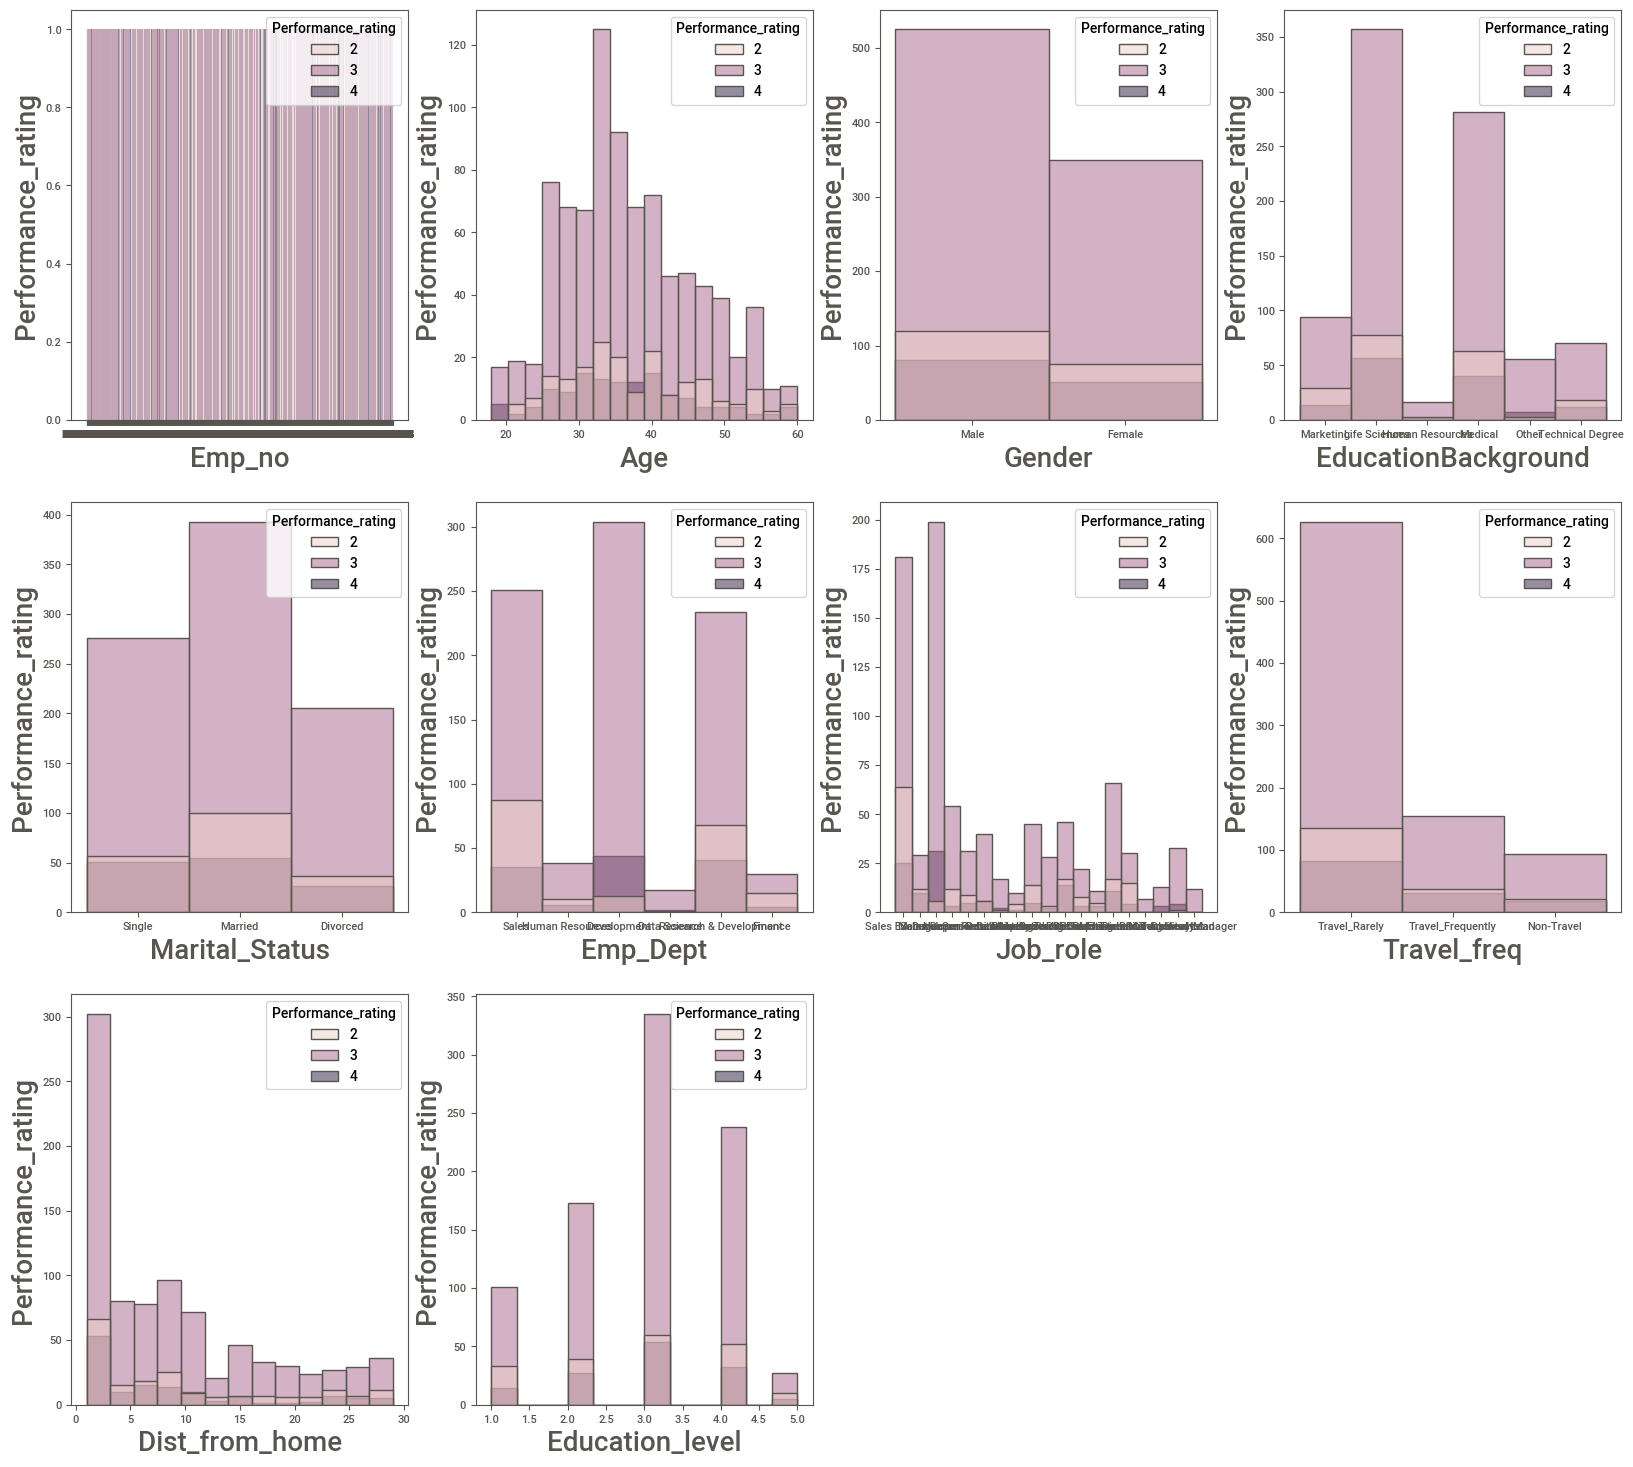

In [29]:
# Seperating the categorical and numerical features and applying different plots

plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sns.histplot(x=df[column].dropna(axis=0),hue=df['Performance_rating'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Performance_rating',fontsize=20)
    plotnumber+=1
plt.show()

In [30]:
#Copying the dataframe to another for performing analysis
df1 = df

In [31]:
df2=df1.groupby('Emp_Dept').sum()

In [32]:
df2

Age  Dist_from_home  Education_level  \
Emp_Dept                                                         
Data Science              760             193               55   
Development             13232            3173             1030   
Finance                  1783             582              150   
Human Resources          2075             468              162   
Research & Development  12854            3166              986   
Sales                   13598            3417             1088   

                        Envt_satisfaction  Hourly_rate  Job_involvement  \
Emp_Dept                                                                  
Data Science                           59         1245               58   
Development                           978        23764             1007   
Finance                               139         3268              141   
Human Resources                       142         3548              150   
Research & Development                952        22989              921   
Sales                                 989        24364             1001   

                        Job_level  Job_satisfaction  No_companies_worked  \
Emp_Dept                                                                   
Data Science                   42                54                   42   
Development                   700               992                 1017   
Finance                        95               130                  113   
Human Resources               111               138                  169   
Research & Development        685               933                  924   
Sales                         848              1032                  933   

                        Last_sal_hike  Relationship_satisfaction  \
Emp_Dept                                                           
Data Science                      329                         50   
Development                      5489                       1023   
Finance                           753                        132   
Human Resources                   796                        156   
Research & Development           5248                        897   
Sales                            5652                       1012   

                        Total_work_exp  Training_last_yr  Work_life_bal  \
Emp_Dept                                                                  
Data Science                       242                59             50   
Development                       3974               995            970   
Finance                            533               139            131   
Human Resources                    640               139            158   
Research & Development            4029               955            941   
Sales                             4178              1056           1043   

                        Exp_at_company  Exp_current_role  \
Emp_Dept                                                   
Data Science                       117                60   
Development                       2428              1457   
Finance                            353               230   
Human Resources                    401               193   
Research & Development            2397              1477   
Sales                             2797              1733   

                        Years_last_promotion  Years_curr_mgr  \
Emp_Dept                                                       
Data Science                              31              76   
Development                              737            1429   
Finance                                   96             217   
Human Resources                           98             210   
Research & Development                   770            1382   
Sales                                    901            1612   

                        Performance_rating  
Emp_Dept                                    
Data Science                            61  
Development 

### Plotting other graphs for better analysis

In [33]:
df21=df1.groupby(['Job_level','Job_satisfaction'])['Emp_no'].count()
df21

Job_level  Job_satisfaction
1          1                    82
           2                    89
           3                   133
           4                   136
2          1                    83
           2                    85
           3                   132
           4                   141
3          1                    40
           2                    29
           3                    47
           4                    57
4          1                    17
           2                    20
           3                    21
           4                    32
5          1                     9
           2                    14
           3                    21
           4                    12
Name: Emp_no, dtype: int64

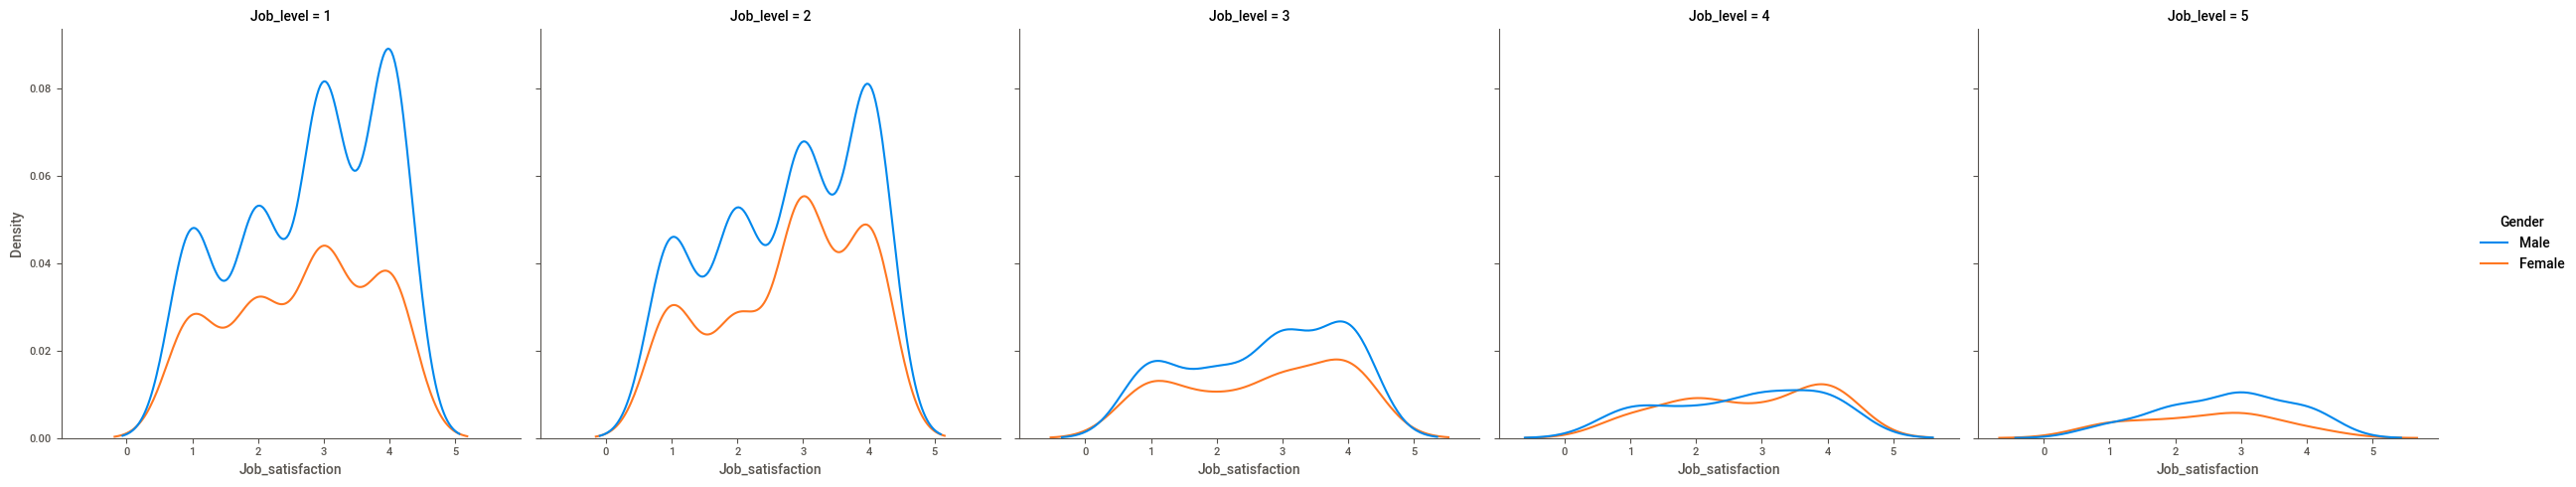

In [34]:
sns.displot(data=df,x='Job_satisfaction',col='Job_level',color='c',hue='Gender',kind='kde')

#Job level 1: Out of 440 employees in Job level 1, 269 employees are quite satisfied in their job as per their ratings
#Job Level 2: Out of 441 employees in Job level 2, 273 employees are fairly satisfied in their jobs
#Job Level 3: Out of 173 employees in Job level 3, 104 employees are found to have moderate to good job satisfaction
#Job Level 4: Out of 90 employees in Job level 4, 53 employees have fairly good job satisfaction
#Job Level 5: Out of 56 employees under Job level 5, 33 employees are quite satisfied in their jobs

In [35]:
df22=df1.groupby(['Emp_Dept','Job_satisfaction'])['Emp_no'].count()
df22

Emp_Dept                Job_satisfaction
Data Science            1                     3
                        2                     5
                        3                     7
                        4                     5
Development             1                    75
                        2                    61
                        3                   105
                        4                   120
Finance                 1                     8
                        2                    11
                        3                    20
                        4                    10
Human Resources         1                    10
                        2                    19
                        3                    10
                        4                    15
Research & Development  1                    66
                        2                    66
                        3                   109
                        4                   102

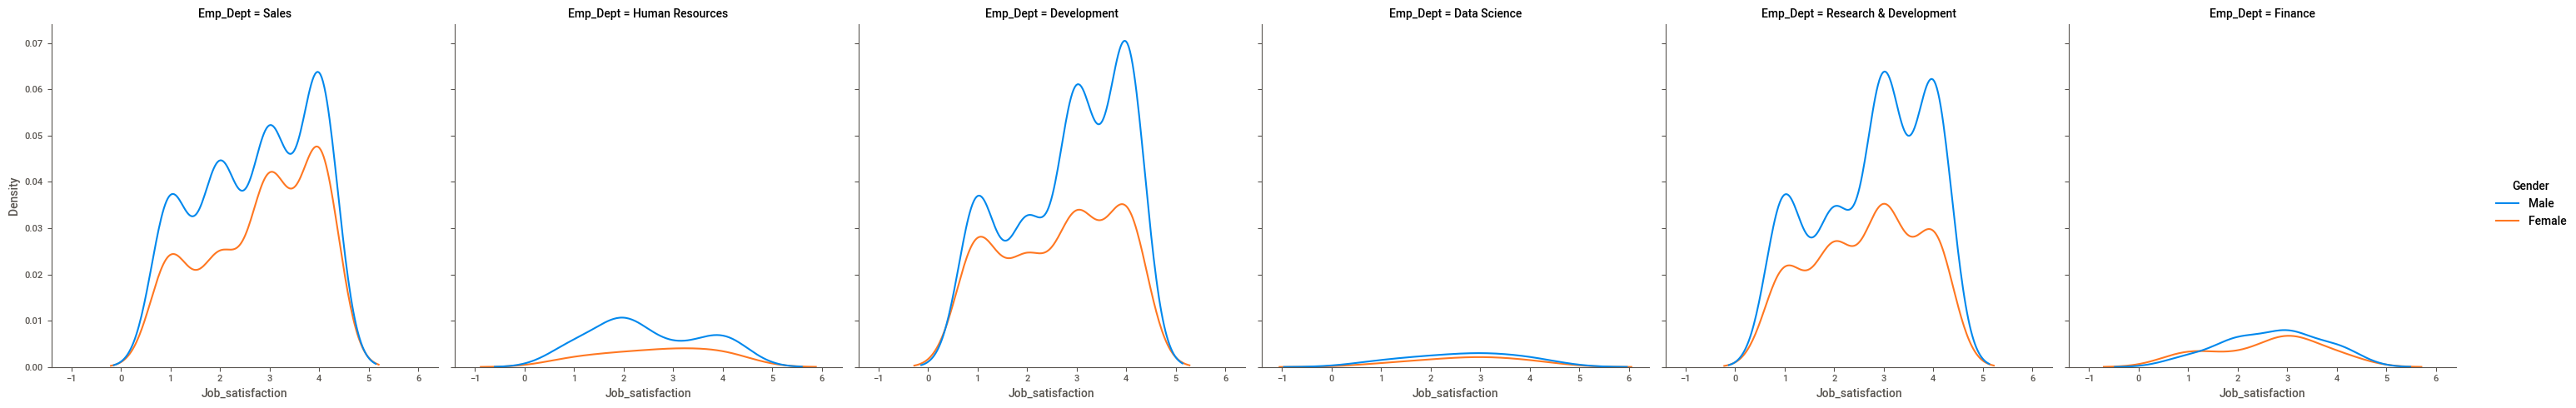

In [36]:
sns.displot(data=df,x='Job_satisfaction',col='Emp_Dept',color='c',hue='Gender',kind='kde')

#The job satisfaction ratings in different departments are as follows:-

#Data Science: Out of 20 employees in Data Science dept, 12 employees are fairly satisfied in their jobs while 8 employees have rated poorly
#Development: Out of 361 employees in Development, 225 employees are found to have moderate to good job satisfaction whereas 136 employees are not satisfied
#Finance: Out of 49 employees in Finance dept, 30 employees are found to have moderate to good job satisfaction while 19 employees have low job satisfaction
#Human Resources: Out of 54 employees in HR dept, 25 employees are fairly satisfied in their jobs whereas 29 employees are not satisfied
#Research & Development: Out of 343 employees in R&D, 211 employees have moderate to high job satisfaction while 132 employees have low job satisfaction
#Sales: Out of 373 employees, 229 have rated fairly good in terms of job satisfaction while 144 are not satisfied

In [37]:
df26=df1.groupby(['Emp_Dept','Envt_satisfaction'])['Emp_no'].count()
df26

Emp_Dept                Envt_satisfaction
Data Science            1                      2
                        2                      4
                        3                      7
                        4                      7
Development             1                     71
                        2                     69
                        3                    115
                        4                    106
Finance                 1                      7
                        2                     12
                        3                     12
                        4                     18
Human Resources         1                     10
                        2                     11
                        3                     22
                        4                     11
Research & Development  1                     66
                        2                     61
                        3                    100
                        4  

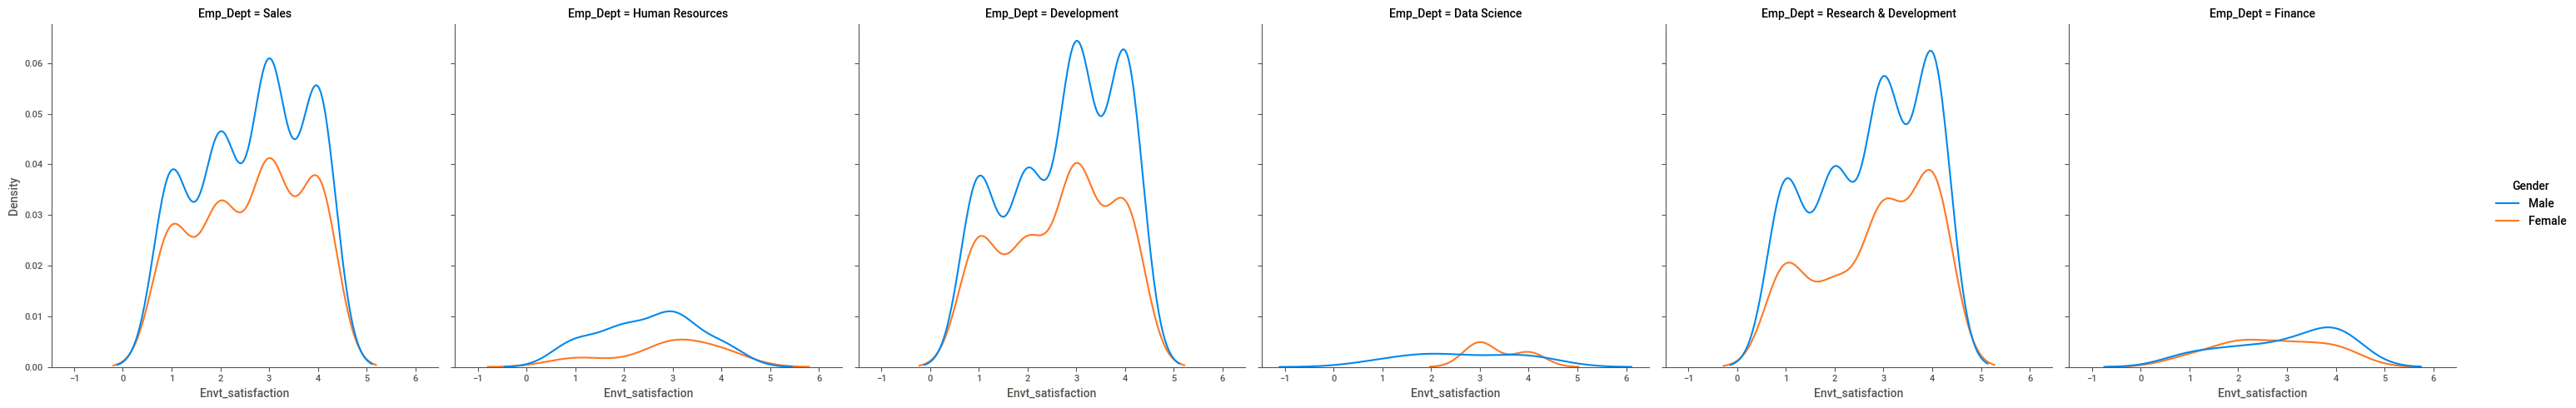

In [38]:
sns.displot(data=df,x='Envt_satisfaction',col='Emp_Dept',color='c',hue='Gender',kind='kde')

#The envt satisfaction ratings in different departments are as follows:-

#Data Science: Out of 20 employees in Data Science dept, 14 employees have moderate to high envt satisfaction while 6 employees have rated poorly
#Development: Out of 361 employees in Development, 221 employees have modertae to high envt satisfaction while 140 employees have rated poorly
#Finance: Out of 49 employees in Finance dept, 30 employees have moderate to high envt satisfaction while 19 employees have rated poorly
#Human Resources: Out of 54 employees in HR dept, 33 employees have moderate to high envt satisfaction while 21 employees have rated poorly
#Research & Development: Out of 343 employees in R&D, 216 employees have moderate to high envt satisfaction while 127 employees have rated poorly
#Sales: Out of 373 employees, 214 employees have moderate to high envt satisfaction while 159 employees have rated poorly

In [39]:
df27=df1.groupby(['Emp_Dept','Relationship_satisfaction'])['Emp_no'].count()
df27

Emp_Dept                Relationship_satisfaction
Data Science            1                              5
                        2                              5
                        3                              5
                        4                              5
Development             1                             57
                        2                             64
                        3                            122
                        4                            118
Finance                 1                             10
                        2                              9
                        3                             16
                        4                             14
Human Resources         1                              7
                        2                              9
                        3                             21
                        4                             17
Research & Development  1             

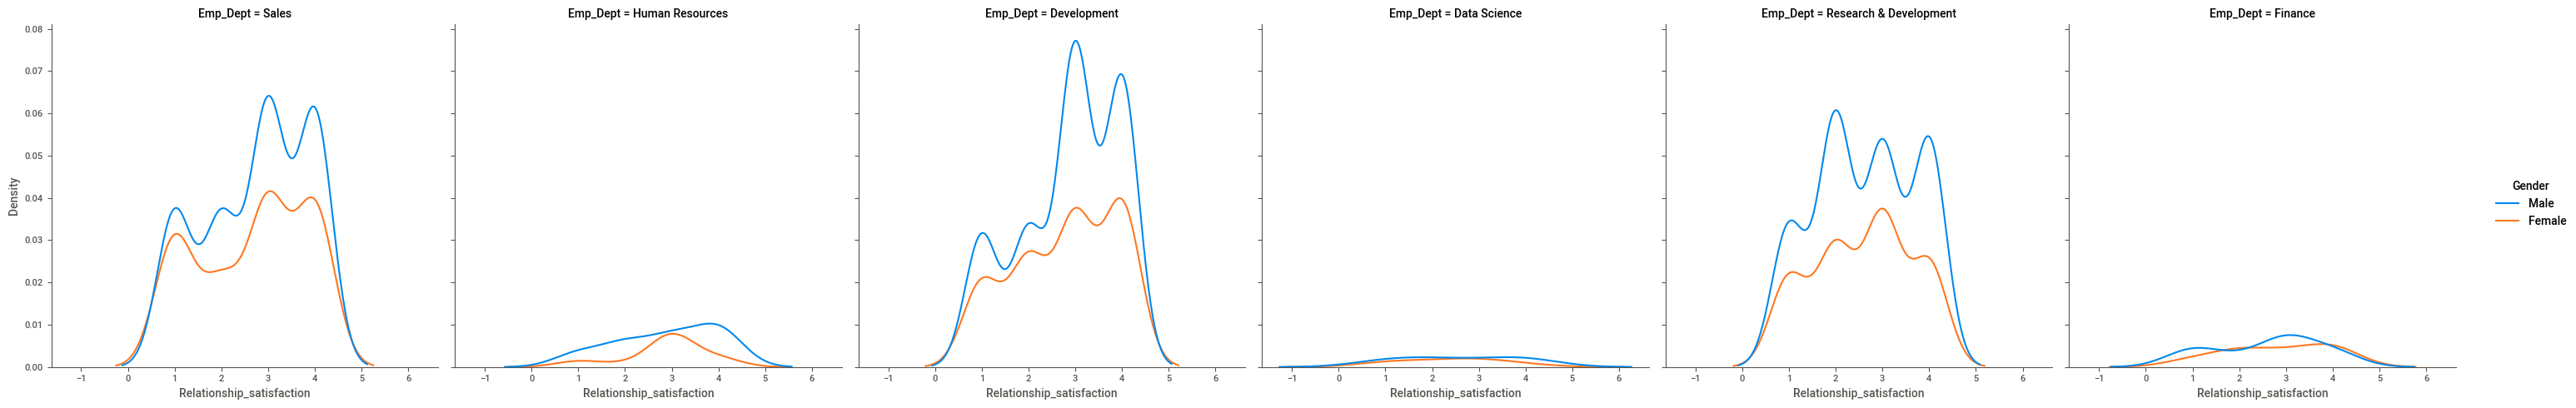

In [40]:
sns.displot(data=df,x='Relationship_satisfaction',col='Emp_Dept',color='c',hue='Gender',kind='kde')

#The relationship satisfaction ratings in different departments are as follows:-

#Data Science: Out of 20 employees in Data Science dept, 10 employees have moderate to high relationship satisfaction while 10 employees have rated poorly
#Development: Out of 361 employees in Development, 240 employees have moderate to high relationship satisfaction while 121 employees have rated poorly
#Finance: Out of 49 employees in Finance dept, 30 employees have moderate to high relationship satisfaction while 19 employees have rated poorly
#Human Resources: Out of 54 employees in HR dept, 38 employees have moderate to high relationship satisfaction while 16 employees have rated poorly
#Research & Development: Out of 343 employees in R&D, 185 employees have moderate to high relationship satisfaction while 158 employees have rated poorly
#Sales: Out of 373 employees, 231 employees have moderate to high relationship satisfaction while 142 employees have rated poorly

In [41]:
df28=df1.groupby(['Emp_Dept','Job_involvement'])['Emp_no'].count()
df28

Emp_Dept                Job_involvement
Data Science            2                    3
                        3                   16
                        4                    1
Development             1                   17
                        2                   84
                        3                  218
                        4                   42
Finance                 1                    2
                        2                   12
                        3                   25
                        4                   10
Human Resources         1                    2
                        2                   14
                        3                   32
                        4                    6
Research & Development  1                   23
                        2                   90
                        3                  202
                        4                   28
Sales                   1                   26
                    

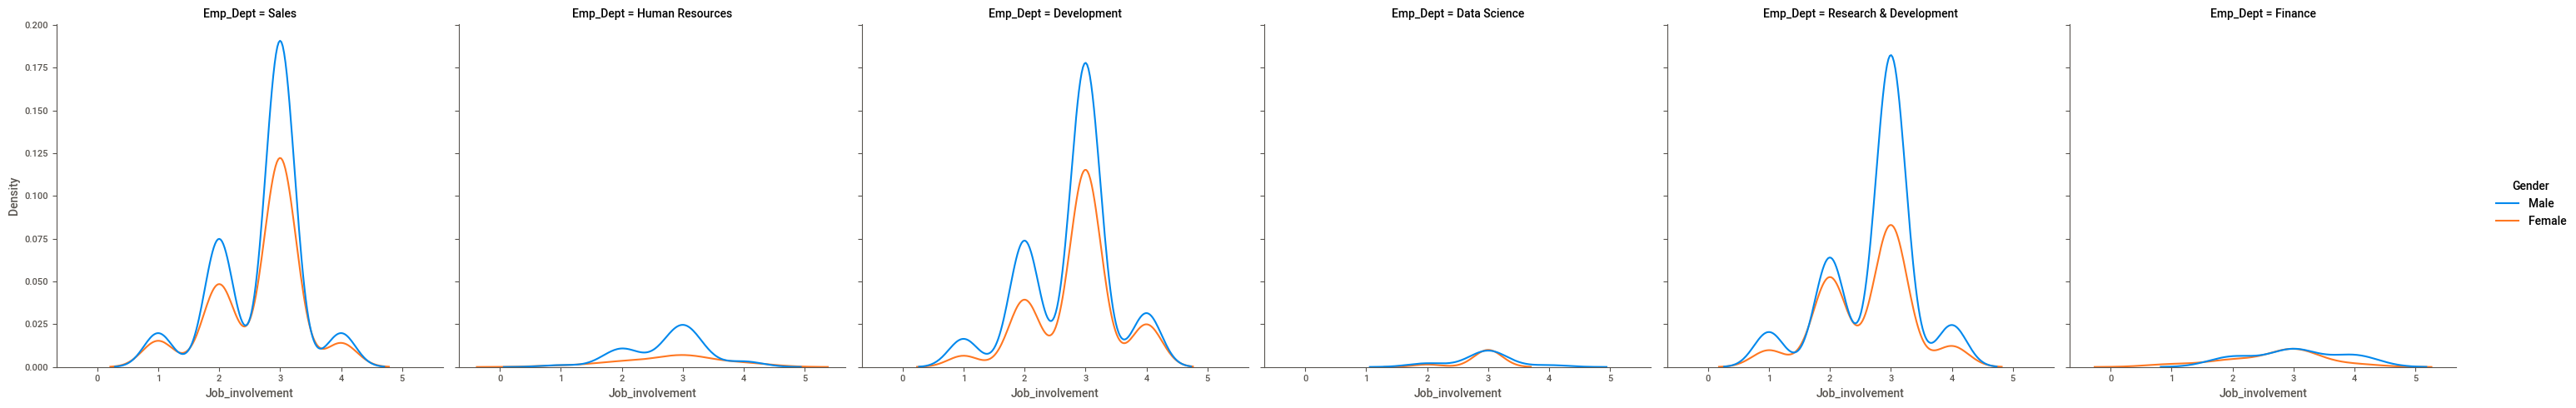

In [42]:
sns.displot(data=df,x='Job_involvement',col='Emp_Dept',color='c',hue='Gender',kind='kde')

#The job involvement ratings in different departments are as follows:-

#Data Science: Out of 20 employees in Data Science dept, 17 employees have moderate to high job involvement while 3 employees have been rated poorly
#Development: Out of 361 employees in Development, 260 employees have moderate to high job involvement while 101 employees have been rated poorly
#Finance: Out of 49 employees in Finance dept, 35 employees have moderate to high job involvement while 14 employees have been rated poorly
#Human Resources: Out of 54 employees in HR dept, 38 employees have moderate to high job involvement while 16 employees have been rated poorly
#Research & Development: Out of 343 employees in R&D, 230 employees have moderate to high job involvement while 113 employees have been rated poorly
#Sales: Out of 373 employees, 256 employees have moderate to high job involvement while 117 employees have been rated poorly

In [43]:
df29=df1.groupby(['Emp_Dept','Performance_rating'])['Emp_no'].count()
df29

Emp_Dept                Performance_rating
Data Science            2                       1
                        3                      17
                        4                       2
Development             2                      13
                        3                     304
                        4                      44
Finance                 2                      15
                        3                      30
                        4                       4
Human Resources         2                      10
                        3                      38
                        4                       6
Research & Development  2                      68
                        3                     234
                        4                      41
Sales                   2                      87
                        3                     251
                        4                      35
Name: Emp_no, dtype: int64

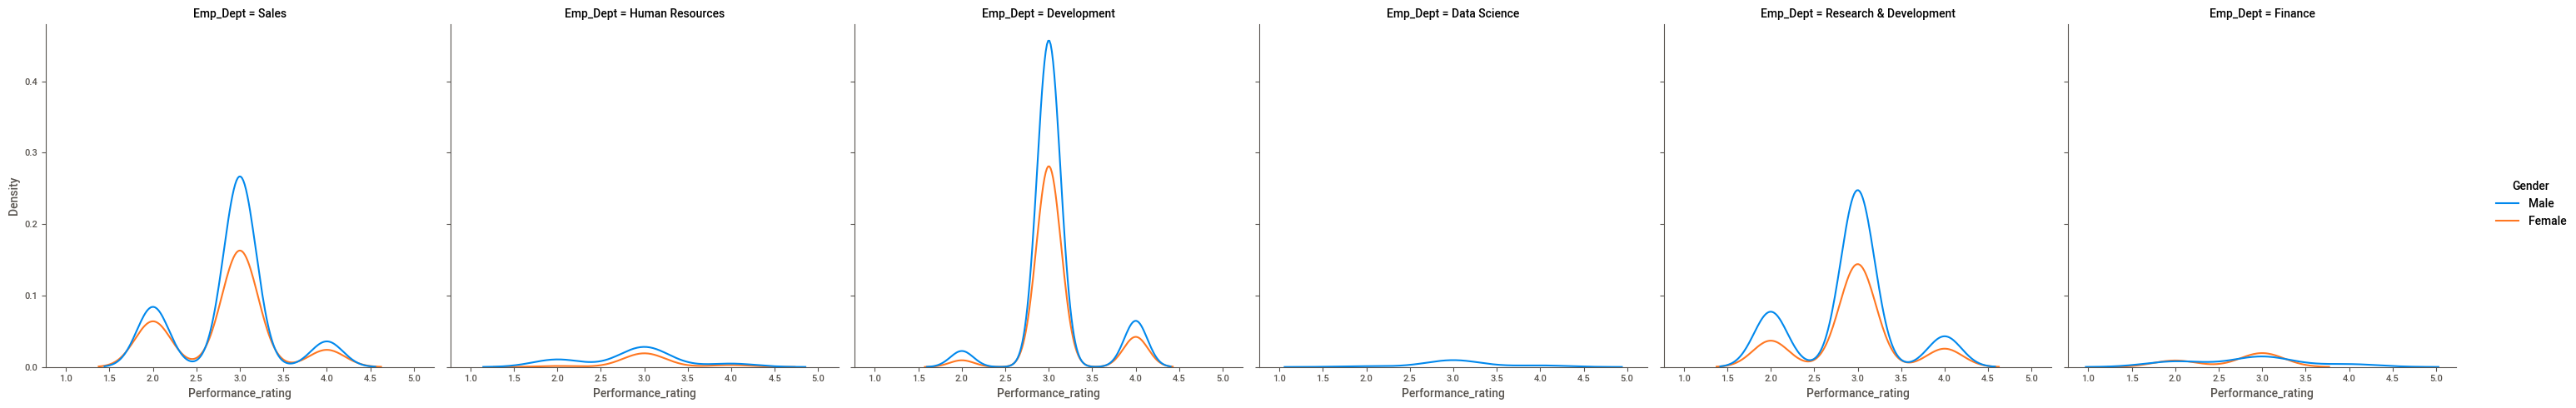

In [44]:
sns.displot(data=df,x='Performance_rating',col='Emp_Dept',color='c',hue='Gender',kind='kde')

#The performance ratings of employees in different departments are as follows:-

#Data Science: Out of 20 employees in Data Science dept, 19 employees have moderate to high performance rating while 1 employee has been rated poorly
#Development: Out of 361 employees in Development, 348 employees have moderate to high performance rating while 13 employees have been rated poorly
#Finance: Out of 49 employees in Finance dept, 34 employees have moderate to high performance rating while 15 employees have been rated poorly
#Human Resources: Out of 54 employees in HR dept, 44 employees have moderate to high performance rating while 10 employees have been rated poorly
#Research & Development: Out of 343 employees in R&D, 275 employees have moderate to high performance rating while 68 employees have been rated poorly
#Sales: Out of 373 employees, 286 employees have moderate to high performance rating while 87 employees have been rated poorly

In [45]:
df30=df1.groupby(['Emp_Dept','Training_last_yr'])['Emp_no'].count()
df30

Emp_Dept                Training_last_yr
Data Science            1                     1
                        2                    10
                        3                     3
                        4                     2
                        5                     3
                        6                     1
Development             0                    10
                        1                    23
                        2                   134
                        3                   123
                        4                    29
                        5                    33
                        6                     9
Finance                 0                     4
                        1                     1
                        2                    17
                        3                    16
                        4                     3
                        5                     4
                        6                     4

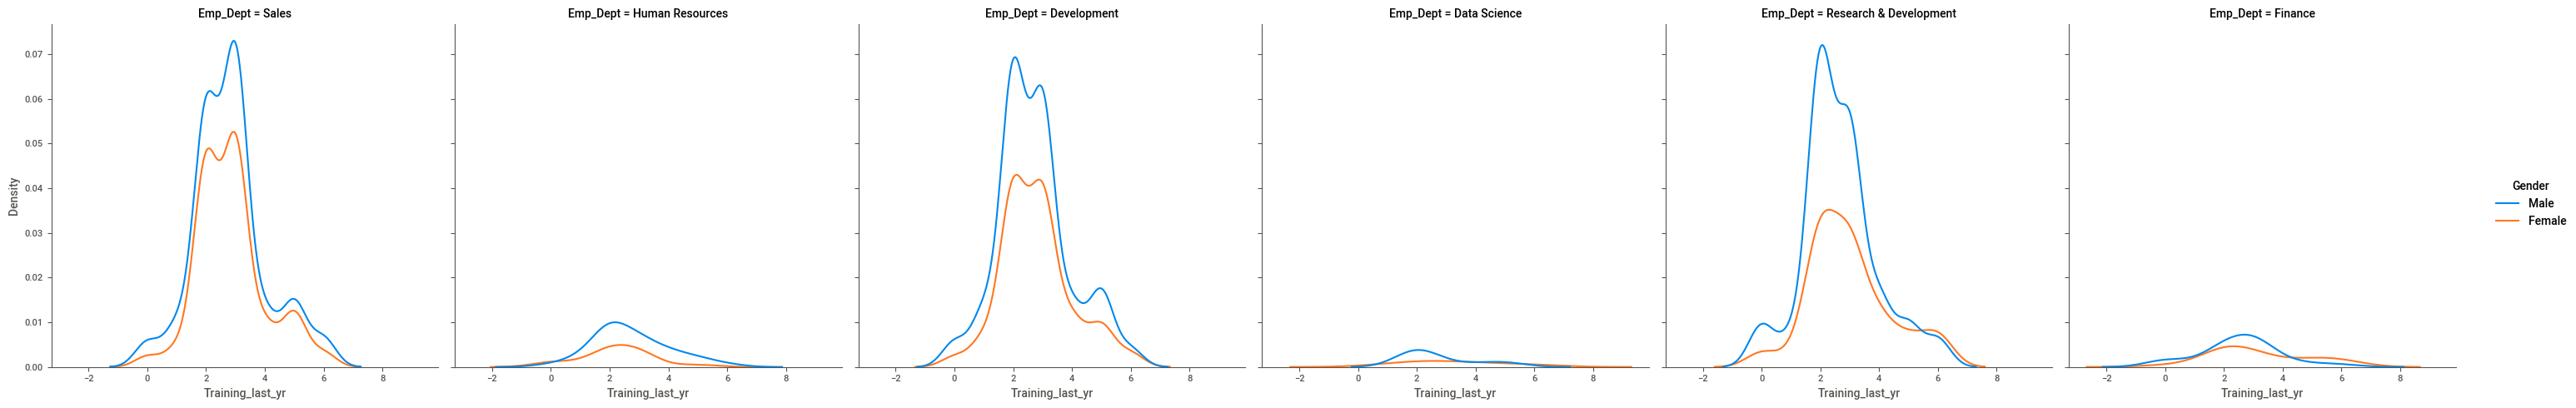

In [46]:
sns.displot(data=df,x='Training_last_yr',col='Emp_Dept',color='c',hue='Gender',kind='kde')

#The number of trainings carried out for employees in various departments are as follows:-

#Data Science: All the 20 employees in Data science dept have got atleast 1 training since last year
#Development: 10 employees haven't received any training at all while 351 employees received atleast 1 training
#Finance: 4 employees received no training whereas 45 employees received atleast 1 training
#Human Resources: 3 employees haven't received any training at all while 51 employees received atleat 1 training
#Research & Development: 17 employees received no training at all while 326 employees received atleast 1 training
#Sales: 10 employees received no training at all while 363 employees received atleast 1 training

In [47]:
df31=df1.groupby(['Emp_Dept','Last_sal_hike'])['Emp_no'].count()
df31

Emp_Dept      Last_sal_hike
Data Science  11                2
              13                2
              14                3
              16                3
              17                3
                               ..
Sales         21               13
              22               15
              23                6
              24                5
              25                3
Name: Emp_no, Length: 79, dtype: int64

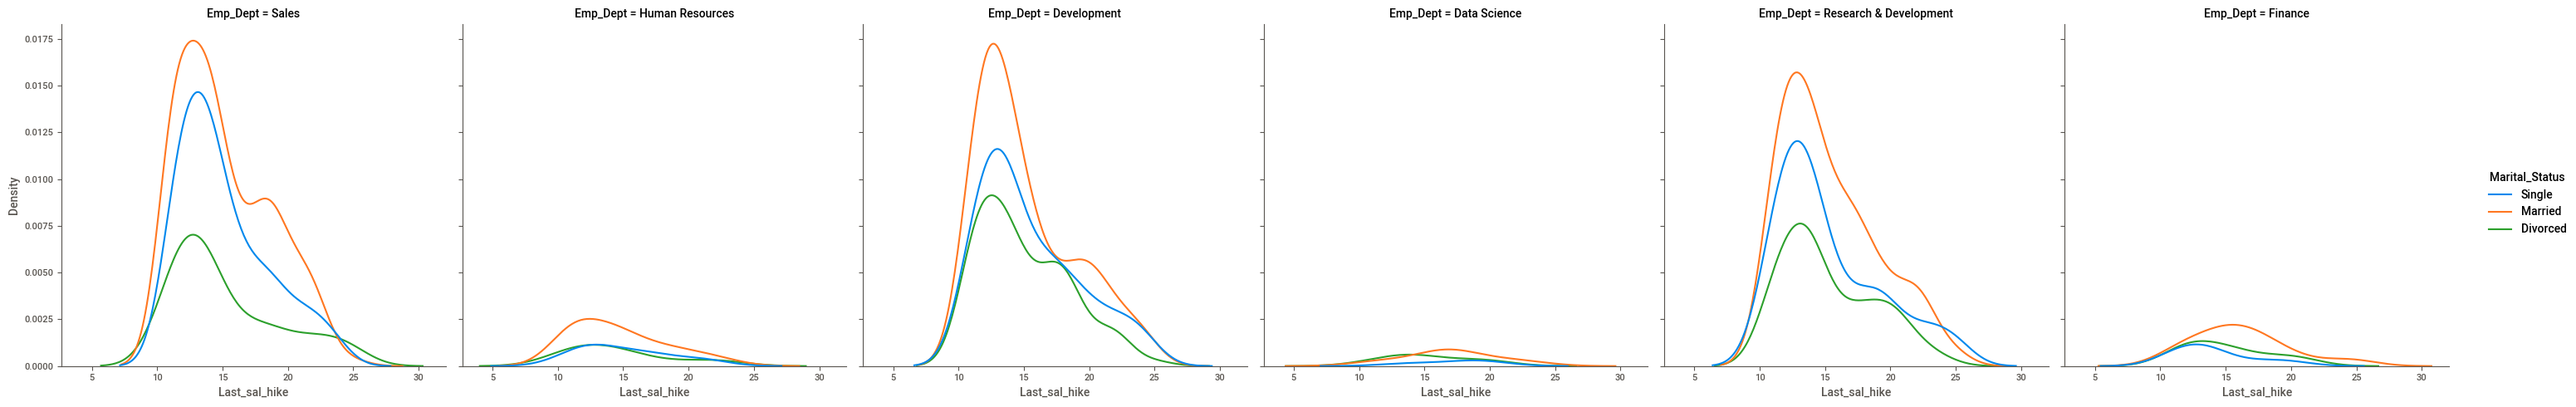

In [48]:
sns.displot(data=df,x='Last_sal_hike',col='Emp_Dept',color='c',hue='Marital_Status',kind='kde')

#Lets analyse the last salary hike % of employees in each of the departments:

#Data Science: 35% of the employees in Data Science dept received a salary hike between 11% and 15% while 3 employees received more than 20% hike
#Development: About 225 employees in this dept received a salary hike between 11% and 15% while 56 employees received more than 20% hike in salary
#Finance: About 29 employees in this dept received a salary hike between 11% and 15% while 6 employees received more than 20% hike in salary
#Human Resources: About 36 employees in this dept received a salary hike between 11% and 15% while 7 employees received more than 20% hike in salary
#Research & Development: About 212 employees in this dept received a salary hike between 11% and 15% while 58 employees received more than 20% hike in salary
#Sales: About 237 employees in this dept received a salary hike between 11% and 15% while 53 employees received more than 20% hike in salary

In [49]:
df32=df1.groupby(['Emp_Dept','Years_last_promotion'])['Emp_no'].count()
df32

#Let's analyse the no. of years passed by since last promotion for employees across various departments:-

#Data Science: 2 employees havent received a promotion since 7 years
#Development: 18 employees haven't received a promotion in the last 10 years. Out of which, 3 employees havent been promoted in 15 years
#Finance: 1 employee hasn't received a promotion in the last 12 years and 4 employees havent got a promotion since 7 years
#Human Resources: 2 employees haven't received a promotion in the last 10 years and 3 employees havent got a promotion since 7 years
#Research & Development: 19 employees havent received a promotion since 10 years
#Sales: 21 employee haven't received a promotion in the last 12 years

Emp_Dept      Years_last_promotion
Data Science  0                       10
              1                        4
              2                        1
              3                        1
              4                        2
                                      ..
Sales         11                      10
              12                       2
              13                       2
              14                       1
              15                       5
Name: Emp_no, Length: 72, dtype: int64

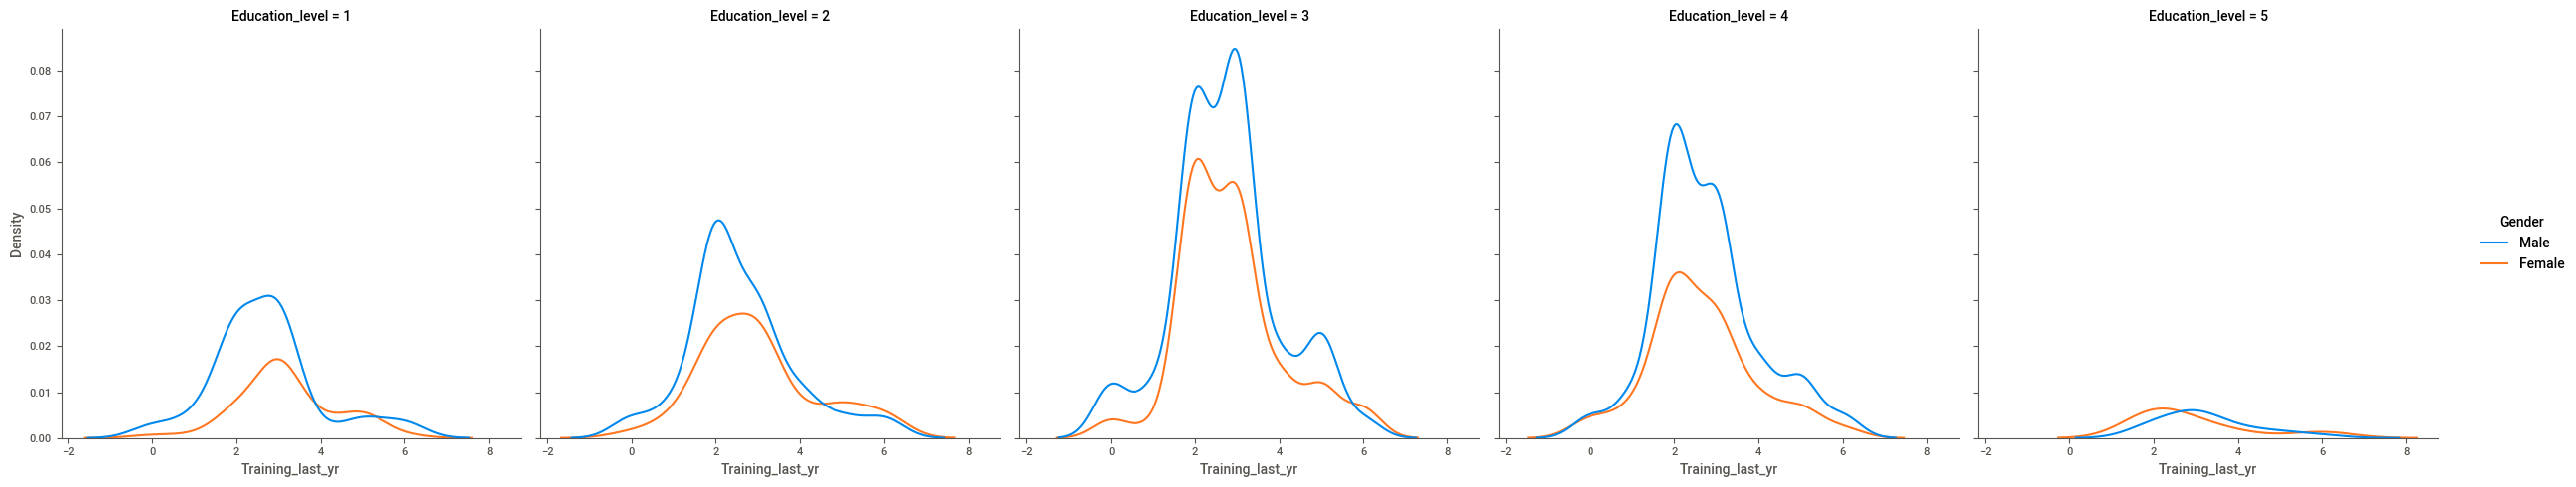

In [50]:
sns.displot(data=df,x='Training_last_yr',col='Education_level',color='c',hue='Gender',kind='kde')

#Employees with education levels 3 and 4 have received more trainings than those with education levels 1 and 2
#Employees with education level 5 have received the least number of trainings

### Insights from Bivariate Analysis

## Data Preprocessing

### Checking for Missing values

In [51]:
df.isnull().sum()

# As seen, missing values are not present in any of the features. So, treatment not required

Emp_no                       0
Age                          0
Gender                       0
EducationBackground          0
Marital_Status               0
Emp_Dept                     0
Job_role                     0
Travel_freq                  0
Dist_from_home               0
Education_level              0
Envt_satisfaction            0
Hourly_rate                  0
Job_involvement              0
Job_level                    0
Job_satisfaction             0
No_companies_worked          0
OverTime                     0
Last_sal_hike                0
Relationship_satisfaction    0
Total_work_exp               0
Training_last_yr             0
Work_life_bal                0
Exp_at_company               0
Exp_current_role             0
Years_last_promotion         0
Years_curr_mgr               0
Attrition                    0
Performance_rating           0
dtype: int64

### Checking for Outliers for Numerical features

#### Using distribution plots

In [52]:
# Numerical features
df_num1 = df[['Age','Dist_from_home','Education_level','Envt_satisfaction','Hourly_rate','Job_involvement','Job_level','Job_satisfaction','No_companies_worked','Last_sal_hike','Relationship_satisfaction','Total_work_exp','Training_last_yr','Work_life_bal','Exp_at_company','Exp_current_role','Years_last_promotion','Years_curr_mgr','Performance_rating']]

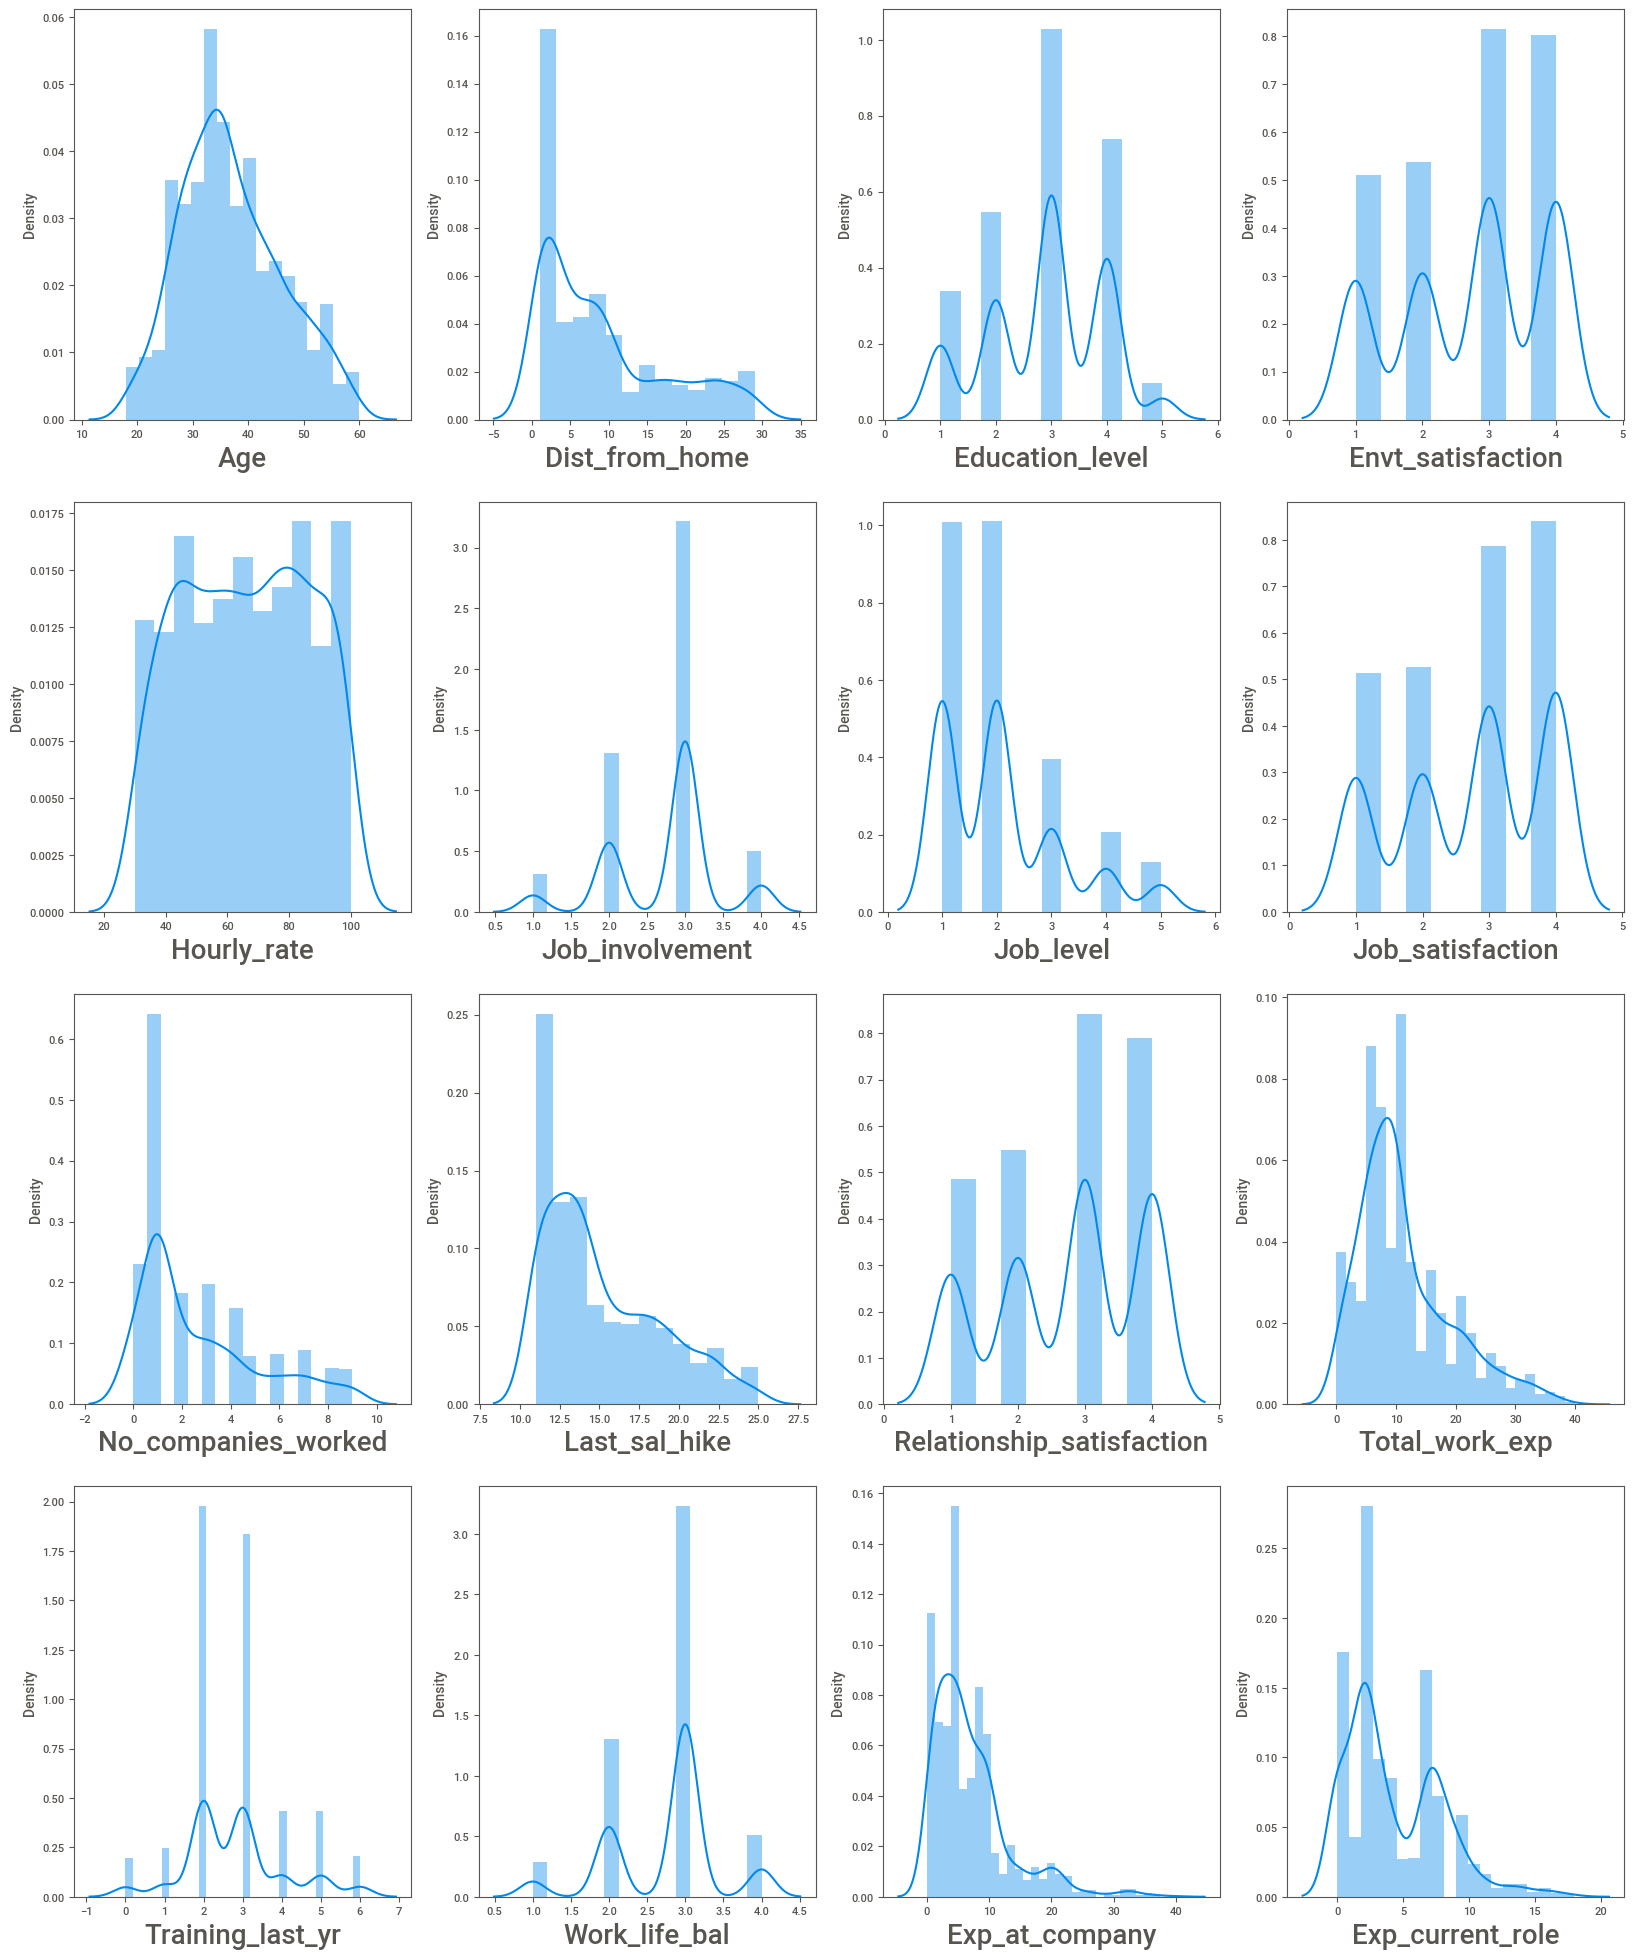

In [53]:
## Let's see how data is distributed for every feature/ column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_num1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df_num1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

#Observation:
# outliers are present.Needs treatment for outliers

### Visualizing Outliers Using Boxplots

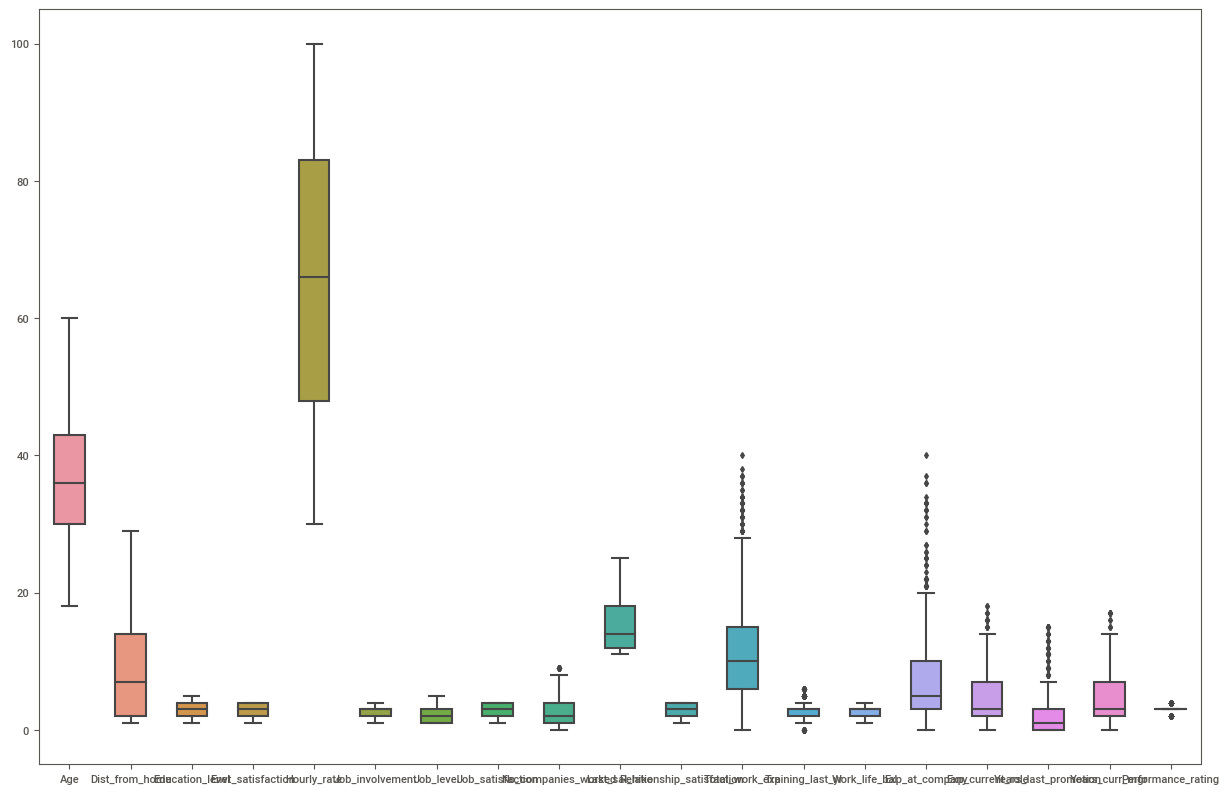

In [54]:
## checking the outliers for numeric features using boxplot
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_num1, width= 0.5,ax=ax,  fliersize=3)
plt.show()

#Observation: Needs outlier treatment # here visualization is difficult, so trying other way of plotting outliers.

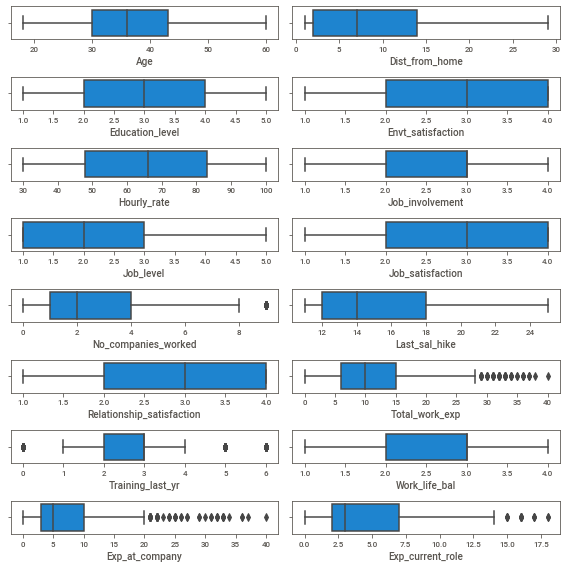

In [55]:
#Creating boxplots in a different format for easy visualization

%matplotlib inline
plt.figure(figsize=(8,8), tight_layout=True)  
plotnumber=1
for column in df_num1:
    if plotnumber<=16:
        ax=plt.subplot(8,2,plotnumber) 
        #plt.xlabel(column,fontsize = 5)   
        sns.boxplot(x=df_num1[column])
        plotnumber+=1

## Outlier Treatment

In [56]:
# Now seperating features individually and removing outliers
# Used IQR method for treating outliers 

### The final dataframe will be df only

### Checking Outlier for the feature "Age"

<AxesSubplot:xlabel='Age', ylabel='Density'>

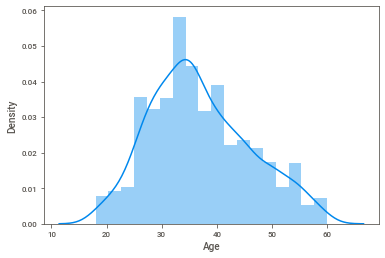

In [57]:
sns.distplot(df.Age)

<AxesSubplot:xlabel='Age'>

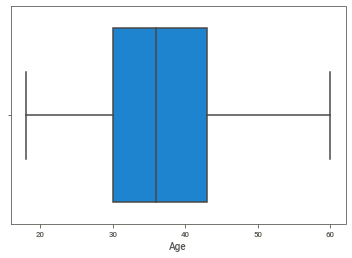

In [58]:
sns.boxplot(df.Age)

# As seen, no outlier is present in the age feature

### Checking Outlier for the feature "Dist_from_home"

<AxesSubplot:xlabel='Dist_from_home', ylabel='Density'>

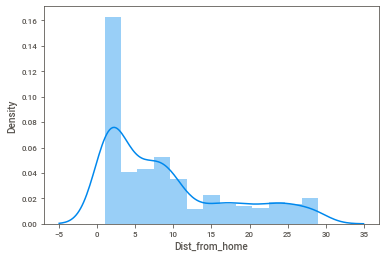

In [59]:
sns.distplot(df.Dist_from_home)

<AxesSubplot:xlabel='Dist_from_home'>

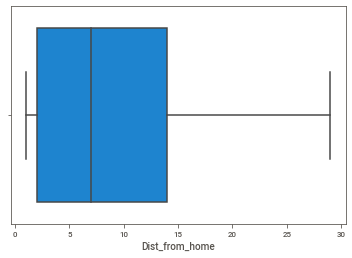

In [60]:
sns.boxplot(df.Dist_from_home)

# No outlier is present for the Dist_from_home feature

### Checking Outlier for the feature "Education_level"

<AxesSubplot:xlabel='Education_level', ylabel='Density'>

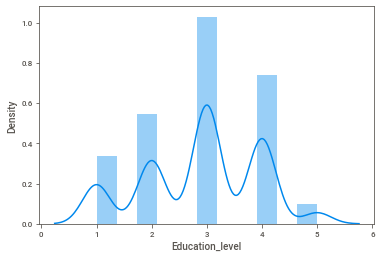

In [61]:
sns.distplot(df.Education_level)

<AxesSubplot:xlabel='Education_level'>

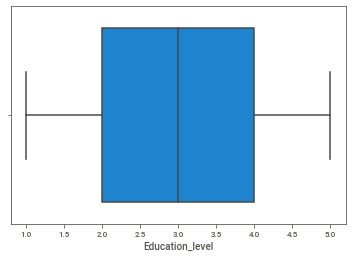

In [62]:
sns.boxplot(df.Education_level)

# No outlier present for the Education_level feature

### Checking Outlier for the feature "Envt_satisfaction"

<AxesSubplot:xlabel='Envt_satisfaction', ylabel='Density'>

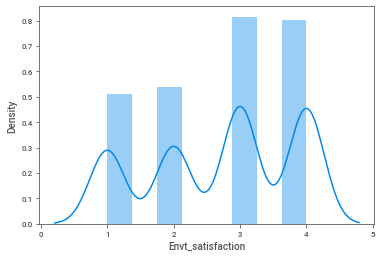

In [63]:
sns.distplot(df.Envt_satisfaction)

<AxesSubplot:xlabel='Envt_satisfaction'>

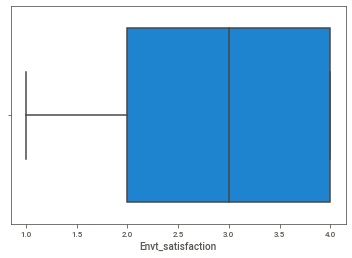

In [64]:
sns.boxplot(df.Envt_satisfaction)

# No outlier present for Envt_satisfaction feature

### Checking Outlier for the feature "Hourly_rate"

<AxesSubplot:xlabel='Hourly_rate', ylabel='Density'>

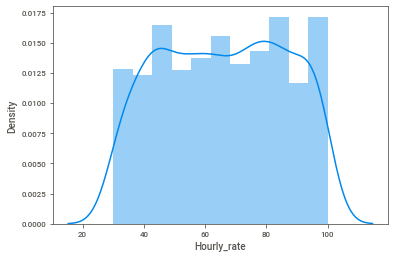

In [65]:
sns.distplot(df.Hourly_rate)

<AxesSubplot:xlabel='Hourly_rate'>

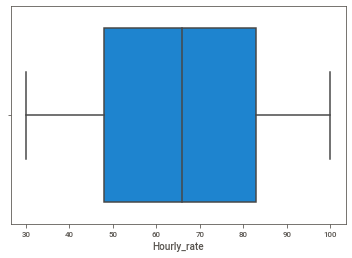

In [66]:
sns.boxplot(df.Hourly_rate)

# No outlier present

### Checking Outlier for the feature "Job_involvement"

<AxesSubplot:xlabel='Hourly_rate', ylabel='Density'>

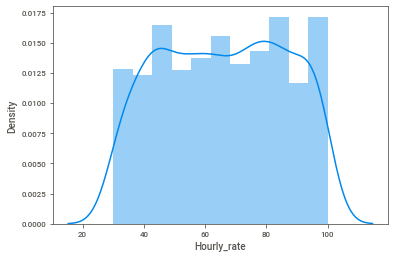

In [67]:
sns.distplot(df.Hourly_rate)


<AxesSubplot:xlabel='Hourly_rate'>

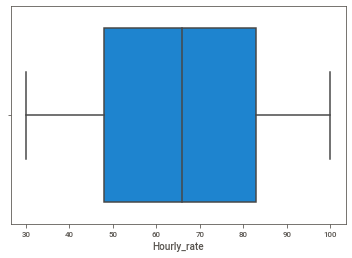

In [68]:
sns.boxplot(df.Hourly_rate)

# No outlier present for this feature

### Checking Outlier for the feature "Job_level"

<AxesSubplot:xlabel='Job_level', ylabel='Density'>

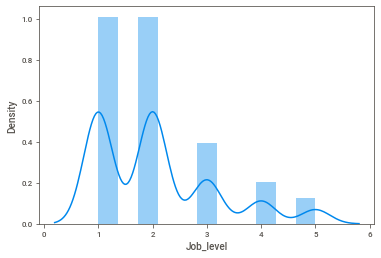

In [69]:
sns.distplot(df.Job_level)

<AxesSubplot:xlabel='Job_level'>

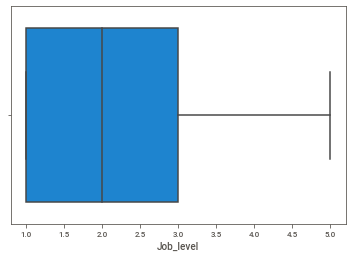

In [70]:
sns.boxplot(df.Job_level)

# No outlier present for this feature

### Checking Outlier for the feature "Job_satisfaction"

<AxesSubplot:xlabel='Job_satisfaction', ylabel='Density'>

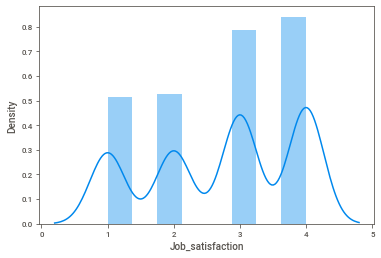

In [71]:
sns.distplot(df.Job_satisfaction)

<AxesSubplot:xlabel='Job_satisfaction'>

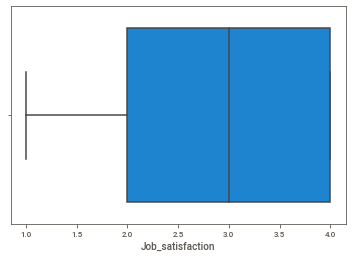

In [72]:
sns.boxplot(df.Job_satisfaction)

# No outlier present for this feature

### Checking Outlier for the feature "No_companies_worked"

<AxesSubplot:xlabel='No_companies_worked', ylabel='Density'>

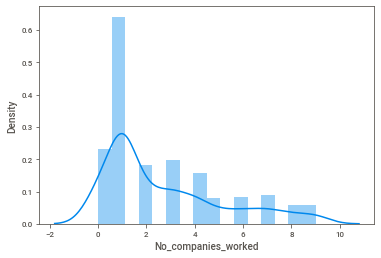

In [73]:
sns.distplot(df.No_companies_worked)

<AxesSubplot:xlabel='No_companies_worked'>

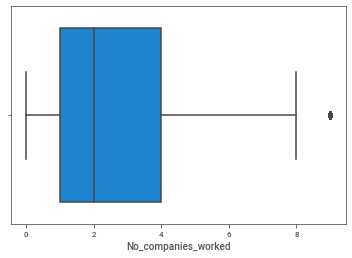

In [74]:
sns.boxplot(df.No_companies_worked)

In [75]:
## Needs outlier treatment for the feature "No_companies_worked"

### Removing Outlier For "No_companies_worked" Feature Using IQR

In [76]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['No_companies_worked'], interpolation = 'midpoint') 

IQR

3.0

In [77]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['No_companies_worked'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['No_companies_worked'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [78]:
min_limit

-3.5

In [79]:
#filtering the data
df.loc[df['No_companies_worked']<min_limit]

Empty DataFrame
Columns: [Emp_no, Age, Gender, EducationBackground, Marital_Status, Emp_Dept, Job_role, Travel_freq, Dist_from_home, Education_level, Envt_satisfaction, Hourly_rate, Job_involvement, Job_level, Job_satisfaction, No_companies_worked, OverTime, Last_sal_hike, Relationship_satisfaction, Total_work_exp, Training_last_yr, Work_life_bal, Exp_at_company, Exp_current_role, Years_last_promotion, Years_curr_mgr, Attrition, Performance_rating]
Index: []

[0 rows x 28 columns]

In [80]:
max_limit

8.5

In [81]:
df.loc[df['No_companies_worked']>max_limit]

Emp_no  Age  Gender EducationBackground Marital_Status  \
8     E1001020   36  Female       Life Sciences        Married   
11    E1001024   47  Female             Medical       Divorced   
16    E1001038   39  Female     Human Resources        Married   
38    E1001077   54  Female             Medical       Divorced   
56    E1001105   42  Female       Life Sciences        Married   
73    E1001130   44    Male             Medical         Single   
105   E1001196   58    Male       Life Sciences       Divorced   
149   E1001275   50    Male             Medical       Divorced   
184   E1001324   32  Female             Medical         Single   
211   E1001376   44    Male             Medical        Married   
231   E1001410   39    Male       Life Sciences         Single   
251   E1001444   40  Female             Medical         Single   
321   E1001572   36  Female       Life Sciences         Single   
338   E1001597   52    Male       Life Sciences         Single   
343   E1001618   40    Male       Life Sciences       Divorced   
409   E1001739   31  Female             Medical         Single   
476   E1001858   34    Male       Life Sciences        Married   
497   E1001892   36  Female       Life Sciences        Married   
553   E1001987   29  Female             Medical        Married   
588   E1002045   43    Male    Technical Degree        Married   
664   E1002189   42    Male             Medical        Married   
740   E1002305   29    Male             Medical        Married   
766    E100285   27    Male             Medical        Married   
793    E100329   36  Female       Life Sciences        Married   
804    E100342   48    Male       Life Sciences         Single   
925    E100542   45    Male             Medical        Married   
929    E100549   38    Male       Life Sciences        Married   
939    E100565   40    Male       Life Sciences        Married   
967    E100615   31    Male             Medical       Divorced   
1003   E100671   38    Male       Life Sciences       Divorced   
1006   E100674   49  Female       Life Sciences         Single   
1042   E100730   45    Male               Other        Married   
1069   E100773   29    Male       Life Sciences         Single   
1070   E100774   35    Male       Life Sciences         Single   
1082   E100792   30    Male    Technical Degree         Single   
1130   E100868   34  Female     Human Resources       Divorced   
1137   E100878   35    Male           Marketing        Married   
1143   E100891   31    Male       Life Sciences       Divorced   
1199   E100998   24  Female       Life Sciences         Single   

                    Emp_Dept                Job_role        Travel_freq  \
8                Development               Developer         Non-Travel   
11                     Sales         Sales Executive  Travel_Frequently   
16           Human Resources         Human Resources      Travel_Rarely   
38               Development               Developer      Travel_Rarely   
56               Development               Developer      Travel_Rarely   
73               Development               Developer      Travel_Rarely   
105              Development               Developer  Travel_Frequently   
149              Development        Senior Developer      Travel_Rarely   
184   Research & Development      Senior Manager R&D         Non-Travel   
211          Human Resources         Human Resources      Travel_Rarely   
231   Research & Development   Laboratory Technician         Non-Travel   
251   Research & Development       Research Director  Travel_Frequently   
321   Research & Development  Manufacturing Director      Travel_Rarely   
338                    Sales         Sales Executive      Travel_Rarely   
343   Research & Development      Research Scientist         Non-Travel   
409          Human Resources         Human Resources      Travel_Rarely   
476   Research & Development             Manager R&D      Travel_Rarely   
497              

In [82]:
## imputing the outliers as the count is high
df.loc[df['No_companies_worked'] > max_limit,'No_companies_worked']=np.mean(df['No_companies_worked'])

<AxesSubplot:xlabel='No_companies_worked'>

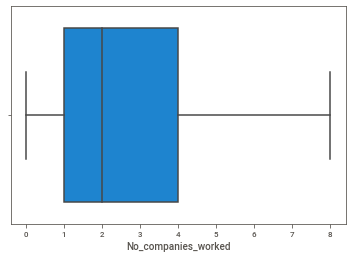

In [83]:
# Checking for outliers again using boxplot

sns.boxplot(df.No_companies_worked)
#Insight: Outlier has been removed for the "No_companies_worked" feature

### Checking Outlier for the feature "Last_sal_hike"

<AxesSubplot:xlabel='Last_sal_hike', ylabel='Density'>

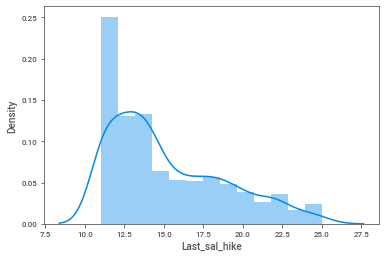

In [84]:
sns.distplot(df.Last_sal_hike)

<AxesSubplot:xlabel='Last_sal_hike'>

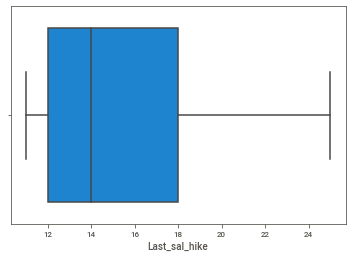

In [85]:
sns.boxplot(df.Last_sal_hike)

# No oultier present in this feature

### Checking Outlier for the feature "Relationship_satisfaction"

<AxesSubplot:xlabel='Relationship_satisfaction', ylabel='Density'>

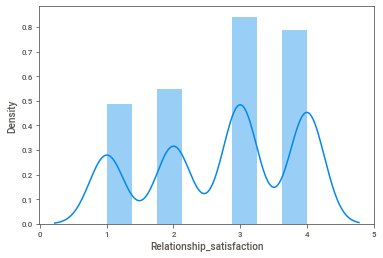

In [86]:
sns.distplot(df.Relationship_satisfaction)

<AxesSubplot:xlabel='Relationship_satisfaction'>

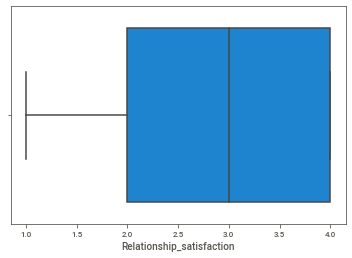

In [87]:
sns.boxplot(df.Relationship_satisfaction)

# No outlier present for this feature

### Checking Outlier for the feature "Total_work_exp"

<AxesSubplot:xlabel='Total_work_exp', ylabel='Density'>

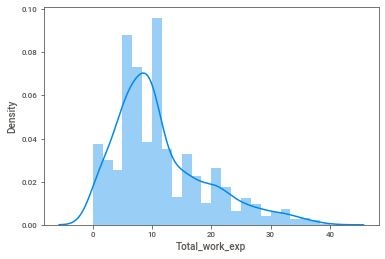

In [88]:
sns.distplot(df.Total_work_exp)

<AxesSubplot:xlabel='Total_work_exp'>

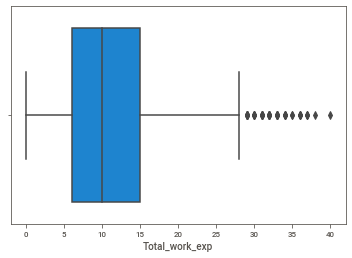

In [89]:
sns.boxplot(df.Total_work_exp)

In [90]:
# Needs outlier treatment for the feature "Total_work_exp"

### Removing Outlier For "Total_work_exp" Feature Using IQR

In [91]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['Total_work_exp'], interpolation = 'midpoint') 

IQR

9.0

In [92]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['Total_work_exp'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['Total_work_exp'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [93]:
min_limit

-7.5

In [94]:
#filtering the data
df.loc[df['Total_work_exp']<min_limit]

Empty DataFrame
Columns: [Emp_no, Age, Gender, EducationBackground, Marital_Status, Emp_Dept, Job_role, Travel_freq, Dist_from_home, Education_level, Envt_satisfaction, Hourly_rate, Job_involvement, Job_level, Job_satisfaction, No_companies_worked, OverTime, Last_sal_hike, Relationship_satisfaction, Total_work_exp, Training_last_yr, Work_life_bal, Exp_at_company, Exp_current_role, Years_last_promotion, Years_curr_mgr, Attrition, Performance_rating]
Index: []

[0 rows x 28 columns]

In [95]:
max_limit

28.5

In [96]:
df.loc[df['Total_work_exp']>max_limit]

Emp_no  Age  Gender EducationBackground Marital_Status  \
17    E1001040   56    Male             Medical        Married   
25    E1001054   52    Male           Marketing        Married   
48    E1001093   50    Male             Medical        Married   
72    E1001129   51  Female           Marketing        Married   
77    E1001140   53  Female           Marketing        Married   
96    E1001179   53  Female       Life Sciences         Single   
100   E1001183   50    Male       Life Sciences       Divorced   
149   E1001275   50    Male             Medical       Divorced   
173   E1001310   59  Female       Life Sciences         Single   
178   E1001316   52  Female           Marketing        Married   
192   E1001339   50    Male             Medical        Married   
199   E1001352   55    Male             Medical         Single   
277   E1001493   50  Female             Medical        Married   
292   E1001523   54  Female       Life Sciences       Divorced   
295   E1001528   54    Male       Life Sciences        Married   
308   E1001556   55    Male             Medical       Divorced   
312   E1001560   51    Male       Life Sciences       Divorced   
342   E1001616   56    Male       Life Sciences         Single   
347   E1001630   51    Male       Life Sciences       Divorced   
351   E1001638   58  Female             Medical        Married   
356   E1001645   51  Female    Technical Degree         Single   
361   E1001651   56    Male       Life Sciences        Married   
387   E1001700   54  Female             Medical         Single   
388   E1001701   58  Female             Medical        Married   
424   E1001762   49    Male       Life Sciences       Divorced   
450   E1001817   50    Male             Medical         Single   
471   E1001850   53  Female    Technical Degree        Married   
475   E1001856   55    Male           Marketing        Married   
490   E1001884   50    Male             Medical        Married   
525   E1001939   49  Female       Life Sciences        Married   
528   E1001943   54  Female             Medical        Married   
589   E1002048   55    Male             Medical        Married   
615   E1002102   58    Male             Medical       Divorced   
642   E1002145   48    Male       Life Sciences        Married   
678   E1002216   58  Female       Life Sciences        Married   
703   E1002251   55    Male     Human Resources        Married   
777    E100301   53  Female       Life Sciences        Married   
816    E100358   50  Female             Medical       Divorced   
845    E100409   58    Male             Medical         Single   
867    E100443   58  Female             Medical        Married   
921    E100537   52    Male       Life Sciences        Married   
958    E100601   50  Female             Medical       Divorced   
962    E100607   52    Male       Life Sciences         Single   
989    E100652   55    Male             Medical         Single   
1077   E100783   55  Female       Life Sciences         Single   
1101   E100824   52  Female       Life Sciences        Married   
1104   E100827   60  Female       Life Sciences        Married   
1116   E100846   57    Male           Marketing       Divorced   
1135   E100875   55  Female       Life Sciences         Single   
1156   E100916   49    Male       Life Sciences       Divorced   
1160   E100922   50    Male             Medical        Married   

                    Emp_Dept                   Job_role        Travel_freq  \
17               Development                  Developer      Travel_Rarely   
25                     Sales                    Manager      Travel_Rarely   
48               Development                  Developer      Travel_Rarely   
72                     Sales                    Manager      Travel_Rarely   
77                     Sales            Sales Executive      Travel_Rarely   
96               Development                  Developer      Travel_Rarely   
100              Development 

In [97]:
## imputing the outliers as the count is high
df.loc[df['Total_work_exp'] > max_limit,'Total_work_exp']=np.mean(df['Total_work_exp'])

<AxesSubplot:xlabel='Total_work_exp'>

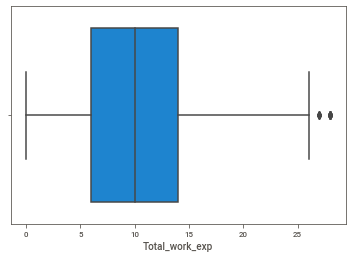

In [98]:
# Checking for outliers again using boxplot

sns.boxplot(df.Total_work_exp)
#Insight: Outliers are still present for the "Total_work_exp" feature

In [99]:
## Applying IQR again for 'Total_work_exp' feature

In [100]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['Total_work_exp'], interpolation = 'midpoint') 

IQR

8.0

In [101]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['Total_work_exp'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['Total_work_exp'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [102]:
min_limit

-6.0

In [103]:
#filtering the data
df.loc[df['Total_work_exp']<min_limit]

Empty DataFrame
Columns: [Emp_no, Age, Gender, EducationBackground, Marital_Status, Emp_Dept, Job_role, Travel_freq, Dist_from_home, Education_level, Envt_satisfaction, Hourly_rate, Job_involvement, Job_level, Job_satisfaction, No_companies_worked, OverTime, Last_sal_hike, Relationship_satisfaction, Total_work_exp, Training_last_yr, Work_life_bal, Exp_at_company, Exp_current_role, Years_last_promotion, Years_curr_mgr, Attrition, Performance_rating]
Index: []

[0 rows x 28 columns]

In [104]:
max_limit

26.0

In [105]:
df.loc[df['Total_work_exp']>max_limit]

Emp_no  Age  Gender EducationBackground Marital_Status  \
11    E1001024   47  Female             Medical       Divorced   
94    E1001175   53    Male           Marketing        Married   
166   E1001302   48    Male       Life Sciences         Single   
221   E1001394   48    Male             Medical         Single   
264   E1001469   56  Female    Technical Degree       Divorced   
272   E1001482   46  Female           Marketing        Married   
483   E1001869   50    Male           Marketing        Married   
505   E1001903   47  Female       Life Sciences        Married   
520   E1001933   49  Female               Other        Married   
593   E1002053   53  Female             Medical        Married   
617   E1002105   47  Female       Life Sciences       Divorced   
681   E1002219   49    Male       Life Sciences        Married   
817    E100359   59  Female       Life Sciences         Single   
851    E100419   50  Female       Life Sciences        Married   
983    E100641   46  Female    Technical Degree        Married   
997    E100663   50    Male       Life Sciences       Divorced   
1099   E100821   52    Male             Medical        Married   
1117   E100847   50    Male       Life Sciences        Married   
1151   E100902   46  Female             Medical        Married   

                    Emp_Dept                Job_role        Travel_freq  \
11                     Sales         Sales Executive  Travel_Frequently   
94                     Sales         Sales Executive      Travel_Rarely   
166   Research & Development      Senior Manager R&D      Travel_Rarely   
221   Research & Development             Manager R&D         Non-Travel   
264   Research & Development                 Manager      Travel_Rarely   
272                    Sales                 Manager      Travel_Rarely   
483                    Sales                 Manager      Travel_Rarely   
505          Human Resources                 Manager      Travel_Rarely   
520                  Finance         Finance Manager      Travel_Rarely   
593   Research & Development  Manufacturing Director         Non-Travel   
617   Research & Development             Manager R&D      Travel_Rarely   
681   Research & Development             Manager R&D  Travel_Frequently   
817                    Sales         Sales Executive      Travel_Rarely   
851              Development        Business Analyst  Travel_Frequently   
983                    Sales                 Manager      Travel_Rarely   
997              Development               Developer      Travel_Rarely   
1099             Development               Developer      Travel_Rarely   
1117             Development        Senior Developer      Travel_Rarely   
1151             Development        Senior Developer  Travel_Frequently   

      Dist_from_home  Education_level  ...  Relationship_satisfaction  \
11                 3                3  ...                          4   
94                 8                3  ...                          3   
166                4                4  ...                          2   
221                1                4  ...                          3   
264                4                4  ...                          4   
272                2                3  ...                          1   
483                9                3  ...                          3   
505               26                4  ...                          3   
520               22                4  ...                          2   
593                1                4  ...                          4   
617                4                3  ...                          3   
681                2                1  ...                          4   
817               25                3  ...                          4   
851                1                3  ...                          1   
983                2                3  ...                          2   
997               

In [106]:
## imputing the outliers 
df.loc[df['Total_work_exp'] > max_limit,'Total_work_exp']=np.mean(df['Total_work_exp'])

<AxesSubplot:xlabel='Total_work_exp'>

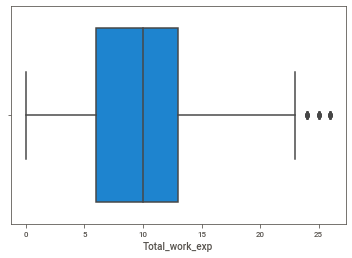

In [107]:
# Checking for outliers again using boxplot

sns.boxplot(df.Total_work_exp)

In [108]:
# Applying IQR again on "Total_work_exp" feature

In [109]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['Total_work_exp'], interpolation = 'midpoint') 

IQR

7.0

In [110]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['Total_work_exp'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['Total_work_exp'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [111]:
min_limit

-4.5

In [112]:
#filtering the data
df.loc[df['Total_work_exp']<min_limit]

Empty DataFrame
Columns: [Emp_no, Age, Gender, EducationBackground, Marital_Status, Emp_Dept, Job_role, Travel_freq, Dist_from_home, Education_level, Envt_satisfaction, Hourly_rate, Job_involvement, Job_level, Job_satisfaction, No_companies_worked, OverTime, Last_sal_hike, Relationship_satisfaction, Total_work_exp, Training_last_yr, Work_life_bal, Exp_at_company, Exp_current_role, Years_last_promotion, Years_curr_mgr, Attrition, Performance_rating]
Index: []

[0 rows x 28 columns]

In [113]:
max_limit

23.5

In [114]:
df.loc[df['Total_work_exp']>max_limit]

Emp_no  Age  Gender EducationBackground Marital_Status  \
52    E1001098   47  Female               Other        Married   
117   E1001218   58  Female    Technical Degree       Divorced   
136   E1001254   52    Male       Life Sciences        Married   
183   E1001323   45  Female       Life Sciences        Married   
211   E1001376   44    Male             Medical        Married   
270   E1001479   53  Female             Medical       Divorced   
278   E1001495   46    Male       Life Sciences        Married   
297   E1001533   43    Male       Life Sciences        Married   
302   E1001541   48    Male       Life Sciences         Single   
304   E1001545   44    Male           Marketing        Married   
307   E1001555   45  Female           Marketing         Single   
310   E1001558   46  Female           Marketing        Married   
313   E1001561   59    Male             Medical         Single   
316   E1001566   44    Male       Life Sciences       Divorced   
336   E1001595   50  Female       Life Sciences        Married   
360   E1001650   55    Male           Marketing         Single   
376   E1001679   52  Female             Medical        Married   
408   E1001738   45    Male             Medical       Divorced   
443   E1001798   54  Female             Medical       Divorced   
456   E1001825   42    Male       Life Sciences        Married   
555   E1001990   45    Male       Life Sciences        Married   
600   E1002067   46    Male             Medical       Divorced   
639   E1002141   46  Female    Technical Degree       Divorced   
658   E1002178   48  Female             Medical       Divorced   
716   E1002271   47    Male             Medical         Single   
782    E100310   53  Female               Other       Divorced   
785    E100314   44  Female             Medical        Married   
820    E100364   45    Male       Life Sciences       Divorced   
832    E100384   55    Male       Life Sciences        Married   
862    E100436   43    Male       Life Sciences        Married   
911    E100522   46  Female           Marketing       Divorced   
1024   E100703   45    Male       Life Sciences       Divorced   
1029   E100709   49  Female    Technical Degree         Single   
1073   E100777   49    Male               Other         Single   
1086   E100798   43    Male       Life Sciences       Divorced   
1088   E100800   54    Male             Medical        Married   
1119   E100853   46    Male       Life Sciences        Married   
1177   E100949   44    Male               Other        Married   

                    Emp_Dept                   Job_role        Travel_freq  \
52               Development                  Developer      Travel_Rarely   
117              Development           Senior Developer      Travel_Rarely   
136              Development           Senior Developer      Travel_Rarely   
183                    Sales                    Manager      Travel_Rarely   
211          Human Resources            Human Resources      Travel_Rarely   
270   Research & Development                Manager R&D      Travel_Rarely   
278   Research & Development                Manager R&D      Travel_Rarely   
297   Research & Development          Research Director      Travel_Rarely   
302   Research & Development          Research Director      Travel_Rarely   
304                    Sales                    Manager      Travel_Rarely   
307                    Sales                    Manager      Travel_Rarely   
310                    Sales                    Manager      Travel_Rarely   
313   Research & Development                Manager R&D      Travel_Rarely   
316   Research & Development                Manager R&D      Travel_Rarely   
336   Research & Development                Manager R&D      Travel_Rarely   
360                    Sales            Sales Executive      Travel_Rarely   
376   Research & Development     Manufacturing Director  Travel_Frequently   
408   Research & Development 

In [115]:
## imputing the outliers 
df.loc[df['Total_work_exp'] > max_limit,'Total_work_exp']=np.mean(df['Total_work_exp'])

In [116]:
df.loc[df['Total_work_exp'] > max_limit]

Empty DataFrame
Columns: [Emp_no, Age, Gender, EducationBackground, Marital_Status, Emp_Dept, Job_role, Travel_freq, Dist_from_home, Education_level, Envt_satisfaction, Hourly_rate, Job_involvement, Job_level, Job_satisfaction, No_companies_worked, OverTime, Last_sal_hike, Relationship_satisfaction, Total_work_exp, Training_last_yr, Work_life_bal, Exp_at_company, Exp_current_role, Years_last_promotion, Years_curr_mgr, Attrition, Performance_rating]
Index: []

[0 rows x 28 columns]

<AxesSubplot:xlabel='Total_work_exp'>

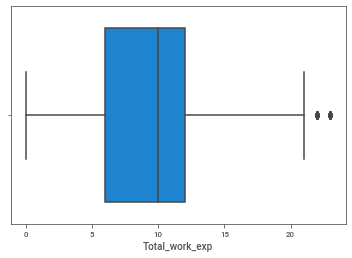

In [117]:
# Checking for outliers again using boxplot
sns.boxplot(df.Total_work_exp)

In [118]:
# Applying IQR again on "Total_work_exp" feature

In [119]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['Total_work_exp'], interpolation = 'midpoint') 

IQR

6.0

In [120]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['Total_work_exp'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['Total_work_exp'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [121]:
min_limit

-3.0

In [122]:
#filtering the data
df.loc[df['Total_work_exp']<min_limit]

Empty DataFrame
Columns: [Emp_no, Age, Gender, EducationBackground, Marital_Status, Emp_Dept, Job_role, Travel_freq, Dist_from_home, Education_level, Envt_satisfaction, Hourly_rate, Job_involvement, Job_level, Job_satisfaction, No_companies_worked, OverTime, Last_sal_hike, Relationship_satisfaction, Total_work_exp, Training_last_yr, Work_life_bal, Exp_at_company, Exp_current_role, Years_last_promotion, Years_curr_mgr, Attrition, Performance_rating]
Index: []

[0 rows x 28 columns]

In [123]:
max_limit

21.0

In [124]:
df.loc[df['Total_work_exp']>max_limit]

Emp_no  Age  Gender EducationBackground Marital_Status  \
3     E1001009   41    Male     Human Resources       Divorced   
66    E1001121   43    Male       Life Sciences        Married   
137   E1001259   53    Male             Medical       Divorced   
141   E1001264   40  Female       Life Sciences         Single   
155   E1001283   50    Male       Life Sciences        Married   
160   E1001291   54  Female    Technical Degree        Married   
179   E1001317   44  Female             Medical        Married   
210   E1001374   55    Male       Life Sciences        Married   
216   E1001387   42    Male             Medical        Married   
227   E1001402   46    Male           Marketing        Married   
236   E1001416   49    Male    Technical Degree        Married   
252   E1001445   42    Male       Life Sciences         Single   
298   E1001534   49    Male             Medical        Married   
320   E1001571   43  Female           Marketing         Single   
329   E1001584   45  Female             Medical         Single   
341   E1001614   55  Female             Medical        Married   
445   E1001805   46  Female       Life Sciences        Married   
492   E1001886   44  Female             Medical       Divorced   
613   E1002093   41  Female           Marketing       Divorced   
623   E1002115   58    Male       Life Sciences        Married   
655   E1002170   40    Male       Life Sciences       Divorced   
786    E100316   46  Female           Marketing         Single   
804    E100342   48    Male       Life Sciences         Single   
838    E100397   40    Male       Life Sciences        Married   
856    E100426   54  Female     Human Resources         Single   
864    E100440   51    Male       Life Sciences         Single   
925    E100542   45    Male             Medical        Married   
946    E100580   45  Female             Medical         Single   
956    E100597   42    Male    Technical Degree        Married   
960    E100605   43  Female           Marketing        Married   
978    E100630   40    Male             Medical       Divorced   
1006   E100674   49  Female       Life Sciences         Single   
1010   E100682   42  Female           Marketing        Married   
1015   E100688   41    Male       Life Sciences         Single   
1152   E100903   41  Female       Life Sciences        Married   

                    Emp_Dept            Job_role        Travel_freq  \
3            Human Resources             Manager      Travel_Rarely   
66               Development           Developer      Travel_Rarely   
137                    Sales             Manager      Travel_Rarely   
141                    Sales     Sales Executive         Non-Travel   
155              Development           Developer      Travel_Rarely   
160   Research & Development  Senior Manager R&D      Travel_Rarely   
179                    Sales     Sales Executive      Travel_Rarely   
210   Research & Development         Manager R&D  Travel_Frequently   
216   Research & Development             Manager      Travel_Rarely   
227                    Sales             Manager      Travel_Rarely   
236                    Sales     Sales Executive      Travel_Rarely   
252                    Sales     Sales Executive  Travel_Frequently   
298   Research & Development         Manager R&D      Travel_Rarely   
320                    Sales     Sales Executive      Travel_Rarely   
329   Research & Development             Manager  Travel_Frequently   
341   Research & Development             Manager      Travel_Rarely   
445                    Sales             Manager      Travel_Rarely   
492                  Finance     Finance Manager      Travel_Rarely   
613                    Sales     Sales Executive      Travel_Rarely   
623   Research & Development         Manager R&D  Travel_Frequently   
655   Research & Development         Manager R&D      Travel_Rarely   
786                    Sales             Manager      Travel_Rarely  

In [125]:
## imputing the outliers 
df.loc[df['Total_work_exp'] > max_limit,'Total_work_exp']=np.mean(df['Total_work_exp'])

<AxesSubplot:xlabel='Total_work_exp'>

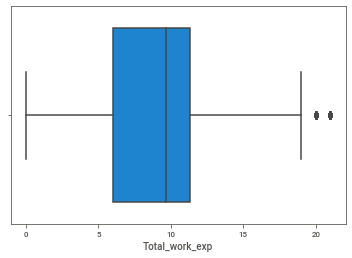

In [126]:
# Checking for outliers again using boxplot
sns.boxplot(df.Total_work_exp)

### Checking Outlier for the feature "Training_last_yr"

<AxesSubplot:xlabel='Training_last_yr', ylabel='Density'>

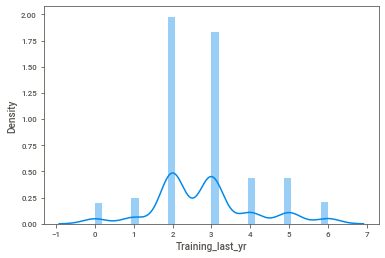

In [127]:
sns.distplot(df.Training_last_yr)

<AxesSubplot:xlabel='Training_last_yr'>

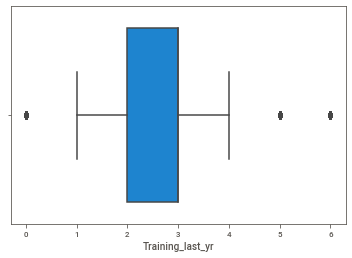

In [128]:
sns.boxplot(df.Training_last_yr)

In [129]:
## Needs outlier treatment

In [130]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['Training_last_yr'], interpolation = 'midpoint') 

IQR

1.0

In [131]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['Training_last_yr'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['Training_last_yr'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [132]:
min_limit

0.5

In [133]:
#filtering the data
df.loc[df['Training_last_yr']<min_limit]

Emp_no  Age  Gender EducationBackground Marital_Status  \
55    E1001104   35  Female       Life Sciences         Single   
96    E1001179   53  Female       Life Sciences         Single   
104   E1001191   44    Male       Life Sciences        Married   
144   E1001269   31    Male             Medical         Single   
153   E1001281   47  Female       Life Sciences         Single   
156   E1001284   38    Male             Medical        Married   
165   E1001300   48    Male       Life Sciences         Single   
215   E1001385   26    Male             Medical       Divorced   
232   E1001411   36    Male       Life Sciences         Single   
242   E1001434   18    Male             Medical         Single   
247   E1001440   27    Male       Life Sciences        Married   
333   E1001590   36  Female    Technical Degree        Married   
343   E1001618   40    Male       Life Sciences       Divorced   
344   E1001622   34    Male       Life Sciences       Divorced   
351   E1001638   58  Female             Medical        Married   
358   E1001647   35  Female             Medical        Married   
361   E1001651   56    Male       Life Sciences        Married   
363   E1001653   40  Female             Medical       Divorced   
368   E1001665   28    Male       Life Sciences        Married   
411   E1001745   34  Female    Technical Degree        Married   
414   E1001751   49    Male    Technical Degree        Married   
482   E1001868   29    Male       Life Sciences       Divorced   
487   E1001877   43    Male    Technical Degree       Divorced   
516   E1001925   27  Female             Medical        Married   
517   E1001926   27    Male             Medical         Single   
575   E1002025   30  Female     Human Resources       Divorced   
615   E1002102   58    Male             Medical       Divorced   
667   E1002194   31  Female             Medical       Divorced   
680   E1002218   38    Male       Life Sciences       Divorced   
703   E1002251   55    Male     Human Resources        Married   
762   E1002342   27    Male       Life Sciences        Married   
765    E100279   41  Female       Life Sciences         Single   
798    E100334   27    Male       Life Sciences         Single   
822    E100368   36    Male             Medical        Married   
842    E100403   32    Male             Medical         Single   
876    E100456   36    Male             Medical       Divorced   
932    E100553   49    Male       Life Sciences       Divorced   
979    E100631   51    Male       Life Sciences        Married   
981    E100639   38    Male       Life Sciences        Married   
1002   E100670   44    Male       Life Sciences       Divorced   
1008   E100679   26    Male           Marketing         Single   
1034   E100717   32  Female             Medical         Single   
1040   E100727   27    Male           Marketing        Married   
1068   E100772   21  Female       Life Sciences         Single   

                    Emp_Dept                   Job_role        Travel_freq  \
55               Development           Senior Developer      Travel_Rarely   
96               Development                  Developer      Travel_Rarely   
104              Development                  Developer      Travel_Rarely   
144              Development                  Developer         Non-Travel   
153                    Sales            Sales Executive      Travel_Rarely   
156   Research & Development         Senior Manager R&D  Travel_Frequently   
165   Research & Development  Healthcare Representative      Travel_Rarely   
215   Research & Development                Manager R&D      Travel_Rarely   
232   Research & Development     Manufacturing Director         Non-Travel   
242   Research & Development      Laboratory Technician         Non-Travel   
247   Research & Development         Research Scientist      Travel_Rarely   
333   Research & Development  Healthcare Representative      Travel_Rarely   
343   Research & Develo

In [134]:
df.loc[df['Training_last_yr'] < min_limit,'Training_last_yr']=np.mean(df['Training_last_yr'])

In [135]:
df.loc[df['Training_last_yr'] < min_limit]

Empty DataFrame
Columns: [Emp_no, Age, Gender, EducationBackground, Marital_Status, Emp_Dept, Job_role, Travel_freq, Dist_from_home, Education_level, Envt_satisfaction, Hourly_rate, Job_involvement, Job_level, Job_satisfaction, No_companies_worked, OverTime, Last_sal_hike, Relationship_satisfaction, Total_work_exp, Training_last_yr, Work_life_bal, Exp_at_company, Exp_current_role, Years_last_promotion, Years_curr_mgr, Attrition, Performance_rating]
Index: []

[0 rows x 28 columns]

In [136]:
max_limit

4.5

In [137]:
df.loc[df['Training_last_yr']>max_limit]

Emp_no  Age  Gender EducationBackground Marital_Status     Emp_Dept  \
10    E1001022   44    Male             Medical         Single  Development   
13    E1001027   29    Male       Life Sciences         Single        Sales   
27    E1001059   25  Female             Medical         Single        Sales   
31    E1001064   34    Male               Other         Single        Sales   
59    E1001110   40    Male             Medical         Single  Development   
...        ...  ...     ...                 ...            ...          ...   
1158   E100919   26    Male           Marketing        Married        Sales   
1166   E100933   27  Female             Medical       Divorced  Development   
1184   E100968   29  Female             Medical        Married        Sales   
1188   E100979   20    Male             Medical         Single  Development   
1193   E100988   29    Male       Life Sciences       Divorced  Development   

                  Job_role        Travel_freq  Dist_from_home  \
10               Developer         Non-Travel              24   
13    Sales Representative      Travel_Rarely              10   
27         Sales Executive      Travel_Rarely              26   
31         Sales Executive      Travel_Rarely               2   
59               Developer  Travel_Frequently              16   
...                    ...                ...             ...   
1158       Sales Executive      Travel_Rarely              28   
1166             Developer      Travel_Rarely               6   
1184       Sales Executive      Travel_Rarely               3   
1188      Senior Developer      Travel_Rarely              10   
1193             Developer  Travel_Frequently               1   

      Education_level  ...  Relationship_satisfaction  Total_work_exp  \
10                  3  ...                          3             9.0   
13                  3  ...                          3             1.0   
27                  1  ...                          2             6.0   
31                  3  ...                          3             6.0   
59                  4  ...                          4            10.0   
...               ...  ...                        ...             ...   
1158                2  ...                          4             6.0   
1166                4  ...                          3             6.0   
1184                2  ...                          1             6.0   
1188                1  ...                          4             1.0   
1193                4  ...                          4            10.0   

      Training_last_yr  Work_life_bal  Exp_at_company  Exp_current_role  \
10                 5.0              3               5                 2   
13                 6.0              3               1                 0   
27                 5.0              2               6                 5   
31                 5.0              3               6                 5   
59                 6.0              3               1                 0   
...                ...            ...             ...               ...   
1158               5.0              4               5                 3   
1166               5.0              2               5                 3   
1184               5.0              2               6                 0   
1188               5.0              3               1                 0   
1193               5.0              3              10                 7   

     Years_last_promotion  Years_curr_mgr  Attrition  Performance_rating  
10                      1               4         No                   3  
13                      0               0         No                   3  
27                      1               4         No                   4  
31                      1               4         No                   4  
59                      0               0         No                   3  
...                   ...             ...        .

In [138]:
# Outlier treatment is not required for this feature as the feature has more than 5% outliers

### Checking Outlier for the feature "Work_life_bal"

<AxesSubplot:xlabel='Work_life_bal', ylabel='Density'>

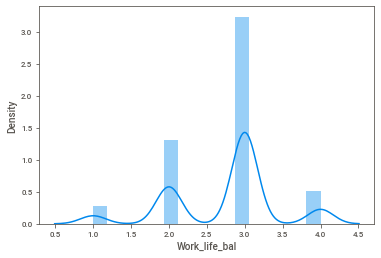

In [139]:
sns.distplot(df.Work_life_bal)

<AxesSubplot:xlabel='Work_life_bal'>

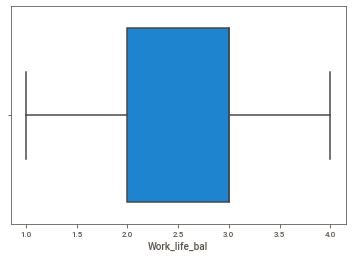

In [140]:
sns.boxplot(df.Work_life_bal)

# No outlier treatment required for the feature

### Checking Outlier for the feature "Exp_at_company"

<AxesSubplot:xlabel='Exp_at_company', ylabel='Density'>

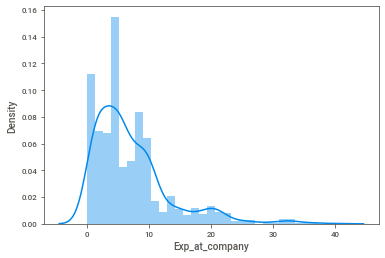

In [141]:
sns.distplot(df.Exp_at_company)

<AxesSubplot:xlabel='Exp_at_company'>

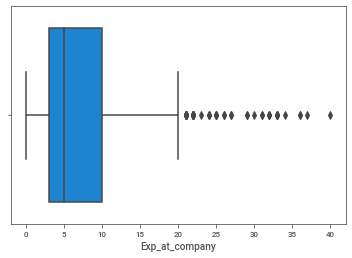

In [142]:
sns.boxplot(df.Exp_at_company)

# As seen, outlier treatment required

### Removing Outlier For "Exp_at_company" Feature Using IQR

In [143]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['Exp_at_company'], interpolation = 'midpoint') 

IQR

7.0

In [144]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['Exp_at_company'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['Exp_at_company'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [145]:
min_limit

-7.5

In [146]:
df.loc[df['Exp_at_company'] < min_limit]

Empty DataFrame
Columns: [Emp_no, Age, Gender, EducationBackground, Marital_Status, Emp_Dept, Job_role, Travel_freq, Dist_from_home, Education_level, Envt_satisfaction, Hourly_rate, Job_involvement, Job_level, Job_satisfaction, No_companies_worked, OverTime, Last_sal_hike, Relationship_satisfaction, Total_work_exp, Training_last_yr, Work_life_bal, Exp_at_company, Exp_current_role, Years_last_promotion, Years_curr_mgr, Attrition, Performance_rating]
Index: []

[0 rows x 28 columns]

In [147]:
max_limit

20.5

In [148]:
df.loc[df['Exp_at_company']>max_limit]

Emp_no  Age  Gender EducationBackground Marital_Status  \
3     E1001009   41    Male     Human Resources       Divorced   
11    E1001024   47  Female             Medical       Divorced   
25    E1001054   52    Male           Marketing        Married   
52    E1001098   47  Female               Other        Married   
100   E1001183   50    Male       Life Sciences       Divorced   
168   E1001304   39  Female       Life Sciences        Married   
175   E1001313   41  Female       Life Sciences       Divorced   
178   E1001316   52  Female           Marketing        Married   
181   E1001321   39  Female             Medical         Single   
216   E1001387   42    Male             Medical        Married   
252   E1001445   42    Male       Life Sciences         Single   
272   E1001482   46  Female           Marketing        Married   
304   E1001545   44    Male           Marketing        Married   
307   E1001555   45  Female           Marketing         Single   
308   E1001556   55    Male             Medical       Divorced   
312   E1001560   51    Male       Life Sciences       Divorced   
316   E1001566   44    Male       Life Sciences       Divorced   
320   E1001571   43  Female           Marketing         Single   
347   E1001630   51    Male       Life Sciences       Divorced   
450   E1001817   50    Male             Medical         Single   
459   E1001828   40    Male             Medical         Single   
471   E1001850   53  Female    Technical Degree        Married   
475   E1001856   55    Male           Marketing        Married   
490   E1001884   50    Male             Medical        Married   
492   E1001886   44  Female             Medical       Divorced   
555   E1001990   45    Male       Life Sciences        Married   
557   E1001997   45  Female    Technical Degree         Single   
571   E1002018   40    Male             Medical         Single   
613   E1002093   41  Female           Marketing       Divorced   
617   E1002105   47  Female       Life Sciences       Divorced   
642   E1002145   48    Male       Life Sciences        Married   
658   E1002178   48  Female             Medical       Divorced   
777    E100301   53  Female       Life Sciences        Married   
785    E100314   44  Female             Medical        Married   
816    E100358   50  Female             Medical       Divorced   
817    E100359   59  Female       Life Sciences         Single   
838    E100397   40    Male       Life Sciences        Married   
845    E100409   58    Male             Medical         Single   
862    E100436   43    Male       Life Sciences        Married   
867    E100443   58  Female             Medical        Married   
911    E100522   46  Female           Marketing       Divorced   
921    E100537   52    Male       Life Sciences        Married   
956    E100597   42    Male    Technical Degree        Married   
962    E100607   52    Male       Life Sciences         Single   
978    E100630   40    Male             Medical       Divorced   
989    E100652   55    Male             Medical         Single   
1015   E100688   41    Male       Life Sciences         Single   
1024   E100703   45    Male       Life Sciences       Divorced   
1027   E100707   39    Male             Medical        Married   
1036   E100722   39    Male             Medical        Married   
1086   E100798   43    Male       Life Sciences       Divorced   
1094   E100809   39    Male       Life Sciences       Divorced   
1104   E100827   60  Female       Life Sciences        Married   
1117   E100847   50    Male       Life Sciences        Married   
1156   E100916   49    Male       Life Sciences       Divorced   
1160   E100922   50    Male             Medical        Married   

                    Emp_Dept                   Job_role        Travel_freq  \
3            Human Resources                    Manager      Travel_Rarely   
11                     Sales            Sales Executive  Travel_Frequently   
25         

In [149]:
## imputing the outliers 
df.loc[df['Exp_at_company'] > max_limit,'Exp_at_company']=np.mean(df['Exp_at_company'])

<AxesSubplot:xlabel='Exp_at_company'>

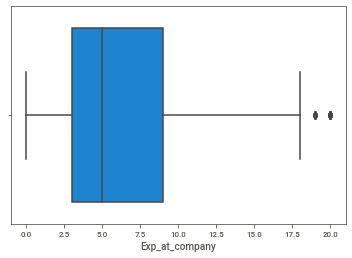

In [150]:
# Checking the outlier again using box plot

sns.boxplot(df.Exp_at_company)

In [151]:
# Applying IQR again on "Exp_at_company" feature

In [152]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['Exp_at_company'], interpolation = 'midpoint') 

IQR

6.0

In [153]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['Exp_at_company'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['Exp_at_company'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [154]:
min_limit

-6.0

In [155]:
df.loc[df['Exp_at_company'] < min_limit]

Empty DataFrame
Columns: [Emp_no, Age, Gender, EducationBackground, Marital_Status, Emp_Dept, Job_role, Travel_freq, Dist_from_home, Education_level, Envt_satisfaction, Hourly_rate, Job_involvement, Job_level, Job_satisfaction, No_companies_worked, OverTime, Last_sal_hike, Relationship_satisfaction, Total_work_exp, Training_last_yr, Work_life_bal, Exp_at_company, Exp_current_role, Years_last_promotion, Years_curr_mgr, Attrition, Performance_rating]
Index: []

[0 rows x 28 columns]

In [156]:
max_limit

18.0

In [157]:
df.loc[df['Exp_at_company']>max_limit]

Emp_no  Age  Gender EducationBackground Marital_Status  \
72    E1001129   51  Female           Marketing        Married   
142   E1001265   47    Male             Medical       Divorced   
207   E1001366   38  Female       Life Sciences        Married   
211   E1001376   44    Male             Medical        Married   
230   E1001406   40    Male             Medical         Single   
283   E1001503   44    Male               Other         Single   
330   E1001585   39  Female             Medical       Divorced   
340   E1001607   41    Male             Medical         Single   
341   E1001614   55  Female             Medical        Married   
360   E1001650   55    Male           Marketing         Single   
361   E1001651   56    Male       Life Sciences        Married   
377   E1001680   43  Female             Medical         Single   
381   E1001686   42  Female     Human Resources        Married   
387   E1001700   54  Female             Medical         Single   
456   E1001825   42    Male       Life Sciences        Married   
639   E1002141   46  Female    Technical Degree       Divorced   
655   E1002170   40    Male       Life Sciences       Divorced   
677   E1002215   38  Female             Medical       Divorced   
705   E1002253   39    Male           Marketing         Single   
706   E1002254   42    Male       Life Sciences         Single   
742   E1002312   41  Female       Life Sciences        Married   
758   E1002334   39  Female           Marketing        Married   
864    E100440   51    Male       Life Sciences         Single   
918    E100531   40  Female             Medical        Married   
925    E100542   45    Male             Medical        Married   
946    E100580   45  Female             Medical         Single   
973    E100621   39  Female    Technical Degree         Single   
988    E100650   45    Male             Medical        Married   
999    E100665   42    Male       Life Sciences        Married   
1010   E100682   42  Female           Marketing        Married   
1109   E100836   40  Female       Life Sciences        Married   
1197   E100994   50    Male             Medical        Married   

                    Emp_Dept                   Job_role        Travel_freq  \
72                     Sales                    Manager      Travel_Rarely   
142              Development           Senior Developer  Travel_Frequently   
207   Research & Development  Healthcare Representative      Travel_Rarely   
211          Human Resources            Human Resources      Travel_Rarely   
230   Research & Development                Manager R&D      Travel_Rarely   
283   Research & Development         Research Scientist      Travel_Rarely   
330   Research & Development                    Manager      Travel_Rarely   
340                    Sales            Sales Executive         Non-Travel   
341   Research & Development                    Manager      Travel_Rarely   
360                    Sales            Sales Executive      Travel_Rarely   
361   Research & Development                Manager R&D      Travel_Rarely   
377   Research & Development         Research Scientist      Travel_Rarely   
381          Human Resources                    Manager      Travel_Rarely   
387   Research & Development          Research Director      Travel_Rarely   
456   Research & Development  Healthcare Representative  Travel_Frequently   
639                    Sales            Sales Executive      Travel_Rarely   
655   Research & Development                Manager R&D      Travel_Rarely   
677   Research & Development                Manager R&D  Travel_Frequently   
705                    Sales            Sales Executive      Travel_Rarely   
706   Research & Development         Research Scientist         Non-Travel   
742   Research & Development     Manufacturing Director      Travel_Rarely   
758                    Sales            Sales Executive      Travel_Rarely   
864              Development       

In [158]:
## imputing the outliers 
df.loc[df['Exp_at_company'] > max_limit,'Exp_at_company']=np.mean(df['Exp_at_company'])

<AxesSubplot:xlabel='Exp_at_company'>

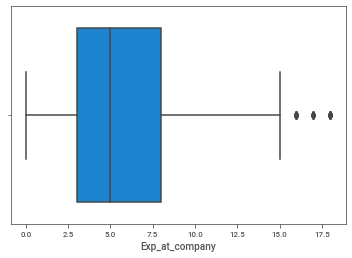

In [159]:
# Checking the outlier again using box plot

sns.boxplot(df.Exp_at_company)

In [160]:
# Applying IQR again on "Exp_at_company" feature

In [161]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['Exp_at_company'], interpolation = 'midpoint') 

IQR

5.0

In [162]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['Exp_at_company'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['Exp_at_company'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [163]:
min_limit

-4.5

In [164]:
df.loc[df['Exp_at_company'] < min_limit]

Empty DataFrame
Columns: [Emp_no, Age, Gender, EducationBackground, Marital_Status, Emp_Dept, Job_role, Travel_freq, Dist_from_home, Education_level, Envt_satisfaction, Hourly_rate, Job_involvement, Job_level, Job_satisfaction, No_companies_worked, OverTime, Last_sal_hike, Relationship_satisfaction, Total_work_exp, Training_last_yr, Work_life_bal, Exp_at_company, Exp_current_role, Years_last_promotion, Years_curr_mgr, Attrition, Performance_rating]
Index: []

[0 rows x 28 columns]

In [165]:
max_limit

15.5

In [166]:
df.loc[df['Exp_at_company']>max_limit]

Emp_no  Age  Gender EducationBackground Marital_Status  \
2     E1001007   40    Male       Life Sciences        Married   
76    E1001135   36    Male       Life Sciences        Married   
108   E1001202   36    Male       Life Sciences        Married   
126   E1001235   41    Male             Medical         Single   
131   E1001245   36    Male       Life Sciences        Married   
137   E1001259   53    Male             Medical       Divorced   
151   E1001277   41    Male             Medical       Divorced   
161   E1001292   35  Female             Medical       Divorced   
180   E1001318   50  Female       Life Sciences        Married   
203   E1001358   46  Female       Life Sciences       Divorced   
229   E1001405   39    Male       Life Sciences       Divorced   
251   E1001444   40  Female             Medical         Single   
321   E1001572   36  Female       Life Sciences         Single   
501   E1001899   35    Male       Life Sciences        Married   
615   E1002102   58    Male             Medical       Divorced   
716   E1002271   47    Male             Medical         Single   
730   E1002293   38  Female             Medical        Married   
731   E1002295   37  Female       Life Sciences        Married   
818    E100361   36  Female    Technical Degree       Divorced   
849    E100416   34  Female               Other         Single   
888    E100484   45    Male       Life Sciences       Divorced   
960    E100605   43  Female           Marketing        Married   
1001   E100669   37  Female       Life Sciences         Single   
1018   E100695   39    Male             Medical       Divorced   
1051   E100742   35    Male    Technical Degree         Single   
1083   E100793   37  Female       Life Sciences       Divorced   
1152   E100903   41  Female       Life Sciences        Married   
1185   E100969   35    Male       Life Sciences         Single   

                    Emp_Dept                   Job_role        Travel_freq  \
2                      Sales            Sales Executive  Travel_Frequently   
76                     Sales            Sales Executive      Travel_Rarely   
108             Data Science             Data Scientist      Travel_Rarely   
126              Development                  Developer      Travel_Rarely   
131                    Sales            Sales Executive      Travel_Rarely   
137                    Sales                    Manager      Travel_Rarely   
151              Development                  Developer  Travel_Frequently   
161   Research & Development  Healthcare Representative      Travel_Rarely   
180                    Sales            Sales Executive         Non-Travel   
203   Research & Development         Senior Manager R&D      Travel_Rarely   
229   Research & Development  Healthcare Representative  Travel_Frequently   
251   Research & Development          Research Director  Travel_Frequently   
321   Research & Development     Manufacturing Director      Travel_Rarely   
501                  Finance            Finance Manager      Travel_Rarely   
615                    Sales                    Manager         Non-Travel   
716   Research & Development                Manager R&D      Travel_Rarely   
730   Research & Development          Research Director      Travel_Rarely   
731   Research & Development          Research Director      Travel_Rarely   
818              Development           Business Analyst      Travel_Rarely   
849              Development                  Developer      Travel_Rarely   
888              Development                  Developer      Travel_Rarely   
960                    Sales                    Manager      Travel_Rarely   
1001             Development             Technical Lead      Travel_Rarely   
1018             Development             Technical Lead      Travel_Rarely   
1051             Development           Delivery Manager      Travel_Rarely   
1083             Development           Delivery Manager      Trav

In [167]:
## imputing the outliers 
df.loc[df['Exp_at_company'] > max_limit,'Exp_at_company']=np.mean(df['Exp_at_company'])

<AxesSubplot:xlabel='Exp_at_company'>

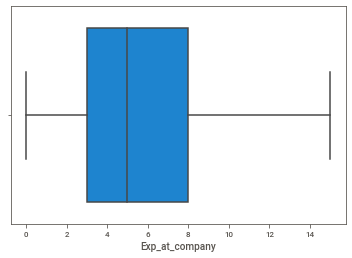

In [168]:
# Checking the outlier again using box plot
sns.boxplot(df.Exp_at_company)

# Outlier has been removed for the feature

In [169]:
df.columns

Index(['Emp_no', 'Age', 'Gender', 'EducationBackground', 'Marital_Status',
       'Emp_Dept', 'Job_role', 'Travel_freq', 'Dist_from_home',
       'Education_level', 'Envt_satisfaction', 'Hourly_rate',
       'Job_involvement', 'Job_level', 'Job_satisfaction',
       'No_companies_worked', 'OverTime', 'Last_sal_hike',
       'Relationship_satisfaction', 'Total_work_exp', 'Training_last_yr',
       'Work_life_bal', 'Exp_at_company', 'Exp_current_role',
       'Years_last_promotion', 'Years_curr_mgr', 'Attrition',
       'Performance_rating'],
      dtype='object')

### Checking Outlier for the feature "Exp_current_role"

<AxesSubplot:xlabel='Exp_current_role', ylabel='Density'>

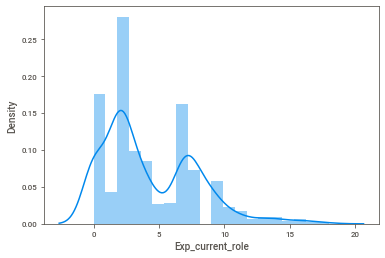

In [170]:
sns.distplot(df.Exp_current_role)

<AxesSubplot:xlabel='Exp_current_role'>

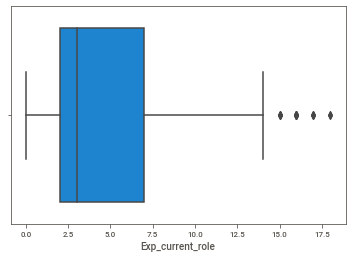

In [171]:
sns.boxplot(df.Exp_current_role)

# As seen, needs outlier treatment

### Removing Outlier For "Exp_current_role" Feature Using IQR

In [172]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['Exp_current_role'], interpolation = 'midpoint') 

IQR

5.0

In [173]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['Exp_current_role'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['Exp_current_role'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [174]:
min_limit

-5.5

In [175]:
df.loc[df['Exp_current_role'] < min_limit]

Empty DataFrame
Columns: [Emp_no, Age, Gender, EducationBackground, Marital_Status, Emp_Dept, Job_role, Travel_freq, Dist_from_home, Education_level, Envt_satisfaction, Hourly_rate, Job_involvement, Job_level, Job_satisfaction, No_companies_worked, OverTime, Last_sal_hike, Relationship_satisfaction, Total_work_exp, Training_last_yr, Work_life_bal, Exp_at_company, Exp_current_role, Years_last_promotion, Years_curr_mgr, Attrition, Performance_rating]
Index: []

[0 rows x 28 columns]

In [176]:
max_limit

14.5

In [177]:
df.loc[df['Exp_current_role'] > max_limit]

Emp_no  Age  Gender EducationBackground Marital_Status  \
151   E1001277   41    Male             Medical       Divorced   
175   E1001313   41  Female       Life Sciences       Divorced   
272   E1001482   46  Female           Marketing        Married   
361   E1001651   56    Male       Life Sciences        Married   
501   E1001899   35    Male       Life Sciences        Married   
555   E1001990   45    Male       Life Sciences        Married   
639   E1002141   46  Female    Technical Degree       Divorced   
658   E1002178   48  Female             Medical       Divorced   
730   E1002293   38  Female             Medical        Married   
817    E100359   59  Female       Life Sciences         Single   
864    E100440   51    Male       Life Sciences         Single   
921    E100537   52    Male       Life Sciences        Married   
956    E100597   42    Male    Technical Degree        Married   
999    E100665   42    Male       Life Sciences        Married   
1109   E100836   40  Female       Life Sciences        Married   
1152   E100903   41  Female       Life Sciences        Married   

                    Emp_Dept           Job_role        Travel_freq  \
151              Development          Developer  Travel_Frequently   
175   Research & Development  Research Director         Non-Travel   
272                    Sales            Manager      Travel_Rarely   
361   Research & Development        Manager R&D      Travel_Rarely   
501                  Finance    Finance Manager      Travel_Rarely   
555   Research & Development        Manager R&D         Non-Travel   
639                    Sales    Sales Executive      Travel_Rarely   
658   Research & Development            Manager  Travel_Frequently   
730   Research & Development  Research Director      Travel_Rarely   
817                    Sales    Sales Executive      Travel_Rarely   
864              Development          Developer      Travel_Rarely   
921              Development          Developer      Travel_Rarely   
956              Development          Developer      Travel_Rarely   
999                    Sales    Sales Executive      Travel_Rarely   
1109                   Sales            Manager      Travel_Rarely   
1152                   Sales            Manager      Travel_Rarely   

      Dist_from_home  Education_level  ...  Relationship_satisfaction  \
151                9                3  ...                          2   
175                7                1  ...                          2   
272                2                3  ...                          1   
361               23                3  ...                          1   
501               18                5  ...                          4   
555                1                1  ...                          4   
639                3                3  ...                          4   
658               22                3  ...                          2   
730               10                3  ...                          1   
817               25                3  ...                          4   
864                6                3  ...                          3   
921                1                4  ...                          1   
956                4                2  ...                          4   
999                1                1  ...                          3   
1109               2                4  ...                          4   
1152               2                5  ...                          2   

      Total_work_exp  Training_last_yr  Work_life_bal  Exp_at_company  \
151        21.000000          2.000000              4        5.838035   
175        21.000000          3.000000              3        7.077500   
272        10.429025          2.000000              3        7.077500   
361        11.330000          2.785833              3        6.196950   
501        16.000000          2.000000              3        5.838035   
555        10.

In [178]:
## imputing the outliers 
df.loc[df['Exp_current_role'] > max_limit,'Exp_current_role']=np.mean(df['Exp_current_role'])

<AxesSubplot:xlabel='Exp_current_role'>

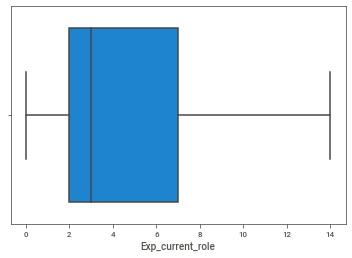

In [179]:
sns.boxplot(df.Exp_current_role)

# As seen, outlier has been removed for the feature

### Checking Outlier for the feature "Years_last_promotion"

<AxesSubplot:xlabel='Years_last_promotion', ylabel='Density'>

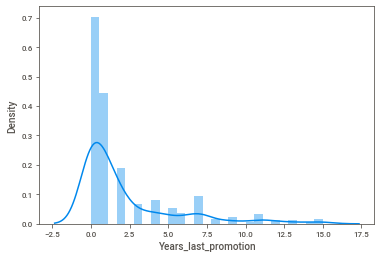

In [180]:
sns.distplot(df.Years_last_promotion)

<AxesSubplot:xlabel='Years_last_promotion'>

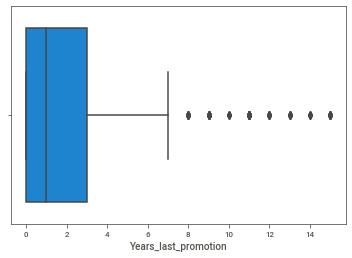

In [181]:
sns.boxplot(df.Years_last_promotion)

# As seen, needs outlier treatment

### Removing Outlier For "Years_last_promotion" Feature Using IQR

In [182]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['Years_last_promotion'], interpolation = 'midpoint') 

IQR

3.0

In [183]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['Years_last_promotion'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['Years_last_promotion'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [184]:
min_limit

-4.5

In [185]:
df.loc[df['Years_last_promotion'] < min_limit]

Empty DataFrame
Columns: [Emp_no, Age, Gender, EducationBackground, Marital_Status, Emp_Dept, Job_role, Travel_freq, Dist_from_home, Education_level, Envt_satisfaction, Hourly_rate, Job_involvement, Job_level, Job_satisfaction, No_companies_worked, OverTime, Last_sal_hike, Relationship_satisfaction, Total_work_exp, Training_last_yr, Work_life_bal, Exp_at_company, Exp_current_role, Years_last_promotion, Years_curr_mgr, Attrition, Performance_rating]
Index: []

[0 rows x 28 columns]

In [186]:
max_limit

7.5

In [187]:
df.loc[df['Years_last_promotion'] > max_limit]

Emp_no  Age  Gender EducationBackground Marital_Status  \
3     E1001009   41    Male     Human Resources       Divorced   
11    E1001024   47  Female             Medical       Divorced   
100   E1001183   50    Male       Life Sciences       Divorced   
130   E1001239   31  Female             Medical        Married   
132   E1001248   37    Male       Life Sciences        Married   
...        ...  ...     ...                 ...            ...   
1152   E100903   41  Female       Life Sciences        Married   
1160   E100922   50    Male             Medical        Married   
1181   E100961   34    Male       Life Sciences        Married   
1185   E100969   35    Male       Life Sciences         Single   
1189   E100980   33    Male       Life Sciences         Single   

             Emp_Dept          Job_role        Travel_freq  Dist_from_home  \
3     Human Resources           Manager      Travel_Rarely              10   
11              Sales   Sales Executive  Travel_Frequently               3   
100       Development         Developer         Non-Travel               2   
130       Development         Developer      Travel_Rarely              12   
132             Sales   Sales Executive      Travel_Rarely               1   
...               ...               ...                ...             ...   
1152            Sales           Manager      Travel_Rarely               2   
1160  Human Resources           Manager  Travel_Frequently               3   
1181      Development  Senior Developer      Travel_Rarely               1   
1185      Development  Senior Developer      Travel_Rarely               6   
1189      Development  Senior Developer  Travel_Frequently               3   

      Education_level  ...  Relationship_satisfaction  Total_work_exp  \
3                   4  ...                          2        9.685752   
11                  3  ...                          4       10.429025   
100                 4  ...                          4       11.330000   
130                 3  ...                          3       10.000000   
132                 4  ...                          3       17.000000   
...               ...  ...                        ...             ...   
1152                5  ...                          2        9.685752   
1160                3  ...                          3       11.330000   
1181                5  ...                          4       10.000000   
1185                4  ...                          2       17.000000   
1189                3  ...                          1       10.000000   

      Training_last_yr  Work_life_bal  Exp_at_company  Exp_current_role  \
3                  2.0              2        7.077500          6.000000   
11                 2.0              2        7.077500          2.000000   
100                3.0              3        7.077500          6.000000   
130                2.0              1        9.000000          7.000000   
132                2.0              1       14.000000          1.000000   
...                ...            ...             ...               ...   
1152               2.0              3        5.838035          4.291667   
1160               2.0              3        7.077500          5.000000   
1181               4.0              2       10.000000          9.000000   
1185               3.0              3        5.838035         11.000000   
1189               3.0              3       10.000000          8.000000   

     Years_last_promotion  Years_curr_mgr  Attrition  Performance_rating  
3                      12               6         No                   3  
11                     11              13         No                   3  
100                    14               7         No                   3  
130                     8               5         No                   3  
132                    11               7        Yes                   2  
...                   ...             ...        .

In [188]:
# No need to treat outliers for this feature as this feature has more than 5% outliers

### Checking Outlier for the feature "Years_curr_mgr"

In [189]:
df.columns

Index(['Emp_no', 'Age', 'Gender', 'EducationBackground', 'Marital_Status',
       'Emp_Dept', 'Job_role', 'Travel_freq', 'Dist_from_home',
       'Education_level', 'Envt_satisfaction', 'Hourly_rate',
       'Job_involvement', 'Job_level', 'Job_satisfaction',
       'No_companies_worked', 'OverTime', 'Last_sal_hike',
       'Relationship_satisfaction', 'Total_work_exp', 'Training_last_yr',
       'Work_life_bal', 'Exp_at_company', 'Exp_current_role',
       'Years_last_promotion', 'Years_curr_mgr', 'Attrition',
       'Performance_rating'],
      dtype='object')

<AxesSubplot:xlabel='Years_curr_mgr', ylabel='Density'>

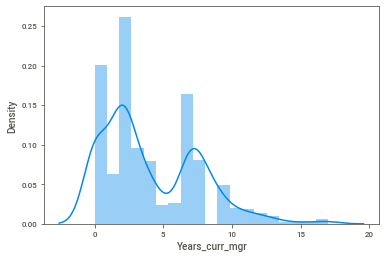

In [190]:
sns.distplot(df.Years_curr_mgr)

<AxesSubplot:xlabel='Years_curr_mgr'>

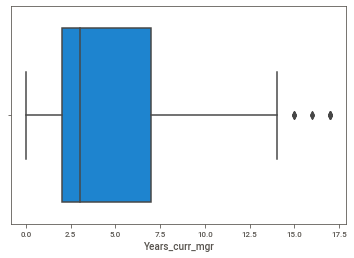

In [191]:
sns.boxplot(df.Years_curr_mgr)

# As seen, needs outlier treatment

### Removing Outlier For "Years_curr_mgr" Feature Using IQR

In [192]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['Years_curr_mgr'], interpolation = 'midpoint') 

IQR

5.0

In [193]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['Years_curr_mgr'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['Years_curr_mgr'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [194]:
min_limit

-5.5

In [195]:
df.loc[df['Years_curr_mgr'] < min_limit]

Empty DataFrame
Columns: [Emp_no, Age, Gender, EducationBackground, Marital_Status, Emp_Dept, Job_role, Travel_freq, Dist_from_home, Education_level, Envt_satisfaction, Hourly_rate, Job_involvement, Job_level, Job_satisfaction, No_companies_worked, OverTime, Last_sal_hike, Relationship_satisfaction, Total_work_exp, Training_last_yr, Work_life_bal, Exp_at_company, Exp_current_role, Years_last_promotion, Years_curr_mgr, Attrition, Performance_rating]
Index: []

[0 rows x 28 columns]

In [196]:
max_limit

14.5

In [197]:
df.loc[df['Years_curr_mgr'] > max_limit]

Emp_no  Age  Gender EducationBackground Marital_Status  \
25    E1001054   52    Male           Marketing        Married   
72    E1001129   51  Female           Marketing        Married   
126   E1001235   41    Male             Medical         Single   
283   E1001503   44    Male               Other         Single   
320   E1001571   43  Female           Marketing         Single   
655   E1002170   40    Male       Life Sciences       Divorced   
785    E100314   44  Female             Medical        Married   
864    E100440   51    Male       Life Sciences         Single   
888    E100484   45    Male       Life Sciences       Divorced   
956    E100597   42    Male    Technical Degree        Married   
1083   E100793   37  Female       Life Sciences       Divorced   

                    Emp_Dept            Job_role    Travel_freq  \
25                     Sales             Manager  Travel_Rarely   
72                     Sales             Manager  Travel_Rarely   
126              Development           Developer  Travel_Rarely   
283   Research & Development  Research Scientist  Travel_Rarely   
320                    Sales     Sales Executive  Travel_Rarely   
655   Research & Development         Manager R&D  Travel_Rarely   
785              Development           Developer  Travel_Rarely   
864              Development           Developer  Travel_Rarely   
888              Development           Developer  Travel_Rarely   
956              Development           Developer  Travel_Rarely   
1083             Development    Delivery Manager  Travel_Rarely   

      Dist_from_home  Education_level  ...  Relationship_satisfaction  \
25                 3                4  ...                          1   
72                26                4  ...                          3   
126                6                3  ...                          3   
283               29                4  ...                          2   
320                4                4  ...                          4   
655                1                4  ...                          1   
785                7                4  ...                          4   
864                6                3  ...                          3   
888                9                3  ...                          3   
956                4                2  ...                          4   
1083              14                3  ...                          3   

      Total_work_exp  Training_last_yr  Work_life_bal  Exp_at_company  \
25         11.330000               3.0              4        7.077500   
72         11.330000               2.0              2        6.196950   
126        20.000000               3.0              3        5.838035   
283        20.000000               3.0              3        6.196950   
320         9.685752               3.0              4        7.077500   
655         9.685752               3.0              3        6.196950   
785        10.155818               4.0              3        7.077500   
864         9.685752               5.0              3        6.196950   
888        20.000000               2.0              1        5.838035   
956         9.685752               3.0              3        7.077500   
1083       18.000000               2.0              2        5.838035   

      Exp_current_role Years_last_promotion  Years_curr_mgr  Attrition  \
25            6.000000                    1              16         No   
72            6.000000                    4              17         No   
126          13.000000                    2              17         No   
283          11.000000                   13              17         No   
320           7.000000                   15              17         No   
655           7.000000                   11              16         No   
785           6.000000                    5              17         No   
864           4.291667                   15              15     

In [198]:
## imputing the outliers 
df.loc[df['Years_curr_mgr'] > max_limit,'Years_curr_mgr']=np.mean(df['Years_curr_mgr'])

<AxesSubplot:xlabel='Years_curr_mgr'>

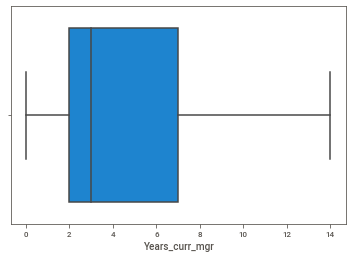

In [199]:
# Checking for outlier again using box plot

sns.boxplot(df.Years_curr_mgr)

In [200]:
# Outlier has been removed for the feature "Years_curr_mgr"

## Conversion of Categorical data to numerical data

In [201]:
df.columns

Index(['Emp_no', 'Age', 'Gender', 'EducationBackground', 'Marital_Status',
       'Emp_Dept', 'Job_role', 'Travel_freq', 'Dist_from_home',
       'Education_level', 'Envt_satisfaction', 'Hourly_rate',
       'Job_involvement', 'Job_level', 'Job_satisfaction',
       'No_companies_worked', 'OverTime', 'Last_sal_hike',
       'Relationship_satisfaction', 'Total_work_exp', 'Training_last_yr',
       'Work_life_bal', 'Exp_at_company', 'Exp_current_role',
       'Years_last_promotion', 'Years_curr_mgr', 'Attrition',
       'Performance_rating'],
      dtype='object')

### For feature "Gender"

In [202]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [203]:
## Conversion of categorical data to numeric equivalent for the feature "Gender"
df.Gender = df.Gender.map({'Male':1,'Female':2})

In [204]:
## Converting the datatypes of categorical feature 'Gender'
df['Gender'] = df['Gender'].astype('float64')

### For feature "EducationBackground"

In [205]:
df.EducationBackground.unique()

array(['Marketing', 'Life Sciences', 'Human Resources', 'Medical',
       'Other', 'Technical Degree'], dtype=object)

In [206]:
## Conversion of categorical data to numeric equivalent for the feature "EducationBackground"
df.EducationBackground = df.EducationBackground.map({'Marketing':1,'Life Sciences':2, 'Human Resources':3, 'Medical':4, 'Other':5, 'Technical Degree':6})

In [207]:
## Converting the datatypes of categorical feature 'EducationBackground'
df['EducationBackground'] = df['EducationBackground'].astype('float64')

### For feature "Marital_Status"

In [208]:
df.Marital_Status.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [209]:
## Conversion of categorical data to numeric equivalent for the feature "Marital_Status"
df.Marital_Status = df.Marital_Status.map({'Single':1,'Married':2, 'Divorced':3})

In [210]:
## Converting the datatypes of categorical feature 'Marital_Status'
df['Marital_Status'] = df['Marital_Status'].astype('float64')

### For feature "Emp_Dept"

In [211]:
df.Emp_Dept.unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [212]:
## Conversion of categorical data to numeric equivalent for the feature "Emp_Dept"
df.Emp_Dept = df.Emp_Dept.map({'Sales':1,'Human Resources':2, 'Development':3, 'Data Science':4, 'Research & Development':5, 'Finance':6})

In [213]:
## Converting the datatypes of categorical feature 'Emp_Dept'
df['Emp_Dept'] = df['Emp_Dept'].astype('float64')

### For feature "Job_role"

In [214]:
df.Job_role.unique()

array(['Sales Executive', 'Manager', 'Developer', 'Sales Representative',
       'Human Resources', 'Senior Developer', 'Data Scientist',
       'Senior Manager R&D', 'Laboratory Technician',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Research Director', 'Manager R&D',
       'Finance Manager', 'Technical Architect', 'Business Analyst',
       'Technical Lead', 'Delivery Manager'], dtype=object)

In [215]:
## Conversion of categorical data to numeric equivalent for the feature "Job_role"
df.Job_role = df.Job_role.map({'Sales Executive':1,'Manager':2, 'Developer':3, 'Sales Representative':4, 'Human Resources':5, 'Senior Developer':6, 'Data Scientist':7, 'Senior Manager R&D':8, 'Laboratory Technician':9, 'Manufacturing Director':10, 'Research Scientist':11, 'Healthcare Representative':12, 'Research Director':13, 'Manager R&D':14, 'Finance Manager':15, 'Technical Architect':16, 'Business Analyst':17, 'Technical Lead':18, 'Delivery Manager':19})

In [216]:
## Converting the datatypes of categorical feature 'Job_role'
df['Job_role'] = df['Job_role'].astype('float64')

### For feature "Travel_freq"

In [217]:
df.Travel_freq.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [218]:
## Conversion of categorical data to numeric equivalent for the feature "Travel_freq"
df.Travel_freq = df.Travel_freq.map({'Travel_Rarely':1,'Travel_Frequently':2, 'Non-Travel':3})

In [219]:
## Converting the datatypes of categorical feature 'Travel_freq'
df['Travel_freq'] = df['Travel_freq'].astype('float64')

### For feature "OverTime"

In [220]:
df.OverTime.unique()

array(['No', 'Yes'], dtype=object)

In [221]:
## Conversion of categorical data to numeric equivalent for the feature "OverTime"
df.OverTime = df.OverTime.map({'No':0,'Yes':1})

In [222]:
## Converting the datatypes of categorical feature 'OverTime'
df['OverTime'] = df['OverTime'].astype('float64')

### For feature "Attrition"

In [223]:
df.Attrition.unique()

array(['No', 'Yes'], dtype=object)

In [224]:
## Conversion of categorical data to numeric equivalent for the feature "Attrition"
df.Attrition = df.Attrition.map({'No':0,'Yes':1})

In [225]:
## Converting the datatypes of categorical feature 'Attrition'
df['Attrition'] = df['Attrition'].astype('float64')

In [226]:
df.dtypes

Emp_no                        object
Age                            int64
Gender                       float64
EducationBackground          float64
Marital_Status               float64
Emp_Dept                     float64
Job_role                     float64
Travel_freq                  float64
Dist_from_home                 int64
Education_level                int64
Envt_satisfaction              int64
Hourly_rate                    int64
Job_involvement                int64
Job_level                      int64
Job_satisfaction               int64
No_companies_worked          float64
OverTime                     float64
Last_sal_hike                  int64
Relationship_satisfaction      int64
Total_work_exp               float64
Training_last_yr             float64
Work_life_bal                  int64
Exp_at_company               float64
Exp_current_role             float64
Years_last_promotion           int64
Years_curr_mgr               float64
Attrition                    float64
P

## Feature Selection

In [227]:
#Removing the feature Emp_no 

df=df.drop(['Emp_no'], axis=1)

<AxesSubplot:>

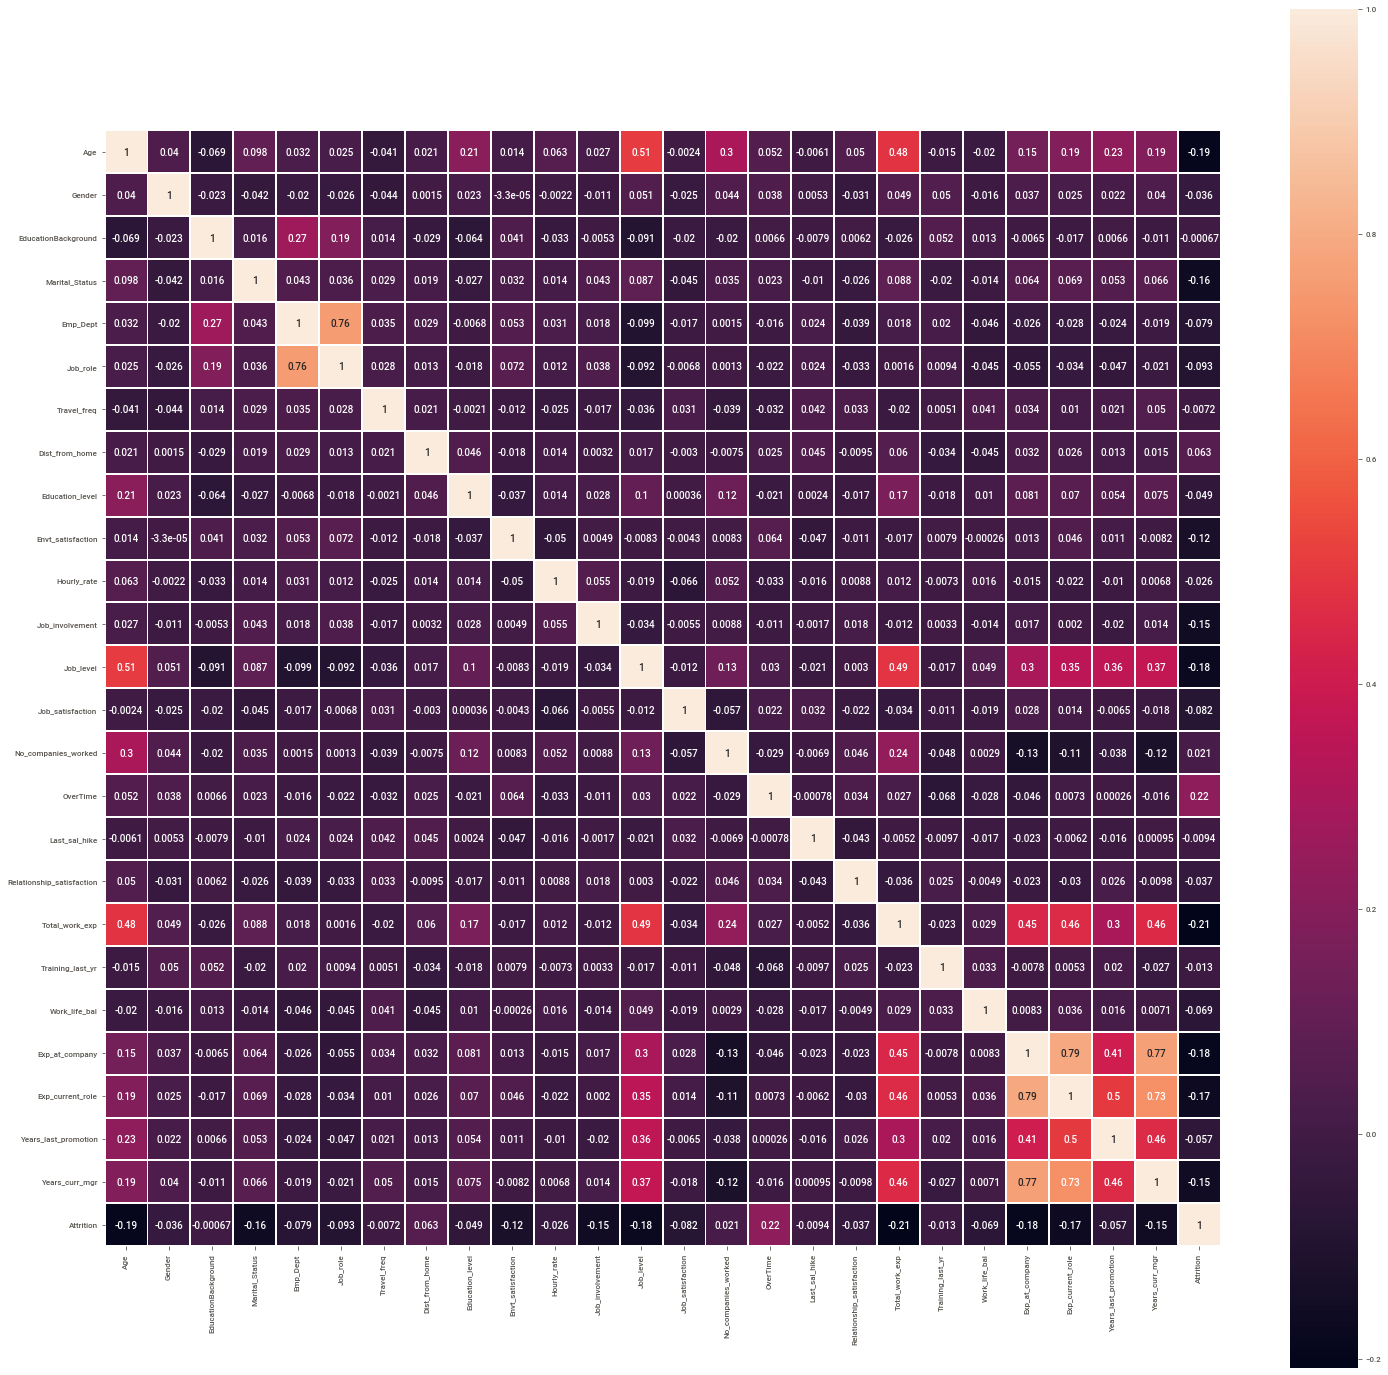

In [228]:
#Checking for correlation among the predictors using Pearson Correlation Coefficent Matrix

plt.figure(figsize=(25,25))
sns.heatmap(df.drop('Performance_rating',axis=1).corr(),annot=True,square=True,linewidths=1 , linecolor= 'white')

#As seen, there is no strong correlation among the predictors, we cannot drop any of the features.

## Model Building

### Methods we use in this project

In [229]:
df

Age  Gender  EducationBackground  Marital_Status  Emp_Dept  Job_role  \
0      32     1.0                  1.0             1.0       1.0       1.0   
1      47     1.0                  1.0             1.0       1.0       1.0   
2      40     1.0                  2.0             2.0       1.0       1.0   
3      41     1.0                  3.0             3.0       2.0       2.0   
4      60     1.0                  1.0             1.0       1.0       1.0   
...   ...     ...                  ...             ...       ...       ...   
1195   27     2.0                  4.0             3.0       1.0       1.0   
1196   37     1.0                  2.0             1.0       3.0       6.0   
1197   50     1.0                  4.0             2.0       3.0       6.0   
1198   34     2.0                  4.0             1.0       4.0       7.0   
1199   24     2.0                  2.0             1.0       1.0       1.0   

      Travel_freq  Dist_from_home  Education_level  Envt_satisfaction  ...  \
0             1.0              10                3                  4  ...   
1             1.0              14                4                  4  ...   
2             2.0               5                4                  4  ...   
3             1.0              10                4                  2  ...   
4             1.0              16                4                  1  ...   
...           ...             ...              ...                ...  ...   
1195          2.0               3                1                  4  ...   
1196          1.0              10                2                  4  ...   
1197          1.0              28                1                  4  ...   
1198          1.0               9                3                  4  ...   
1199          1.0               3                2                  1  ...   

      Relationship_satisfaction  Total_work_exp  Training_last_yr  \
0                             4       10.000000               2.0   
1                             4       20.000000               2.0   
2                             3       20.000000               2.0   
3                             2        9.685752               2.0   
4                             4       10.000000               1.0   
...                         ...             ...               ...   
1195                          2        6.000000               3.0   
1196                          1        4.000000               2.0   
1197                          3       20.000000               3.0   
1198                          2        9.000000               3.0   
1199                          1        4.000000               3.0   

      Work_life_bal  Exp_at_company  Exp_current_role  Years_last_promotion  \
0                 2       10.000000               7.0                     0   
1                 3        7.000000               7.0                     1   
2                 3        5.838035              13.0                     1   
3                 2        7.077500               6.0                    12   
4                 3        2.000000               2.0                     2   
...             ...             ...               ...                   ...   
1195              3        6.000000               5.0                     0   
1196              3        1.000000               0.0                     0   
1197              3        6.196950               8.0                     3   
1198              4        8.000000               7.0                     7   
1199              3        2.000000               2.0                     2   

      Years_curr_mgr  Attrition  Performance_rating  
0                8.0        0.0                   3  
1                7.0        0.0                   3  
2               12.0        0.0                   4  
3                6.0        0.0                   3  
4                2.0        0.0                   3  
...              ...        ..

In [230]:
# check if there is any imbalance with response variable.
df.groupby('Performance_rating').size()

# Since we have imbalanced data, we may have to sub-sample the data /over sample/ create synthetic data using SMOTE()
# we will try using first with SMOTE() and check the accuracy scores with different models going to be built now.

Performance_rating
2    194
3    874
4    132
dtype: int64

In [231]:
# define data
X = df.iloc[ : , 0:-1 ]
y = df['Performance_rating']
rl = []
rl_roc=[]

In [232]:
# Scale the data
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [233]:
## SMOTE() the data
from imblearn.over_sampling import SMOTE
smote = SMOTE() # create object smote

In [234]:
X_smote, y_smote = smote.fit_resample(X,y)

In [235]:
X_smote

Age    Gender  EducationBackground  Marital_Status  Emp_Dept   Job_role  \
0      32  1.000000             1.000000        1.000000  1.000000   1.000000   
1      47  1.000000             1.000000        1.000000  1.000000   1.000000   
2      40  1.000000             2.000000        2.000000  1.000000   1.000000   
3      41  1.000000             3.000000        3.000000  2.000000   2.000000   
4      60  1.000000             1.000000        1.000000  1.000000   1.000000   
...   ...       ...                  ...             ...       ...        ...   
2617   24  1.437771             3.124459        1.000000  3.000000   3.000000   
2618   36  1.790324             5.161297        2.790324  4.580649   8.532270   
2619   33  1.000000             2.000000        2.465083  3.000000   4.395249   
2620   38  1.000000             3.293213        2.353393  5.646607  14.646607   
2621   47  1.479642             4.000000        1.479642  4.040716   2.479642   

      Travel_freq  Dist_from_home  Education_level  Envt_satisfaction  ...  \
0        1.000000              10                3                  4  ...   
1        1.000000              14                4                  4  ...   
2        2.000000               5                4                  4  ...   
3        1.000000              10                4                  2  ...   
4        1.000000              16                4                  1  ...   
...           ...             ...              ...                ...  ...   
2617     1.000000               6                2                  4  ...   
2618     1.209676               1                3                  3  ...   
2619     1.000000              21                1                  2  ...   
2620     1.000000              10                2                  3  ...   
2621     2.520358               2                1                  3  ...   

      Last_sal_hike  Relationship_satisfaction  Total_work_exp  \
0                12                          4       10.000000   
1                12                          4       20.000000   
2                21                          3       20.000000   
3                15                          2        9.685752   
4                14                          4       10.000000   
...             ...                        ...             ...   
2617             18                          1        3.000000   
2618             21                          3       15.466380   
2619             21                          1        4.744418   
2620             20                          3        8.060180   
2621             19                          2        9.732793   

      Training_last_yr  Work_life_bal  Exp_at_company  Exp_current_role  \
0             2.000000              2       10.000000          7.000000   
1             2.000000              3        7.000000          7.000000   
2             2.000000              3        5.838035         13.000000   
3             2.000000              2        7.077500          6.000000   
4             1.000000              3        2.000000          2.000000   
...                ...            ...             ...               ...   
2617          4.437771              3        1.686688          1.124459   
2618          2.209676              2        7.016250          6.161297   
2619          1.465083              3        1.000000          0.000000   
2620          2.924315              3        5.000000          3.293213   
2621          2.520358              3        8.520358          7.000000   

      Years_last_promotion  Years_curr_mgr  Attrition  
0                        0        8.000000   0.000000  
1                        1        7.000000   0.000000  
2                        1       12.000000   0.000000  
3                       12        6.000000   0.000000  
4                        2        2.000000   0.000000  
...                    ...             ...        ...  
2617      

In [236]:
# split data into train and test
from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state = 42)
X_train,X_test,y_train,y_test=train_test_split(X_smote, y_smote, test_size=0.20, random_state=42)

#### Logistic Regression

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score, \
classification_report,roc_auc_score, roc_curve
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs' ) ## SET THE PARAMETERS HERE FOR MULTICLASS

In [238]:
log_reg.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [239]:
y_hat = log_reg.predict(X_test)

In [240]:
y_hat

array([3, 3, 2, 3, 4, 4, 2, 2, 4, 4, 3, 3, 3, 3, 2, 2, 3, 4, 4, 4, 4, 4,
       4, 3, 3, 3, 2, 4, 2, 2, 3, 4, 4, 4, 3, 2, 4, 4, 2, 2, 4, 3, 2, 2,
       2, 2, 2, 2, 4, 3, 2, 3, 2, 4, 3, 3, 3, 2, 4, 2, 2, 4, 4, 2, 2, 2,
       2, 4, 4, 2, 2, 4, 4, 4, 4, 3, 2, 2, 4, 2, 2, 4, 4, 3, 4, 4, 3, 4,
       4, 2, 3, 3, 3, 2, 4, 3, 2, 4, 2, 2, 3, 3, 3, 4, 2, 2, 4, 2, 3, 4,
       3, 4, 3, 2, 4, 3, 3, 2, 2, 3, 4, 4, 2, 3, 2, 3, 4, 4, 2, 4, 3, 3,
       4, 4, 4, 2, 2, 3, 2, 2, 2, 4, 3, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 3,
       3, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 3, 4, 2, 3, 2, 3, 4, 4, 2, 4,
       4, 2, 3, 3, 3, 4, 4, 2, 2, 4, 4, 4, 2, 4, 3, 3, 2, 2, 2, 4, 2, 4,
       4, 2, 4, 3, 4, 2, 2, 4, 4, 2, 3, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 3,
       4, 3, 3, 4, 3, 3, 2, 4, 4, 3, 3, 2, 4, 4, 3, 3, 2, 4, 3, 3, 2, 3,
       2, 2, 2, 4, 3, 4, 4, 3, 2, 4, 4, 3, 2, 2, 3, 3, 2, 2, 3, 3, 4, 3,
       4, 2, 2, 2, 4, 4, 4, 3, 4, 3, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 4, 3, 4, 2, 4, 4, 3, 2, 4,

In [241]:
# F1 Score
F1_Score = f1_score(y_test,y_hat, average='weighted')
F1_Score

0.7979690856839425

In [242]:
# accuracy
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.8

In [243]:
# Precison
Precision = precision_score(y_test,y_hat, average='weighted')
Precision

0.8050073509781008

In [244]:
# Recall
Recall = recall_score(y_test,y_hat, average='weighted')
Recall

0.8

In [245]:
pd.crosstab(y_test, y_hat)

col_0                 2    3    4
Performance_rating               
2                   151   12   21
3                    26  118   29
4                     5   12  151

In [246]:
rep=classification_report(y_test, y_hat)
print(rep)

              precision    recall  f1-score   support

           2       0.83      0.82      0.83       184
           3       0.83      0.68      0.75       173
           4       0.75      0.90      0.82       168

    accuracy                           0.80       525
   macro avg       0.80      0.80      0.80       525
weighted avg       0.81      0.80      0.80       525



In [247]:
## Prediciting the probabilities of class 1
probs=log_reg.predict_proba(X_test)
probs

array([[1.69280327e-01, 7.83769555e-01, 4.69501177e-02],
       [2.83819523e-01, 6.14407052e-01, 1.01773425e-01],
       [8.40966532e-01, 1.54281262e-01, 4.75220625e-03],
       ...,
       [7.74349798e-01, 3.31002983e-02, 1.92549904e-01],
       [8.61119751e-01, 1.38104344e-01, 7.75905181e-04],
       [4.67648406e-03, 1.01926193e-02, 9.85130897e-01]])

In [248]:
#from sklearn.metrics import roc_auc_score,roc_curve ## used to compare multiple models
auc = roc_auc_score(y_test, probs, multi_class='ovr')
print('AUC: %.2f' % auc)

AUC: 0.92


In [249]:
rl.append(['LR',F1_Score, accuracy, Precision, Recall, auc])


#### SVM

In [250]:
from sklearn.svm import SVC
svclassifier = SVC(decision_function_shape='ovo',probability=True) ## base model with default parameters
svclassifier.fit(X_train, y_train)
# check here for multiclass classificaton we need to add kernel = poly or something like that.. by default it is 'rbf'

SVC(decision_function_shape='ovo', probability=True)

In [251]:
## henceforth all output from predict will be assigned to y_hat in all classifiers for easy understanding of code.
y_hat=svclassifier.predict(X_test)

In [252]:
## evaluating the model created
from sklearn.metrics import accuracy_score,classification_report,f1_score
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(svclassifier, X_scaled, y, scoring='accuracy', cv = 3)

print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 77.58333333333334


In [253]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.66      0.61      0.64       184
           3       0.60      0.50      0.55       173
           4       0.70      0.88      0.78       168

    accuracy                           0.66       525
   macro avg       0.65      0.66      0.65       525
weighted avg       0.65      0.66      0.65       525



In [254]:
F1_Score=f1_score(y_test,y_hat, average='weighted')
F1_Score

0.6530396676510061

In [255]:
## cross validation score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svclassifier,X_test,y_test,cv=3)  
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.61714286 0.58857143 0.52571429]
Cross validation Score: 0.5771428571428571
Std : 0.03819035743954936


In [256]:
# implmenting GridsearchCV
from sklearn.model_selection import GridSearchCV
  

params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


  

grid = GridSearchCV(SVC(), params_grid, verbose = 3,  cv=3)


# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.811 total time=   0.0s
[CV 2/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.824 total time=   0.0s
[CV 3/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.793 total time=   0.0s
[CV 1/3] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.651 total time=   0.1s
[CV 2/3] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.652 total time=   0.1s
[CV 3/3] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.655 total time=   0.1s
[CV 1/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.888 total time=   0.0s
[CV 2/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.883 total time=   0.0s
[CV 3/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.881 total time=   0.0s
[CV 1/3] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.823 total time=   0.0s
[CV 2/3] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.815 total time=   0.0s
[CV 3/3] END ....C=10, gamma=0.0001, kernel=rbf;

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             verbose=3)

In [257]:
# best parameter from GridSearchCV
print(grid.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [258]:
# check best estimator 
print(grid.best_estimator_)

SVC(C=100, gamma=0.001)


In [259]:
# supplying above SVC & gamma values got from the GridSearchCV to the classifier (SVC)  
clf=SVC(C=1000, gamma=0.001, random_state=42)

In [260]:
# fit the data with classifier
clf.fit(X_train,y_train)

SVC(C=1000, gamma=0.001, random_state=42)

In [261]:
# prediction after GridSearch
y_hat=clf.predict(X_test)

In [262]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[175,   9,   0],
       [ 24, 134,  15],
       [  0,   1, 167]], dtype=int64)

In [263]:
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9066666666666666

In [264]:
Precision = precision_score(y_test,y_hat, average='weighted')
Precision

0.9084742904592152

In [265]:
Recall = recall_score(y_test,y_hat, average='weighted')
Recall

0.9066666666666666

In [266]:
F1_Score=f1_score(y_test,y_hat, average='weighted')
F1_Score

0.9042378841487257

In [267]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.88      0.95      0.91       184
           3       0.93      0.77      0.85       173
           4       0.92      0.99      0.95       168

    accuracy                           0.91       525
   macro avg       0.91      0.91      0.90       525
weighted avg       0.91      0.91      0.90       525



In [268]:
## Prediciting the probabilities of class 
probs=svclassifier.predict_proba(X_test)
probs

array([[0.60511841, 0.39036666, 0.00451494],
       [0.56234836, 0.37666335, 0.06098829],
       [0.90190231, 0.08843737, 0.00966032],
       ...,
       [0.11062915, 0.1886741 , 0.70069675],
       [0.93659748, 0.06102359, 0.00237893],
       [0.00164939, 0.01117308, 0.98717753]])

In [269]:
auc = roc_auc_score(y_test, probs, multi_class='ovo')
print('AUC: %.2f' % auc)

AUC: 0.85


In [270]:
rl.append(['SVM',F1_Score, accuracy, Precision, Recall, auc])

#### KNN

In [272]:
from sklearn.neighbors import KNeighborsClassifier

In [273]:
## taking optimal k (k = 10)
error_rate = []
# Will try
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

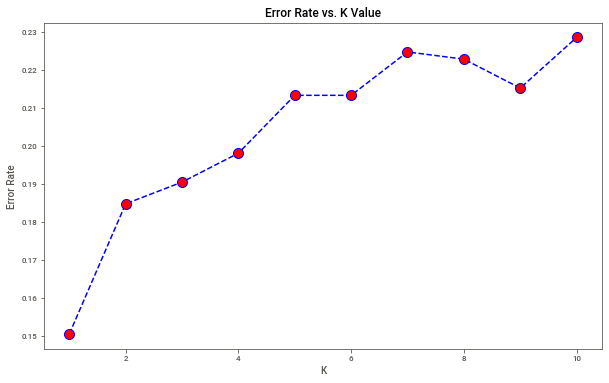

In [274]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [275]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [276]:
# Prediction
y_hat = knn.predict(X_test)

In [277]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[176,   2,   6],
       [ 74,  77,  22],
       [  0,   0, 168]], dtype=int64)

In [278]:
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.8019047619047619

In [279]:
Precision = precision_score(y_test,y_hat,average='weighted')
Precision

0.8422023869801085

In [280]:
Recall = recall_score(y_test,y_hat,average='weighted')
Recall

0.8019047619047619

In [281]:
# F1 Score
F1_Score = f1_score(y_test,y_hat,average='weighted')
F1_Score

0.7810174635059426

In [282]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.70      0.96      0.81       184
           3       0.97      0.45      0.61       173
           4       0.86      1.00      0.92       168

    accuracy                           0.80       525
   macro avg       0.85      0.80      0.78       525
weighted avg       0.84      0.80      0.78       525



In [283]:
## Prediciting the probabilities of class 
probs=knn.predict_proba(X_test)
probs

array([[0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       ...,
       [0.25, 0.75, 0.  ],
       [0.75, 0.25, 0.  ],
       [0.  , 0.25, 0.75]])

In [284]:
auc = roc_auc_score(y_test, probs, multi_class='ovo')
print('AUC: %.2f' % auc)

AUC: 0.93


In [285]:
rl.append(['KNN',F1_Score, accuracy, Precision, Recall, auc])


#### Naive Bays

In [286]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB(alpha=0.01) # object creation
nb.fit(X_train,y_train)

BernoulliNB(alpha=0.01)

In [287]:
y_hat=nb.predict(X_test)

In [288]:
from sklearn.metrics import classification_report,confusion_matrix

In [289]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.55      0.97      0.70       184
           3       0.55      0.21      0.31       173
           4       0.64      0.51      0.56       168

    accuracy                           0.57       525
   macro avg       0.58      0.56      0.53       525
weighted avg       0.58      0.57      0.53       525



In [290]:
pd.crosstab(y_test,y_hat)

col_0                 2   3   4
Performance_rating             
2                   179   3   2
3                    90  37  46
4                    56  27  85

In [291]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[179,   3,   2],
       [ 90,  37,  46],
       [ 56,  27,  85]], dtype=int64)

In [292]:
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.5733333333333334

In [293]:
Precision = precision_score(y_test,y_hat,average='weighted')
Precision


0.579518615137154

In [294]:
Recall = recall_score(y_test,y_hat,average='weighted')
Recall

0.5733333333333334

In [295]:
F1_Score=f1_score(y_test,y_hat,average='weighted')
F1_Score

0.5288379541091653

In [296]:
## Prediciting the probabilities of class 
probs=nb.predict_proba(X_test)
probs

array([[0.03182751, 0.40495316, 0.56321933],
       [0.64486148, 0.10417832, 0.2509602 ],
       [0.59656984, 0.21079708, 0.19263308],
       ...,
       [0.59656984, 0.21079708, 0.19263308],
       [0.48157429, 0.48006312, 0.03836258],
       [0.59656984, 0.21079708, 0.19263308]])

In [297]:
auc = roc_auc_score(y_test, probs, multi_class='ovo')
print('AUC: %.2f' % auc)

AUC: 0.74


In [298]:
rl.append(['Naive Bays',F1_Score, accuracy, Precision, Recall, auc])


#### Decision Tree

In [299]:
#  decisiontree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(class_weight="balanced")
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [300]:
y_hat=dt.predict(X_test)

In [301]:
#from sklearn.metrics import accuracy_score,classification_report,f1_score
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix


array([[169,   8,   7],
       [  9, 147,  17],
       [  1,   8, 159]], dtype=int64)

In [302]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9047619047619048

In [303]:

# Precison - among all the positive predictions, how many of them actually positive
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat,average='weighted')
Precision

0.9061072160262686

In [304]:
# Recall - from the total positive results , how many positives are correctly predicted by the model
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat,average='weighted')
Recall

0.9047619047619048

In [305]:
F1_Score=f1_score(y_test, y_hat,average='weighted')
F1_Score

0.9045865750411204

In [306]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.94      0.92      0.93       184
           3       0.90      0.85      0.87       173
           4       0.87      0.95      0.91       168

    accuracy                           0.90       525
   macro avg       0.90      0.90      0.90       525
weighted avg       0.91      0.90      0.90       525



In [307]:
## Prediciting the probabilities of class 
probs=dt.predict_proba(X_test)
probs

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [308]:
auc = roc_auc_score(y_test, probs, multi_class='ovo')
print('AUC: %.2f' % auc)

AUC: 0.93


In [309]:
rl.append(['Decision Tree',F1_Score, accuracy, Precision, Recall, auc])


#### Random Forest

In [310]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf_clf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [311]:
y_hat=rf_clf.predict(X_test)

In [312]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.93      0.99      0.96       184
           3       0.98      0.91      0.95       173
           4       0.98      0.98      0.98       168

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



In [314]:
#from sklearn.metrics import accuracy_score,classification_report,f1_score
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix


array([[182,   2,   0],
       [ 11, 158,   4],
       [  2,   1, 165]], dtype=int64)

In [315]:
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9619047619047619

In [316]:

# Precison - among all the positive predictions, how many of them actually positive
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat,average='weighted')
Precision

0.9629207609293611

In [317]:
# Recall - from the total positive results , how many positives are correctly predicted by the model
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat,average='weighted')
Recall

0.9619047619047619

In [318]:
F1_Score=f1_score(y_test, y_hat,average='weighted')
F1_Score

0.9617232582162424

In [319]:
## Prediciting the probabilities of class 
probs=rf_clf.predict_proba(X_test)
probs

array([[0.2 , 0.64, 0.16],
       [0.08, 0.84, 0.08],
       [0.98, 0.02, 0.  ],
       ...,
       [0.59, 0.24, 0.17],
       [0.57, 0.4 , 0.03],
       [0.  , 0.18, 0.82]])

In [320]:
auc = roc_auc_score(y_test, probs, multi_class='ovo')
print('AUC: %.2f' % auc)

AUC: 1.00


In [321]:
rl.append(['Random Forest',F1_Score, accuracy, Precision, Recall, auc])
#print('SVM---->f1',F1_Score, 'accuracy',accuracy,'precision',Precision,'recall',Recall,'auc',auc)

#### Gradient Boosting


In [322]:
## importing the model library
from sklearn.ensemble import  GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(X_train,y_train) ## fitting the data


GradientBoostingClassifier()

In [323]:
y_hat=gbm.predict(X_test)

In [324]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.96      0.98      0.97       184
           3       0.96      0.95      0.96       173
           4       0.98      0.97      0.98       168

    accuracy                           0.97       525
   macro avg       0.97      0.97      0.97       525
weighted avg       0.97      0.97      0.97       525



In [325]:
#from sklearn.metrics import accuracy_score,classification_report,f1_score
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix


array([[181,   3,   0],
       [  5, 165,   3],
       [  2,   3, 163]], dtype=int64)

In [326]:
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9695238095238096

In [327]:
# Recall - from the total positive results , how many positives are correctly predicted by the model
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat,average='weighted')
Recall

0.9695238095238096

In [328]:
F1_Score=f1_score(y_test, y_hat,average='weighted')
F1_Score

0.9695030736583491

In [329]:
## Prediciting the probabilities of class 
probs=gbm.predict_proba(X_test)
probs

array([[0.02537666, 0.95278523, 0.02183811],
       [0.00150319, 0.99446794, 0.00402887],
       [0.98950274, 0.00751551, 0.00298176],
       ...,
       [0.88559561, 0.04578739, 0.068617  ],
       [0.34897918, 0.64805011, 0.00297071],
       [0.00153079, 0.02106294, 0.97740627]])

In [330]:
auc = roc_auc_score(y_test, probs, multi_class='ovo')
print('AUC: %.2f' % auc)

AUC: 1.00


In [331]:
rl.append(['Gradient Boosting',F1_Score, accuracy, Precision, Recall, auc])

#### XGBOOST

In [332]:
import xgboost 

In [333]:
## model creation
from xgboost import XGBClassifier
xgb_c=XGBClassifier()
xgb_c.fit(X_train,y_train)


[21:17:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [334]:
y_hat=xgb_c.predict(X_test)

In [335]:
## calculating accuracy- not applicable , since they cant handle continous and binary output
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9733333333333334

In [336]:
# Recall - from the total positive results , how many positives are correctly predicted by the model
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat,average='weighted')
Recall

0.9733333333333334

In [337]:
F1_Score=f1_score(y_test, y_hat,average='weighted')
F1_Score

0.9732094907089569

In [338]:
#from sklearn.metrics import accuracy_score,classification_report,f1_score
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix


array([[181,   3,   0],
       [  6, 163,   4],
       [  0,   1, 167]], dtype=int64)

In [339]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.97      0.98      0.98       184
           3       0.98      0.94      0.96       173
           4       0.98      0.99      0.99       168

    accuracy                           0.97       525
   macro avg       0.97      0.97      0.97       525
weighted avg       0.97      0.97      0.97       525



In [340]:
## Prediciting the probabilities of class 
probs=xgb_c.predict_proba(X_test)
probs

array([[6.87122997e-03, 9.92280662e-01, 8.48044292e-04],
       [3.30754294e-04, 9.99555290e-01, 1.13962975e-04],
       [9.98738348e-01, 1.15697715e-03, 1.04743551e-04],
       ...,
       [9.34957325e-01, 7.72540877e-03, 5.73172942e-02],
       [2.46394172e-01, 7.53536105e-01, 6.97055730e-05],
       [4.45144869e-05, 6.66446937e-03, 9.93291020e-01]], dtype=float32)

In [341]:
auc = roc_auc_score(y_test, probs, multi_class='ovo')
print('AUC: %.2f' % auc)

AUC: 1.00


In [342]:
rl.append(['XG Boost',F1_Score, accuracy, Precision, Recall, auc])


# RESULT ANALYSIS

In [343]:
res_df = pd.DataFrame(columns=['Model','F1-score','accuracy','precision','recall','auc'],data = rl)

In [344]:
res_df

Model  F1-score  accuracy  precision    recall       auc
0                 LR  0.797969  0.800000   0.805007  0.800000  0.916094
1                SVM  0.904238  0.906667   0.908474  0.906667  0.854525
2                KNN  0.781017  0.801905   0.842202  0.801905  0.933100
3         Naive Bays  0.528838  0.573333   0.579519  0.573333  0.735708
4      Decision Tree  0.904587  0.904762   0.906107  0.904762  0.928654
5      Random Forest  0.961723  0.961905   0.962921  0.961905  0.996599
6  Gradient Boosting  0.969503  0.969524   0.962921  0.969524  0.997367
7           XG Boost  0.973209  0.973333   0.962921  0.973333  0.996801

In [345]:
res_df.sort_values(by='auc',ascending=False)

Model  F1-score  accuracy  precision    recall       auc
6  Gradient Boosting  0.969503  0.969524   0.962921  0.969524  0.997367
7           XG Boost  0.973209  0.973333   0.962921  0.973333  0.996801
5      Random Forest  0.961723  0.961905   0.962921  0.961905  0.996599
2                KNN  0.781017  0.801905   0.842202  0.801905  0.933100
4      Decision Tree  0.904587  0.904762   0.906107  0.904762  0.928654
0                 LR  0.797969  0.800000   0.805007  0.800000  0.916094
1                SVM  0.904238  0.906667   0.908474  0.906667  0.854525
3         Naive Bays  0.528838  0.573333   0.579519  0.573333  0.735708

#### Comparision of ROC/AUC Scores

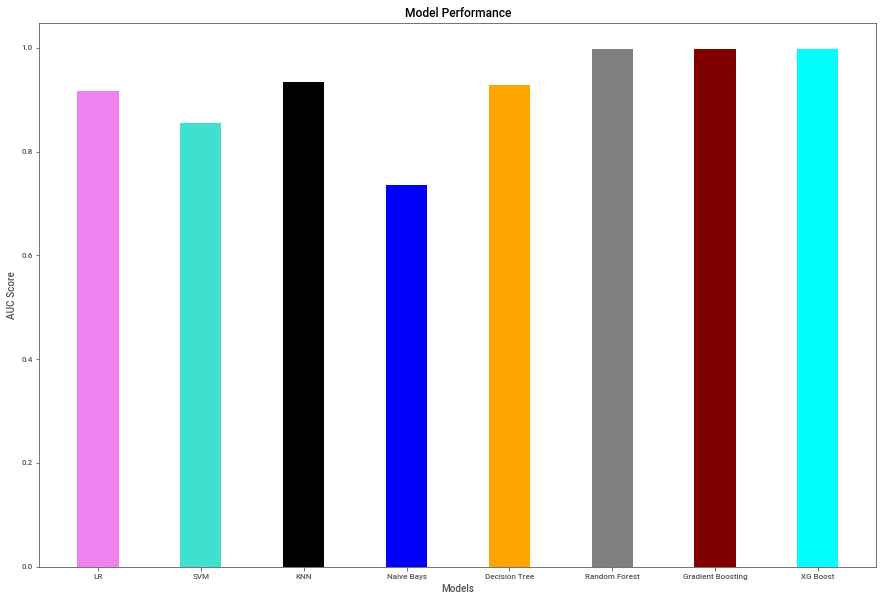

In [346]:
fig = plt.figure(figsize=(15,10))

color = ['violet','turquoise','black','blue','orange','grey','maroon','cyan']
plt.bar(res_df['Model'], res_df['auc'],color = color, width = 0.4)
plt.xlabel("Models")
plt.ylabel("AUC Score")
plt.title("Model Performance")
plt.show()

### CONCLUSION: